In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px
import os
from sklearn.metrics import confusion_matrix

In [3]:
ids = [f'f_{i}' for i in range(1, 28)]

In [4]:
# Assuming your models are in the 'models' directory and have names like 'model6.h5', 'model1.h5', etc.
models_dir = '../models/top3freeze/'

# Create an empty dictionary to store the loaded models
loaded_models = {}

for id in ids:
    model_path = os.path.join(models_dir, f'{id}.h5')
    if os.path.exists(model_path):
        loaded_models[id] = tf.keras.models.load_model(model_path)
        print(f'Loaded model {id}')
    else:
        print(f"No model found for id {id}")

Loaded model f_1
Loaded model f_2
Loaded model f_3
Loaded model f_4
Loaded model f_5
Loaded model f_6
Loaded model f_7
Loaded model f_8
Loaded model f_9
Loaded model f_10
Loaded model f_11
Loaded model f_12
Loaded model f_13
Loaded model f_14
Loaded model f_15
Loaded model f_16
Loaded model f_17
Loaded model f_18
Loaded model f_19
Loaded model f_20
Loaded model f_21
Loaded model f_22
Loaded model f_23
Loaded model f_24
Loaded model f_25
Loaded model f_26
Loaded model f_27
No model found for id f_28
No model found for id f_29
No model found for id f_30


# Functions

In [5]:
data_dir = '../dataset/realworld_test_data/processed/version1/'

IMAGE_SIZE = 300
class_names = sorted(os.listdir(data_dir))
n_classes = len(class_names)

print(f"Total number of classes in train: {n_classes}")
print(f"Classes: {class_names}")

Total number of classes in train: 20
Classes: ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']


In [6]:
def load_and_preprocess_image(image, label):
    # Resize the image to the desired size
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    
    # Rescale pixel values to be in the range [0, 1]
    image = tf.image.per_image_standardization(image)
    
#     # Convert image data type to tf.float32
#     image = tf.cast(image, tf.float32)
    
    return image, label

In [7]:
def plot_images(dataset: tf.data.Dataset, n_rows: int = 5, n_cols: int = 4, class_names=class_names, figsize=(20, 20), model=None, check=False, verbose=1):
    """
    Plots a grid of images and their corresponding labels from a tf.data.Dataset object.

    Args:
        dataset (tf.data.Dataset): A TensorFlow dataset object containing the images and labels to plot.
        n_rows (int): Number of rows in the plot grid. Default is 5.
        n_cols (int): Number of columns in the plot grid. Default is 4.
        class_names (list): A list of strings mapping the integer labels to their corresponding class names. Default is None.
        figsize (tuple): A tuple specifying the size of the figure. Default is (20, 20).
        model (tf.keras.Model): A trained TensorFlow model to make predictions on the images. Default is None.
        check (bool): If True and a model is provided, only incorrectly predicted images will be plotted. Default is False.
    """
    
    # Create a figure to display the images
    fig = plt.figure(figsize=figsize)
    
    # Initialize image counter
    image_count = 0
    
    # Loop over all batches in dataset
    for images, labels in dataset:
        
        # Loop over all images in batch
        for i in range(images.shape[0]):
            
            label = int(labels[i].numpy())
            title = "true: "+class_names[label]

            if model:
                pred = model.predict(images[i][np.newaxis], verbose=verbose)

                if check:
                    if label == np.argmax(pred):
                        continue

                pred_label = f"Pred: {np.argmax(pred)}"
                pred_percentage = f" ({np.max(pred) * 100:.2f}%)"
                if class_names:
                    pred_label += f" ({class_names[np.argmax(pred)]})"
                title += f"\n{pred_label} {pred_percentage}"

            # Create a subplot for each image
            ax = fig.add_subplot(n_rows, n_cols, image_count+1)    

            # Plot the image
            ax.imshow(images[i].numpy().astype("uint8"))

            # Set the title to the corresponding label
            ax.set_title(title)

            # Remove the axis ticks
            ax.set_xticks([])
            ax.set_yticks([])
            
            # Increment image counter
            image_count += 1
            
            # Check if maximum number of images has been reached
            if image_count >= n_rows * n_cols:
                break
        
        # Check if maximum number of images has been reached
        if image_count >= n_rows * n_cols:
            break
    
    # Show the plot
    plt.show()

In [8]:
def plot_confusion_m(y_true, y_pred, class_names=None, figsize=(15,15)):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [9]:
# Calculate class distribution
class_dis = [len(os.listdir(data_dir + name)) for name in class_names]
# class_dis = [len(os.listdir(val_dir + name)) for name in class_names]
# class_dis = [len(os.listdir(test_dir + name)) for name in class_names]

# Visualize using interactive pie chart
pie_chart = px.pie(values=class_dis, names=class_names, color=class_names)
pie_chart.update_layout({'title':{'text':"Class Distribution"}})
pie_chart.show()

# Visualize using interactive bar chart
bar_chart = px.bar(y=class_dis, x=class_names, color=class_names)
bar_chart.show()

In [10]:
real_test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir)
real_test_ds_mapped = real_test_ds.map(load_and_preprocess_image)
real_test_ds_mapped.prefetch(tf.data.AUTOTUNE)

Found 200 files belonging to 20 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

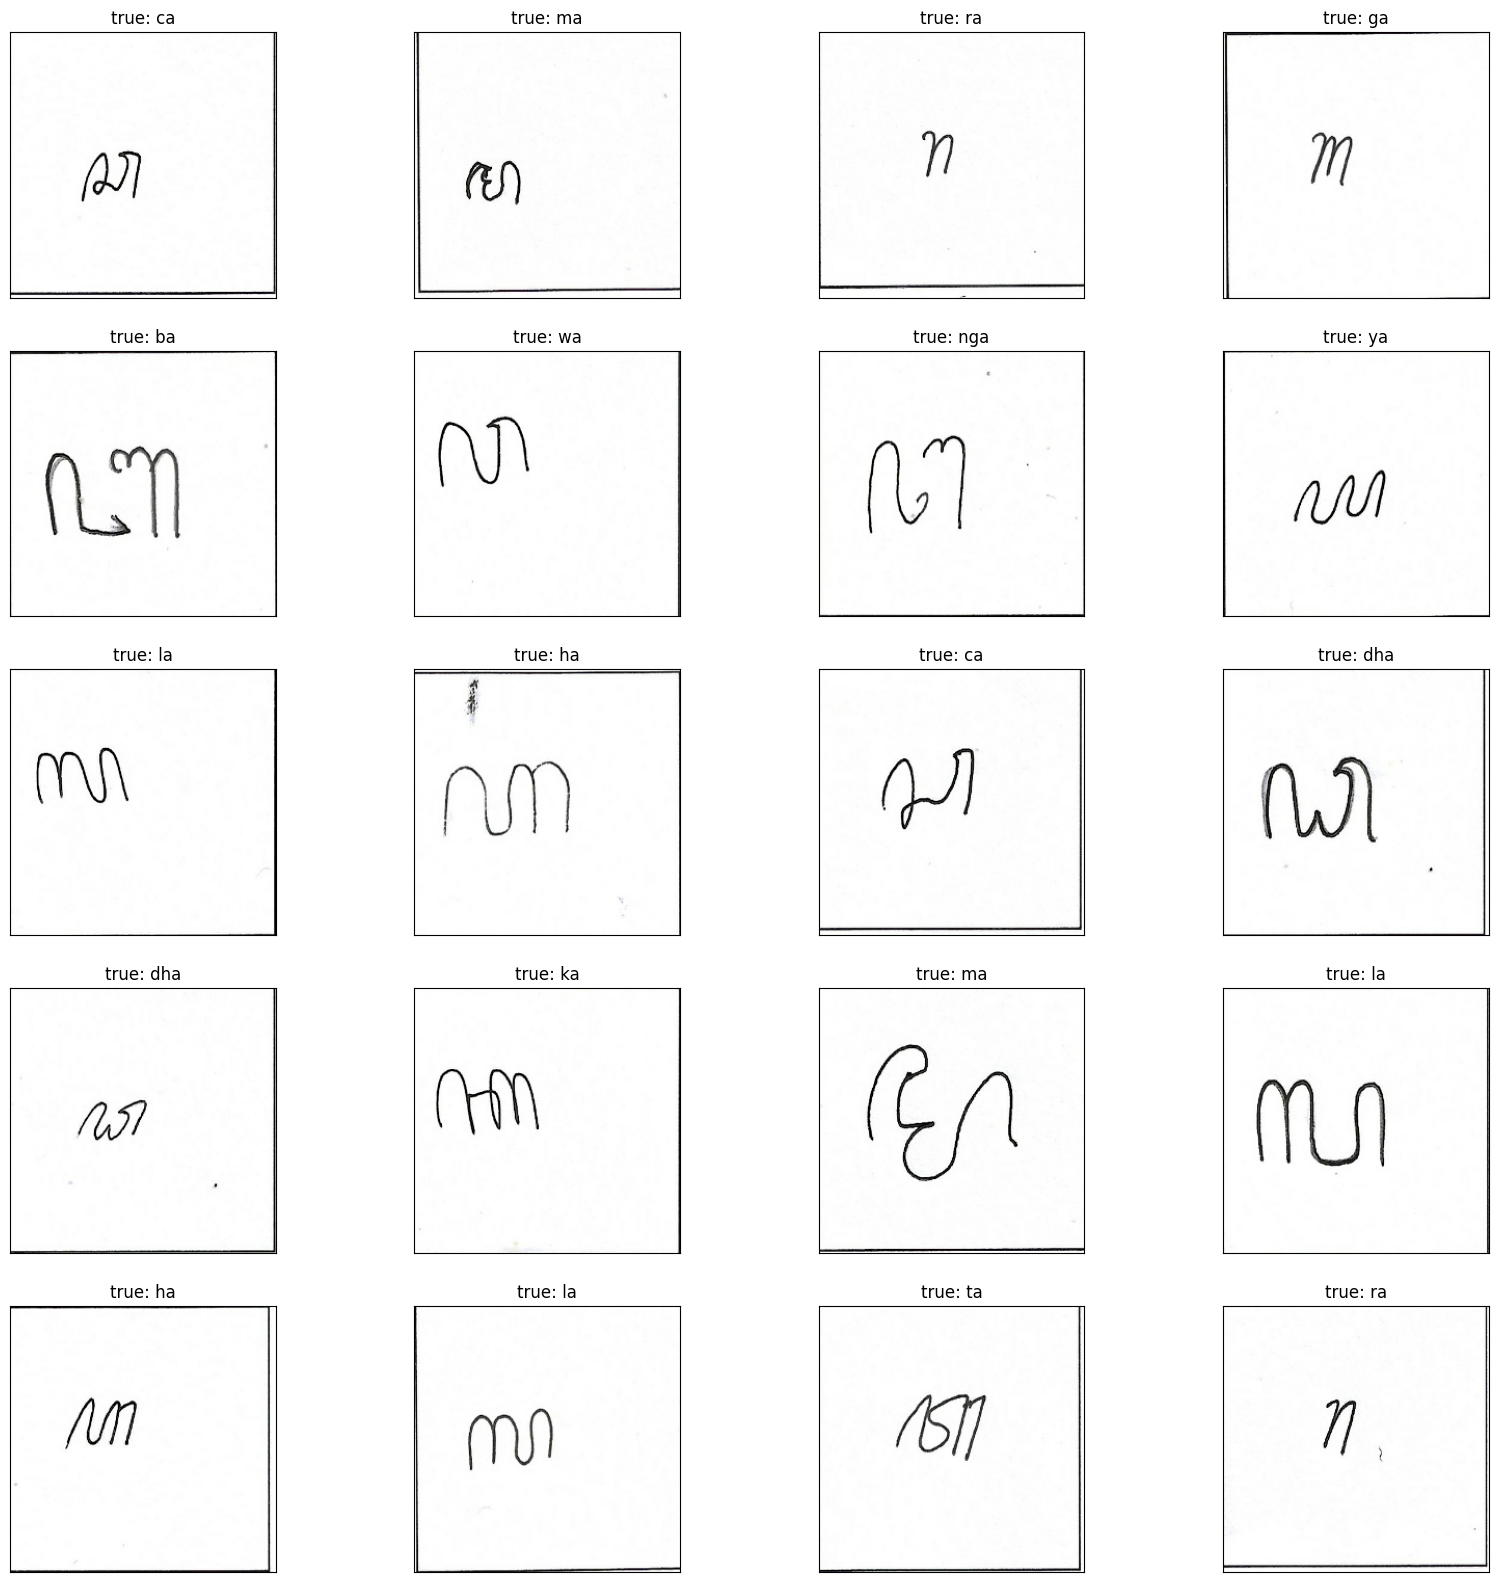

In [11]:
plot_images(real_test_ds)

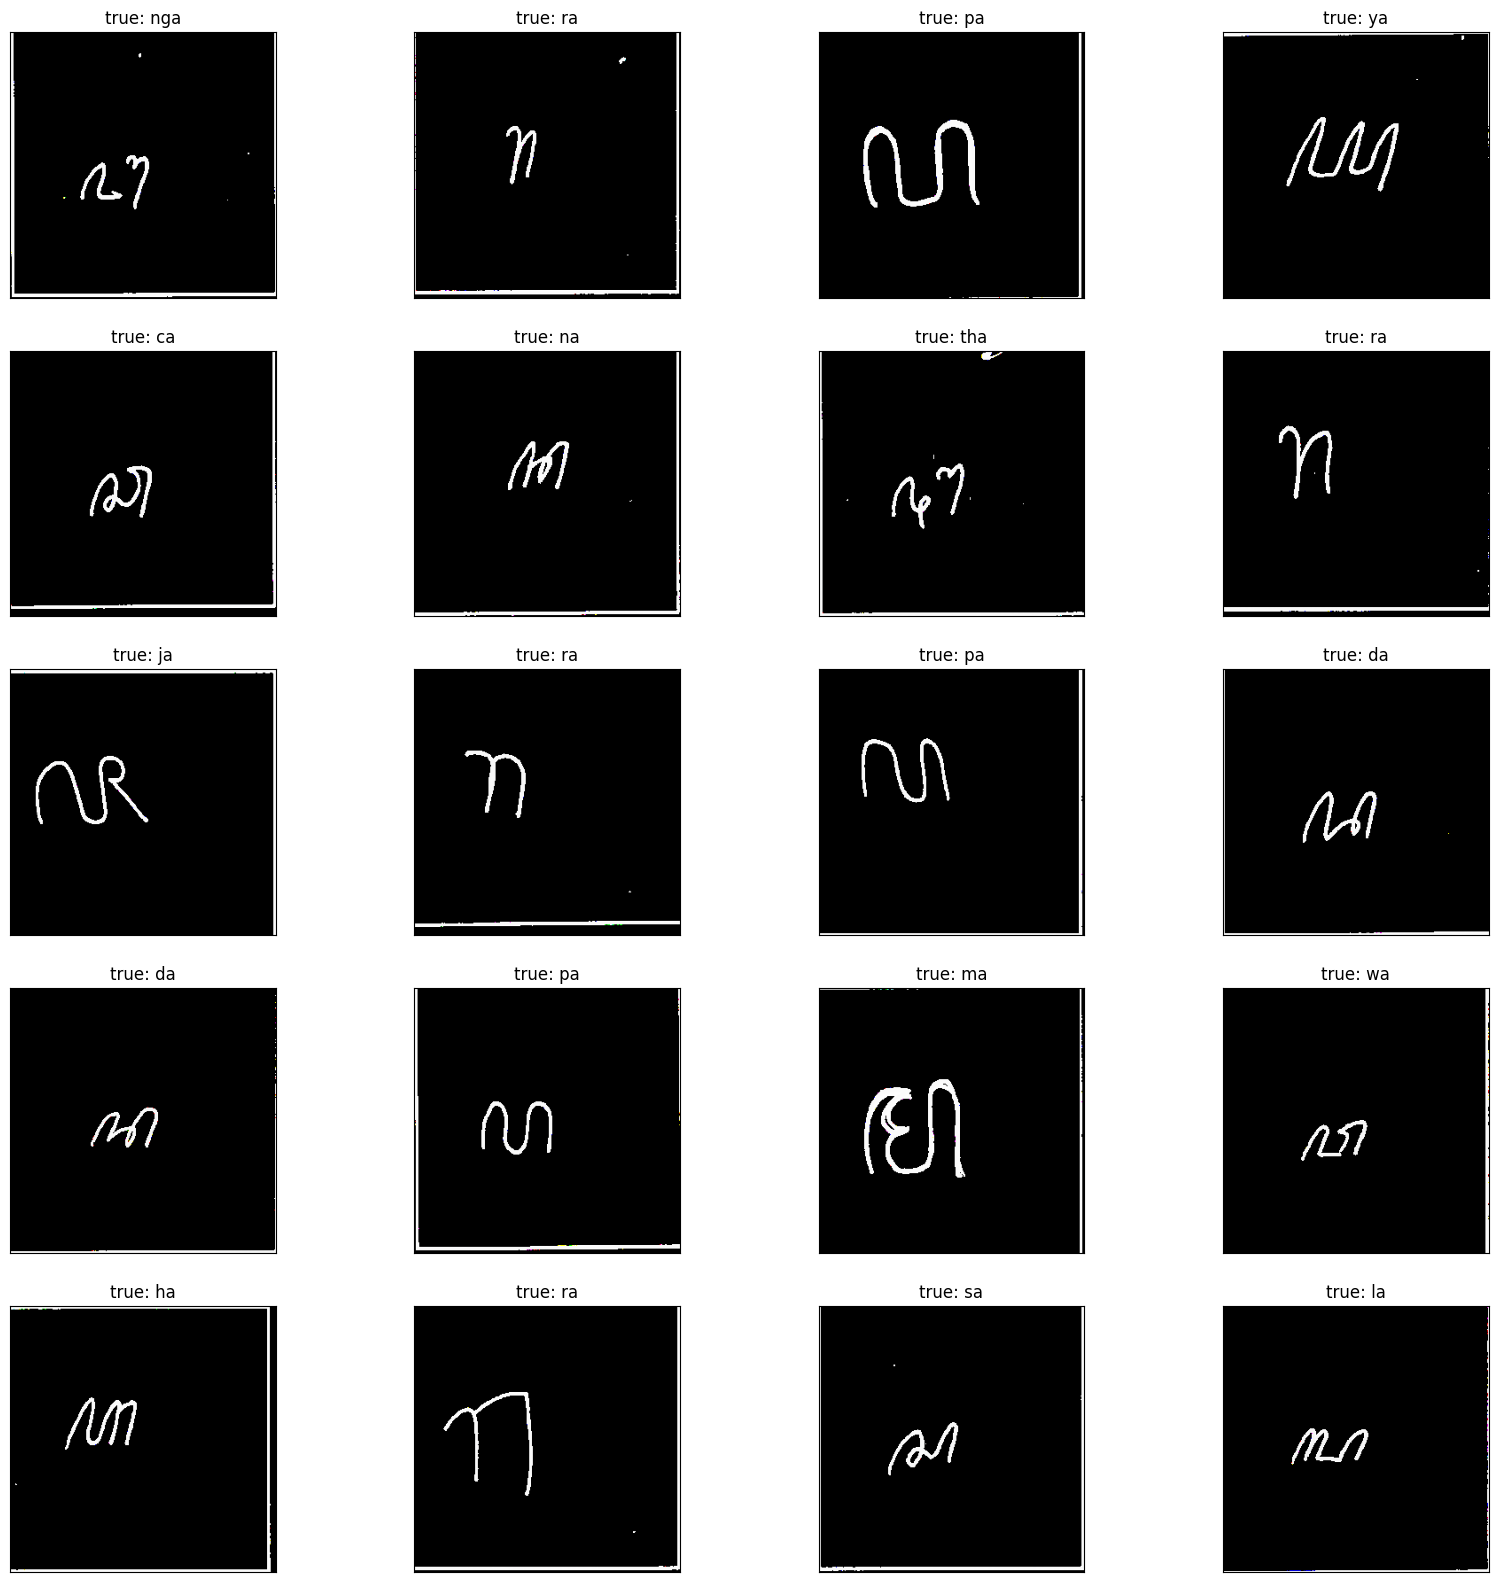

In [12]:
plot_images(real_test_ds_mapped)

START predicting with model f_1 ...
==== CONFUSION MATRIX FOR MODEL f_1 ====


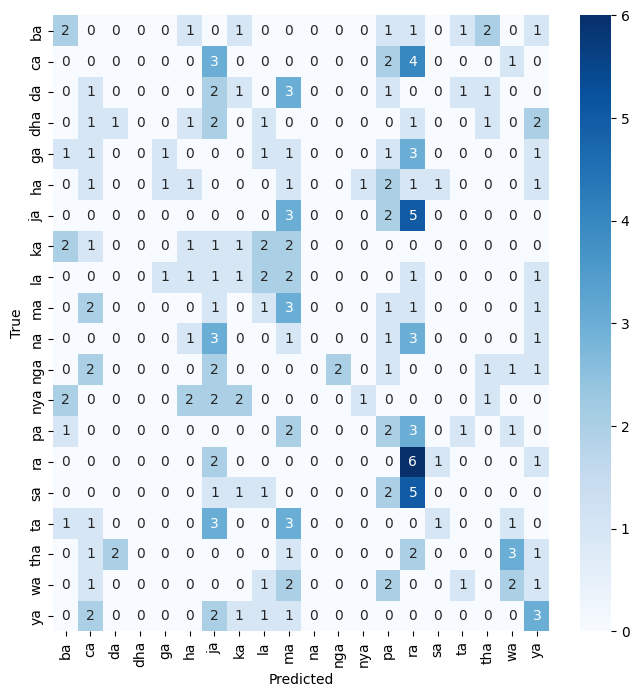

7/7 [==============================] - 17s 2s/step - loss: 3.4536 - accuracy: 0.1300
Loss    : 3.454
Accuracy: 13.0%
FINISHED predicting with model f_1 ... 

START predicting with model f_2 ...
==== CONFUSION MATRIX FOR MODEL f_2 ====


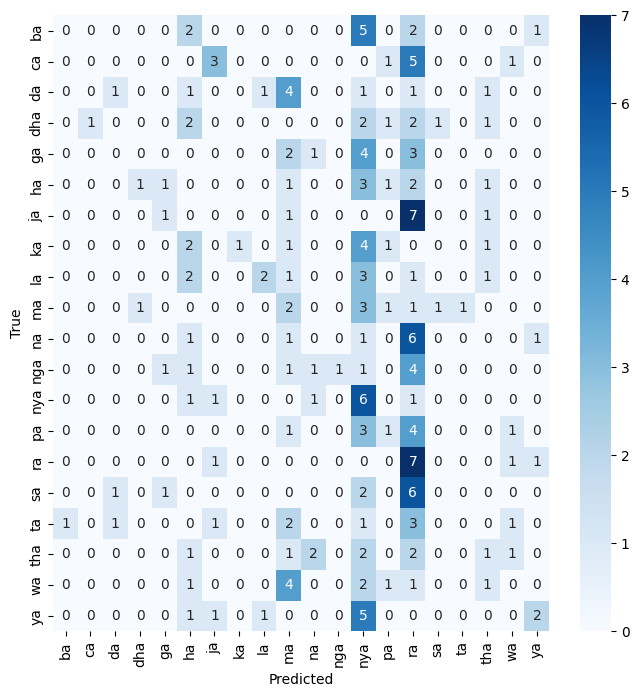

7/7 [==============================] - 13s 2s/step - loss: 3.5726 - accuracy: 0.1200
Loss    : 3.573
Accuracy: 12.0%
FINISHED predicting with model f_2 ... 

START predicting with model f_3 ...
==== CONFUSION MATRIX FOR MODEL f_3 ====


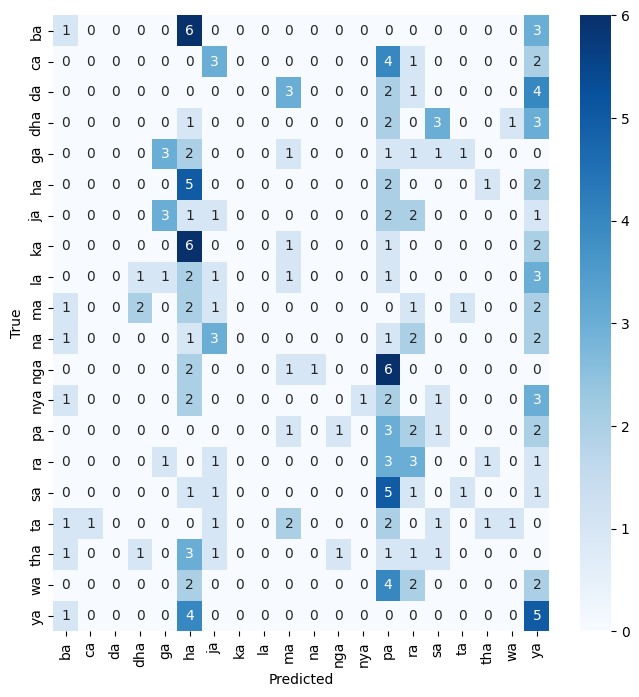

7/7 [==============================] - 14s 2s/step - loss: 3.4227 - accuracy: 0.1100
Loss    : 3.423
Accuracy: 11.0%
FINISHED predicting with model f_3 ... 

START predicting with model f_4 ...
==== CONFUSION MATRIX FOR MODEL f_4 ====


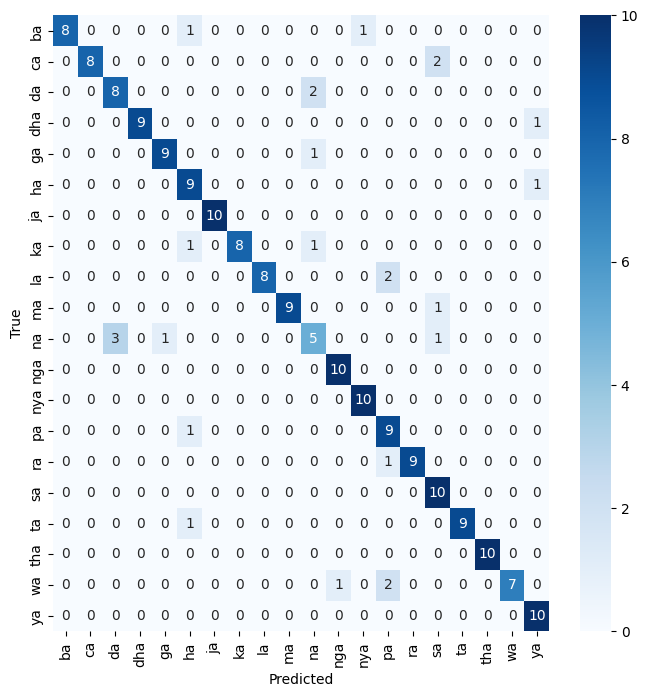

7/7 [==============================] - 14s 2s/step - loss: 0.5361 - accuracy: 0.8750
Loss    : 0.5361
Accuracy: 87.5%
FINISHED predicting with model f_4 ... 

START predicting with model f_5 ...
==== CONFUSION MATRIX FOR MODEL f_5 ====


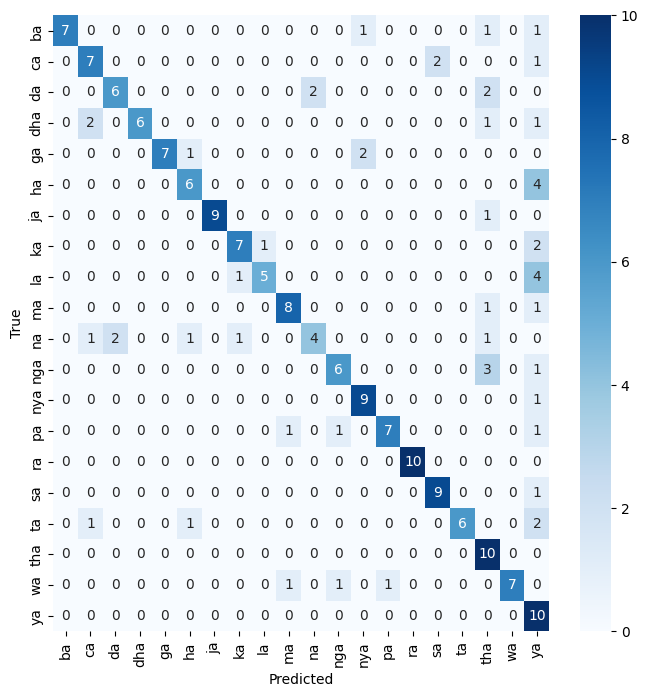

7/7 [==============================] - 13s 2s/step - loss: 0.9502 - accuracy: 0.7300
Loss    : 0.9502
Accuracy: 73.0%
FINISHED predicting with model f_5 ... 

START predicting with model f_6 ...
==== CONFUSION MATRIX FOR MODEL f_6 ====


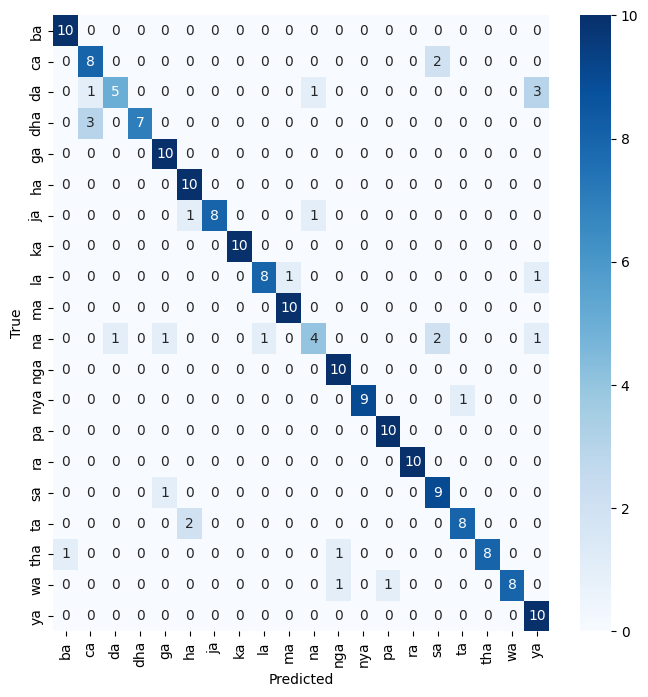

7/7 [==============================] - 12s 2s/step - loss: 0.8271 - accuracy: 0.8600
Loss    : 0.8271
Accuracy: 86.0%
FINISHED predicting with model f_6 ... 

START predicting with model f_7 ...
==== CONFUSION MATRIX FOR MODEL f_7 ====


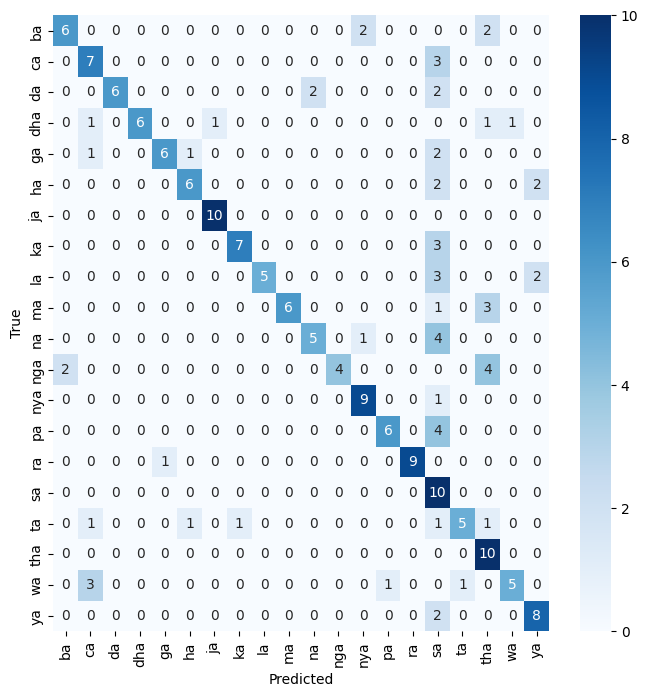

7/7 [==============================] - 15s 2s/step - loss: 1.3930 - accuracy: 0.6800
Loss    : 1.393
Accuracy: 68.0%
FINISHED predicting with model f_7 ... 

START predicting with model f_8 ...
==== CONFUSION MATRIX FOR MODEL f_8 ====


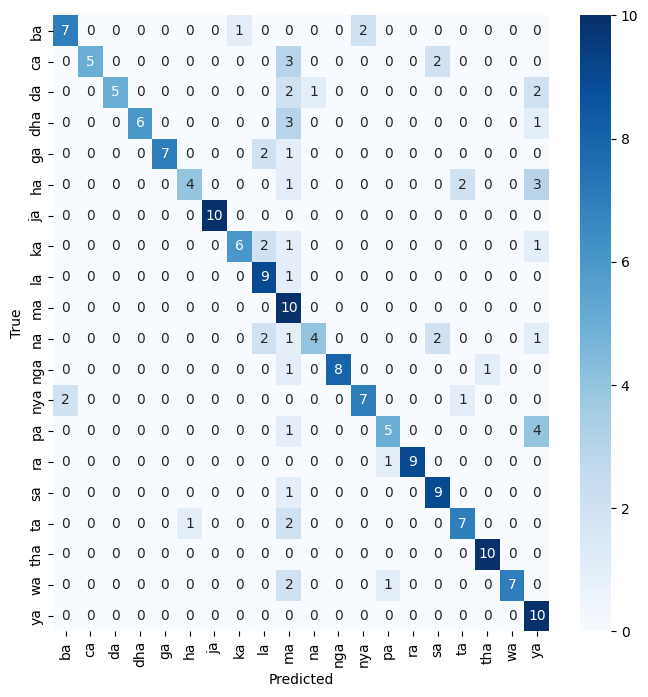

7/7 [==============================] - 13s 2s/step - loss: 1.1264 - accuracy: 0.7250
Loss    : 1.126
Accuracy: 72.5%
FINISHED predicting with model f_8 ... 

START predicting with model f_9 ...
==== CONFUSION MATRIX FOR MODEL f_9 ====


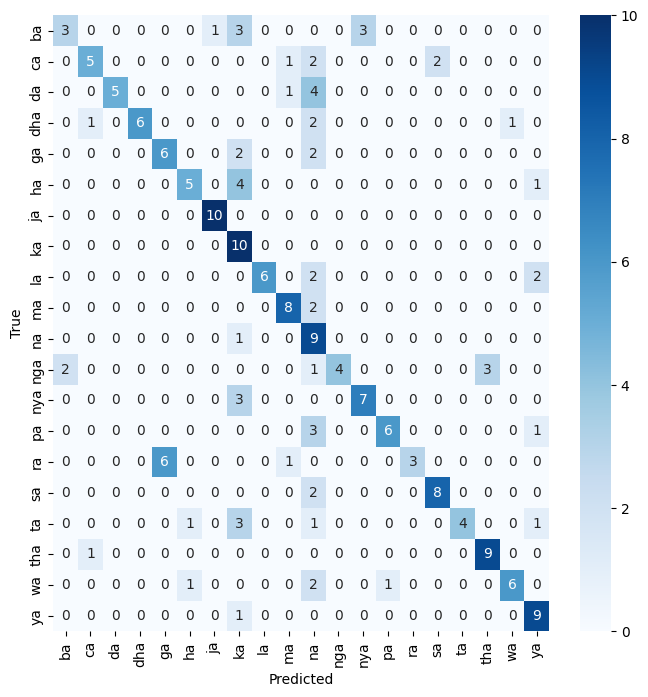

7/7 [==============================] - 13s 2s/step - loss: 1.2227 - accuracy: 0.6450
Loss    : 1.223
Accuracy: 64.5%
FINISHED predicting with model f_9 ... 

START predicting with model f_10 ...
==== CONFUSION MATRIX FOR MODEL f_10 ====


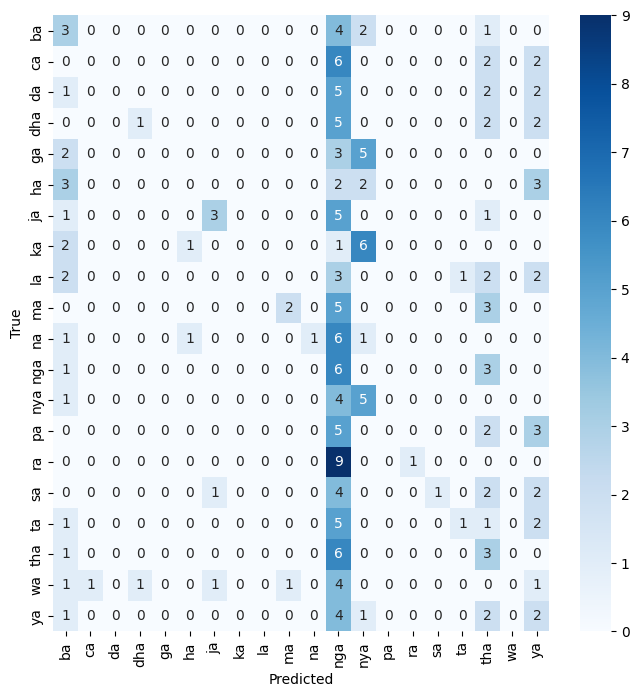

7/7 [==============================] - 45s 6s/step - loss: 3.5954 - accuracy: 0.1450
Loss    : 3.595
Accuracy: 14.5%
FINISHED predicting with model f_10 ... 

START predicting with model f_11 ...
==== CONFUSION MATRIX FOR MODEL f_11 ====


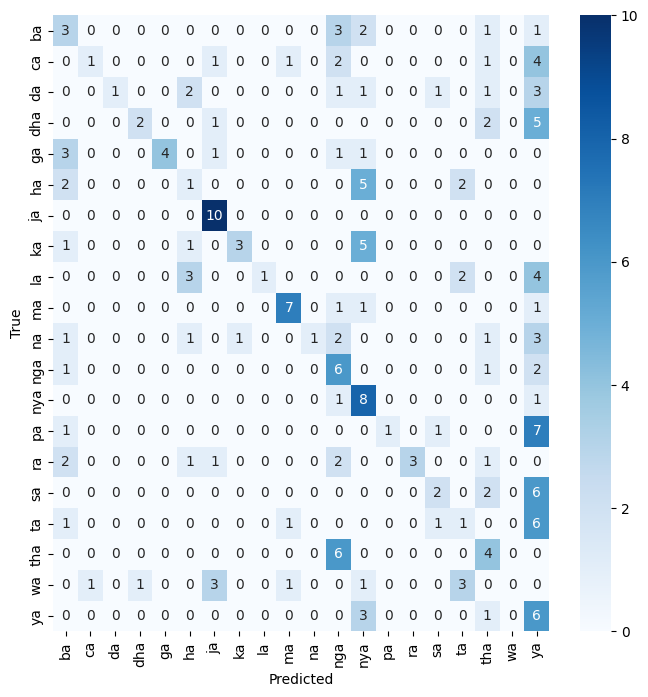

7/7 [==============================] - 47s 7s/step - loss: 2.2714 - accuracy: 0.3250
Loss    : 2.271
Accuracy: 32.5%
FINISHED predicting with model f_11 ... 

START predicting with model f_12 ...
==== CONFUSION MATRIX FOR MODEL f_12 ====


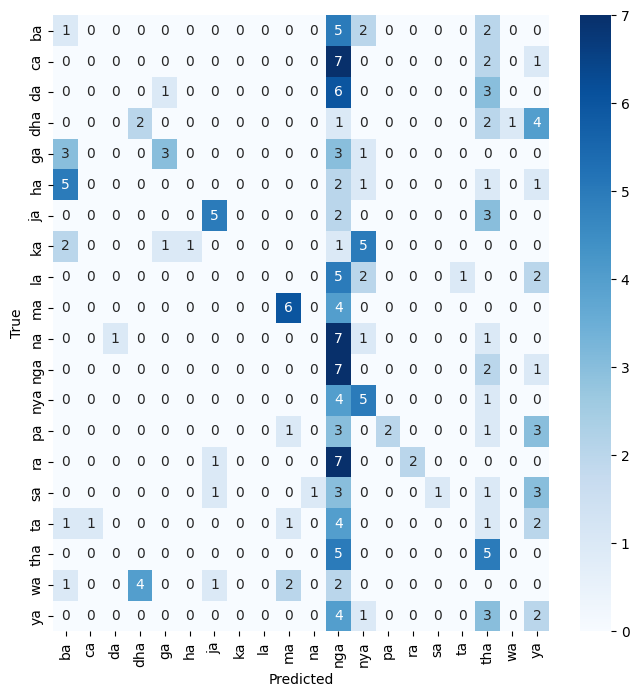

7/7 [==============================] - 44s 6s/step - loss: 2.5956 - accuracy: 0.2050
Loss    : 2.596
Accuracy: 20.5%
FINISHED predicting with model f_12 ... 

START predicting with model f_13 ...
==== CONFUSION MATRIX FOR MODEL f_13 ====


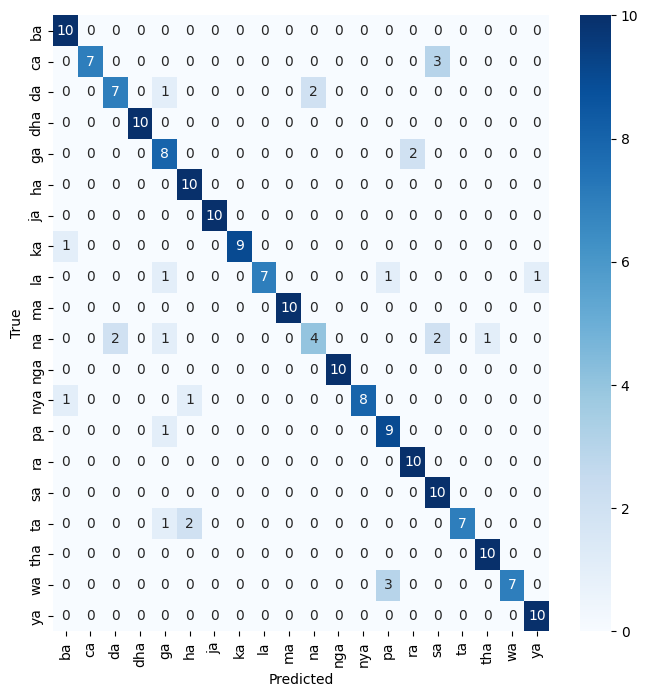

7/7 [==============================] - 46s 6s/step - loss: 0.5156 - accuracy: 0.8650
Loss    : 0.5156
Accuracy: 86.5%
FINISHED predicting with model f_13 ... 

START predicting with model f_14 ...
==== CONFUSION MATRIX FOR MODEL f_14 ====


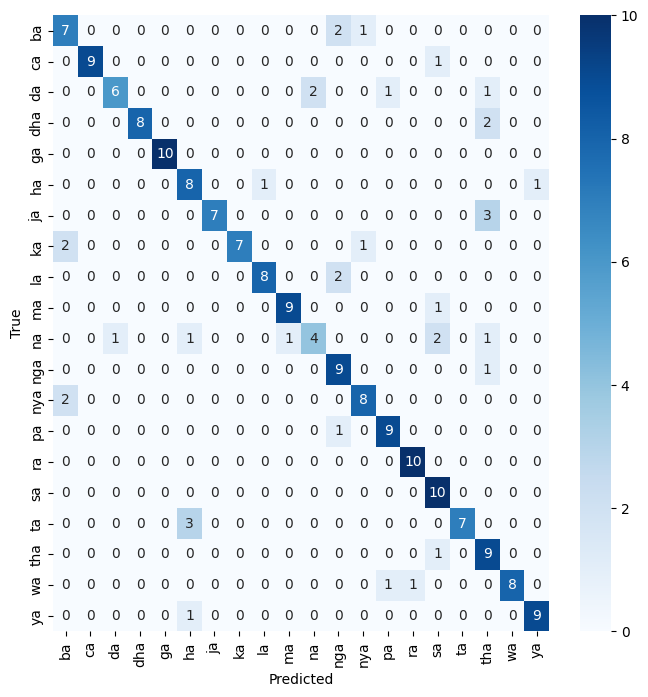

7/7 [==============================] - 45s 6s/step - loss: 0.7298 - accuracy: 0.8100
Loss    : 0.7298
Accuracy: 81.0%
FINISHED predicting with model f_14 ... 

START predicting with model f_15 ...
==== CONFUSION MATRIX FOR MODEL f_15 ====


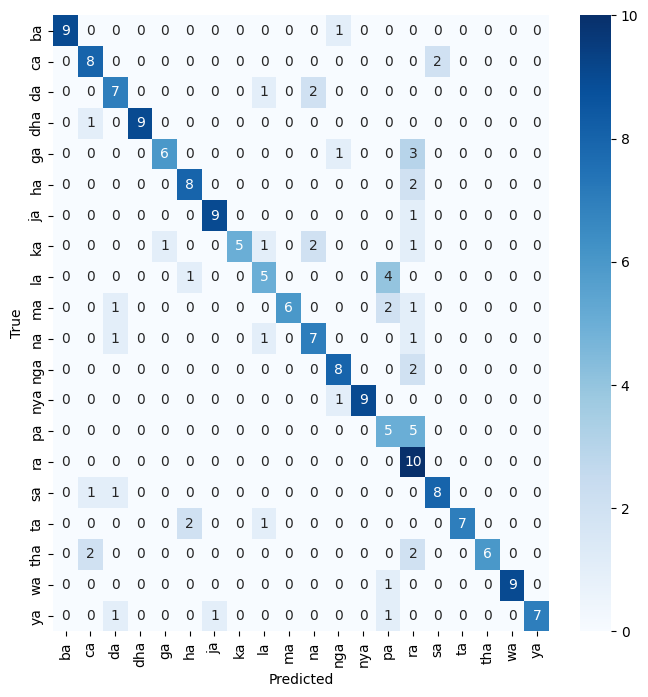

7/7 [==============================] - 44s 6s/step - loss: 1.0397 - accuracy: 0.7400
Loss    : 1.04
Accuracy: 74.0%
FINISHED predicting with model f_15 ... 

START predicting with model f_16 ...
==== CONFUSION MATRIX FOR MODEL f_16 ====


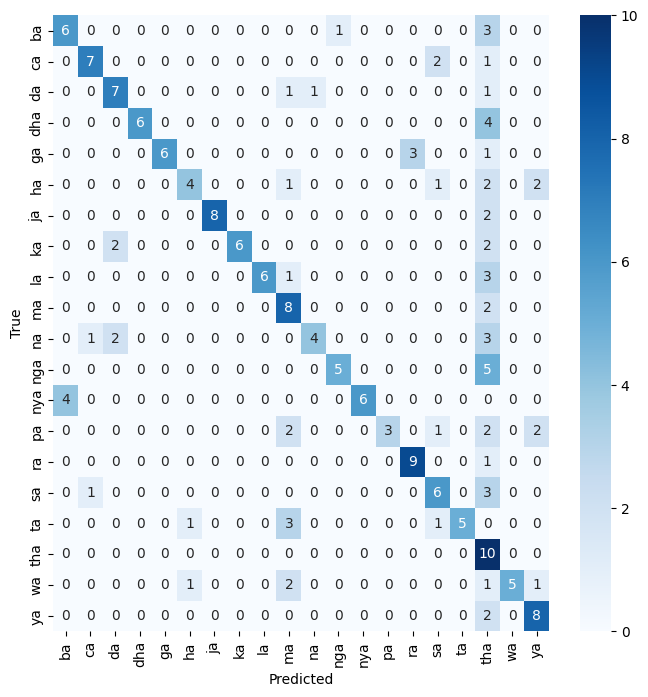

7/7 [==============================] - 44s 6s/step - loss: 1.7162 - accuracy: 0.6250
Loss    : 1.716
Accuracy: 62.5%
FINISHED predicting with model f_16 ... 

START predicting with model f_17 ...
==== CONFUSION MATRIX FOR MODEL f_17 ====


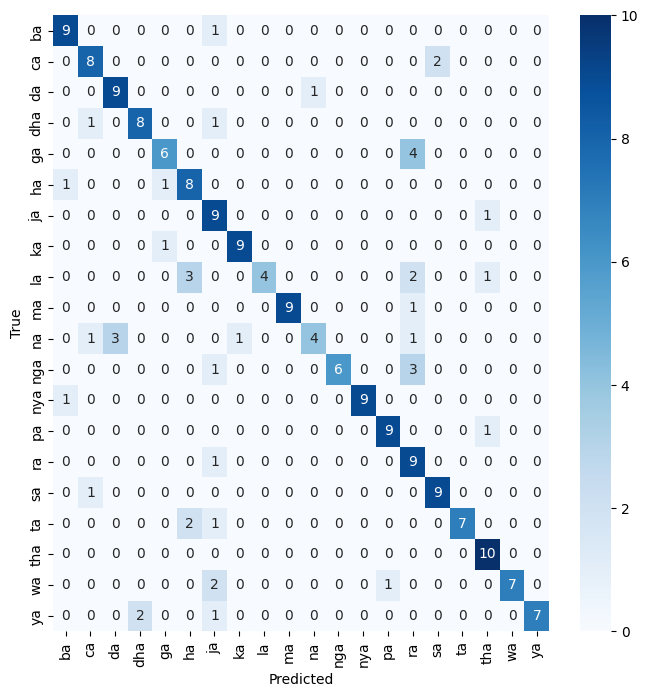

7/7 [==============================] - 44s 6s/step - loss: 1.3190 - accuracy: 0.7800
Loss    : 1.319
Accuracy: 78.0%
FINISHED predicting with model f_17 ... 

START predicting with model f_18 ...
==== CONFUSION MATRIX FOR MODEL f_18 ====


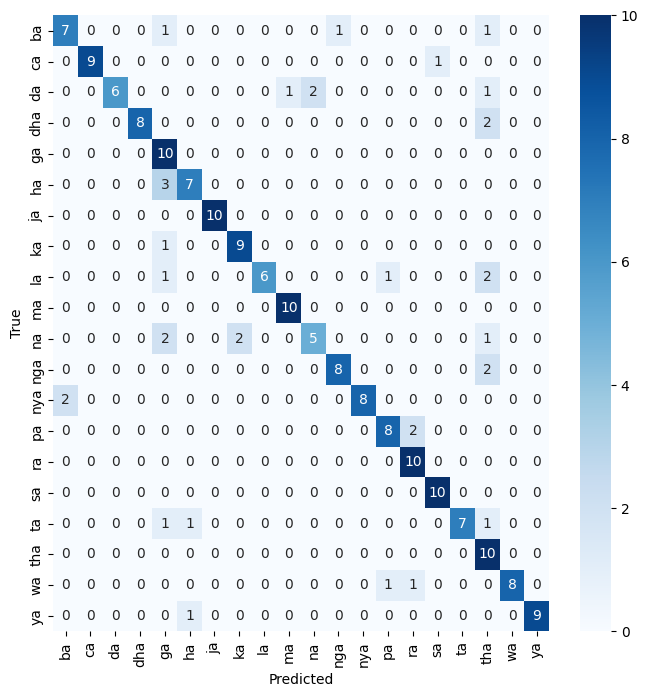

7/7 [==============================] - 44s 6s/step - loss: 0.6761 - accuracy: 0.8250
Loss    : 0.6761
Accuracy: 82.5%
FINISHED predicting with model f_18 ... 

START predicting with model f_19 ...
==== CONFUSION MATRIX FOR MODEL f_19 ====


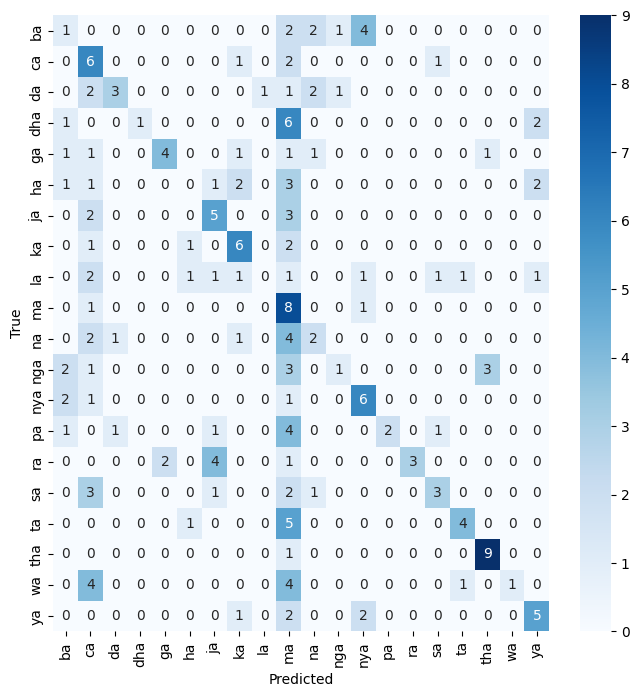

7/7 [==============================] - 24s 3s/step - loss: 2.4495 - accuracy: 0.3500
Loss    : 2.45
Accuracy: 35.0%
FINISHED predicting with model f_19 ... 

START predicting with model f_20 ...
==== CONFUSION MATRIX FOR MODEL f_20 ====


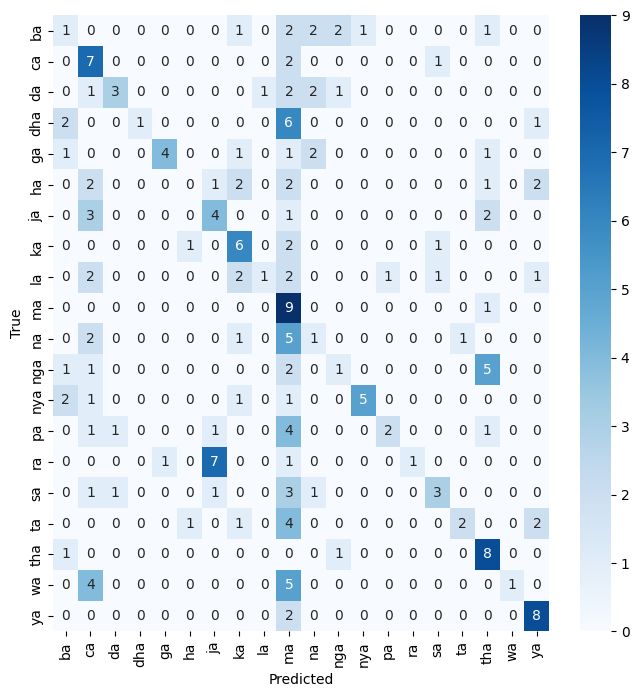

7/7 [==============================] - 22s 3s/step - loss: 2.9713 - accuracy: 0.3400
Loss    : 2.971
Accuracy: 34.0%
FINISHED predicting with model f_20 ... 

START predicting with model f_21 ...
==== CONFUSION MATRIX FOR MODEL f_21 ====


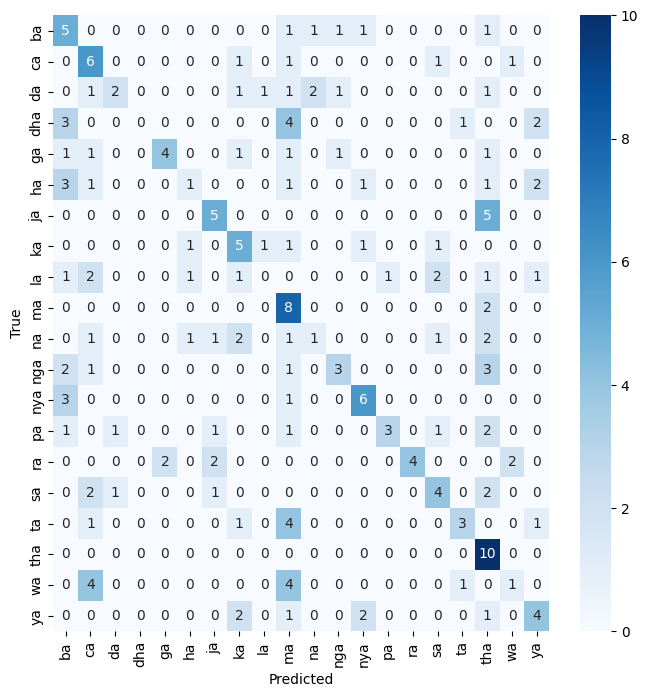

7/7 [==============================] - 22s 3s/step - loss: 2.4049 - accuracy: 0.3750
Loss    : 2.405
Accuracy: 37.5%
FINISHED predicting with model f_21 ... 

START predicting with model f_22 ...
==== CONFUSION MATRIX FOR MODEL f_22 ====


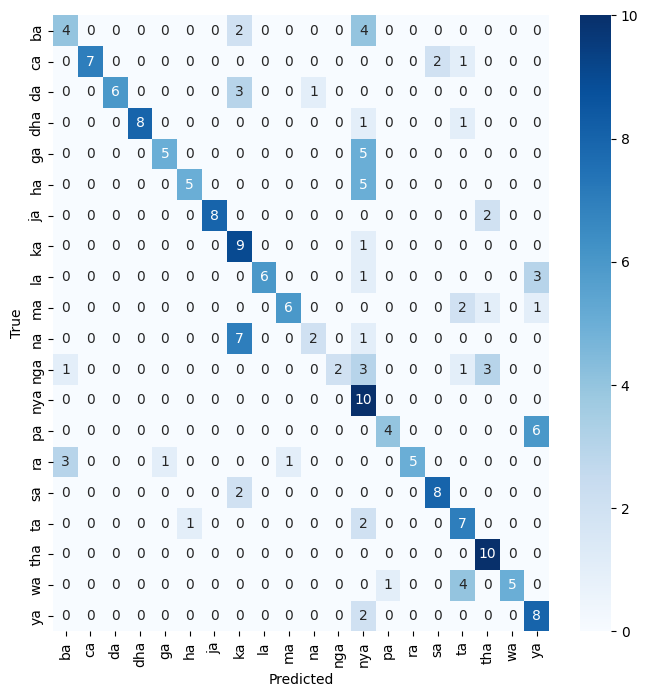

7/7 [==============================] - 22s 3s/step - loss: 1.3284 - accuracy: 0.6250
Loss    : 1.328
Accuracy: 62.5%
FINISHED predicting with model f_22 ... 

START predicting with model f_23 ...
==== CONFUSION MATRIX FOR MODEL f_23 ====


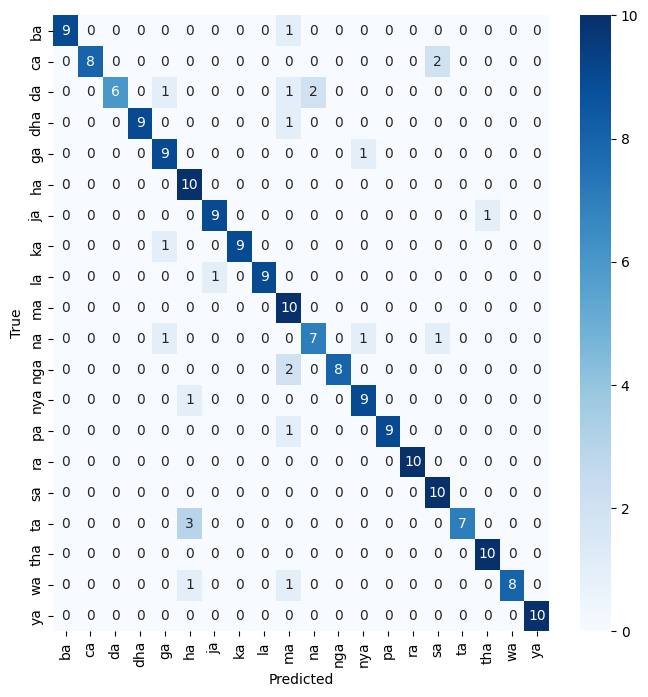

7/7 [==============================] - 24s 3s/step - loss: 0.5969 - accuracy: 0.8800
Loss    : 0.5969
Accuracy: 88.0%
FINISHED predicting with model f_23 ... 

START predicting with model f_24 ...
==== CONFUSION MATRIX FOR MODEL f_24 ====


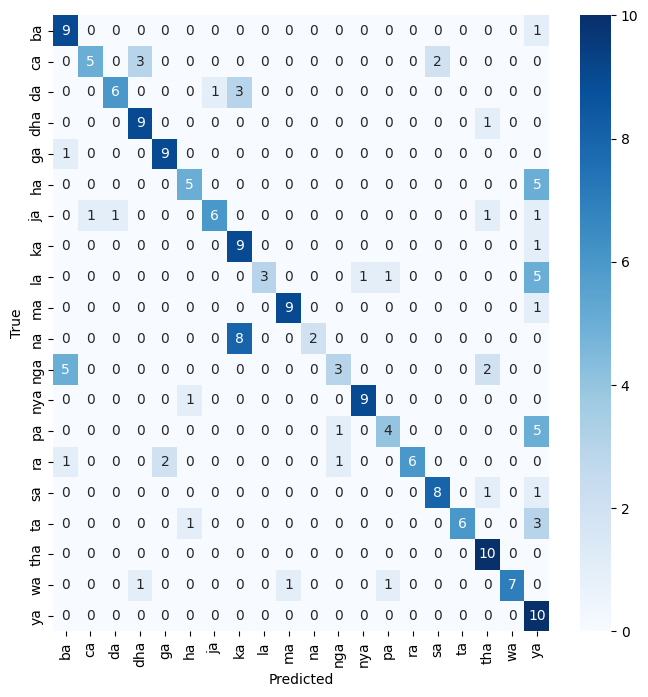

7/7 [==============================] - 22s 3s/step - loss: 1.0334 - accuracy: 0.6750
Loss    : 1.033
Accuracy: 67.5%
FINISHED predicting with model f_24 ... 

START predicting with model f_25 ...
==== CONFUSION MATRIX FOR MODEL f_25 ====


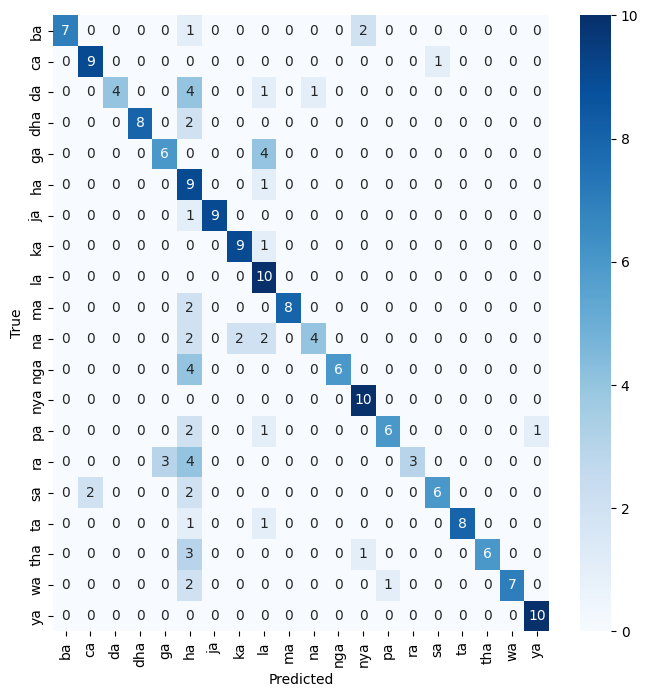

7/7 [==============================] - 22s 3s/step - loss: 1.6557 - accuracy: 0.7250
Loss    : 1.656
Accuracy: 72.5%
FINISHED predicting with model f_25 ... 

START predicting with model f_26 ...
==== CONFUSION MATRIX FOR MODEL f_26 ====


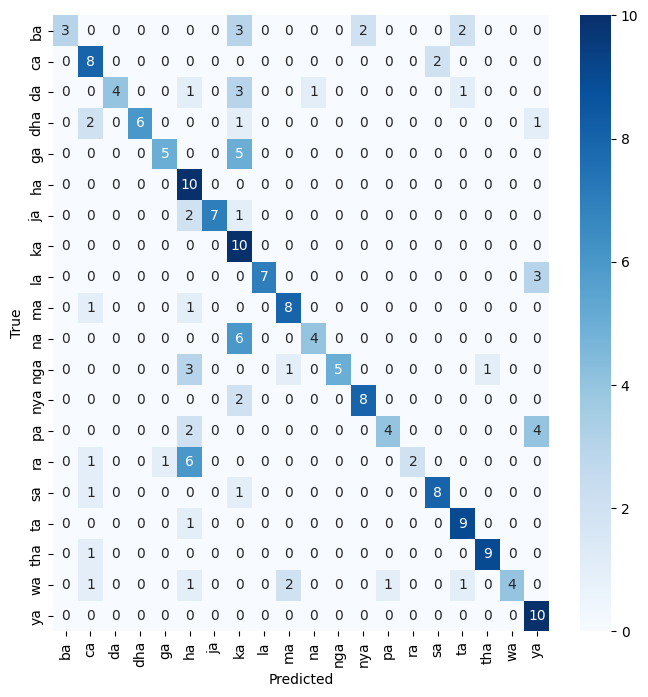

7/7 [==============================] - 22s 3s/step - loss: 1.7674 - accuracy: 0.6550
Loss    : 1.767
Accuracy: 65.5%
FINISHED predicting with model f_26 ... 

START predicting with model f_27 ...
==== CONFUSION MATRIX FOR MODEL f_27 ====


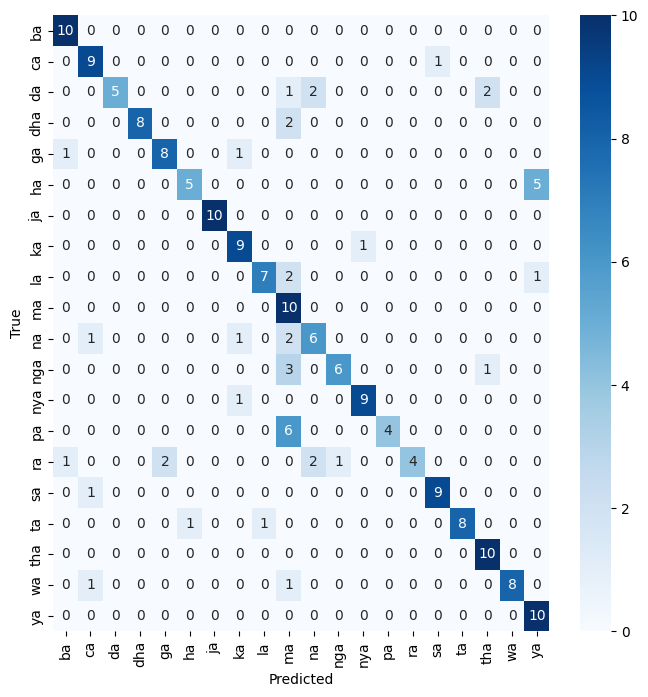

7/7 [==============================] - 25s 3s/step - loss: 0.8268 - accuracy: 0.7750
Loss    : 0.8268
Accuracy: 77.5%
FINISHED predicting with model f_27 ... 



In [13]:
results = pd.DataFrame(columns=['model_id', 'loss', 'accuracy'])

for id, model in loaded_models.items():
   
   print(f'START predicting with model {id} ...')
   
   y_pred = []  # store predicted labels
   y_true = []  # store true labels

   # iterate over the dataset
   for image_batch, label_batch in real_test_ds_mapped:   # use dataset.unbatch() with repeat
      # append true labels
      y_true.append(label_batch)
      # compute predictions
      preds = model.predict(image_batch, verbose=0)
      # append predicted labels
      y_pred.append(np.argmax(preds, axis = - 1))

   # convert the true and predicted labels into tensors
   correct_labels = tf.concat([item for item in y_true], axis = 0)
   predicted_labels = tf.concat([item for item in y_pred], axis = 0)

   print(f'==== CONFUSION MATRIX FOR MODEL {id} ====')
   plot_confusion_m(correct_labels, predicted_labels, class_names, figsize=(8,8))
   
   loss, acc = model.evaluate(real_test_ds_mapped)
   print("Loss    : {:.4}".format(loss))
   print("Accuracy: {:.4}%".format(acc*100))
   
   result_df = pd.DataFrame({'model_id': [id], 'loss': [loss], 'accuracy': [acc]})
   results = pd.concat([results, result_df], ignore_index=True)
   
   print(f'FINISHED predicting with model {id} ... \n')

# Check Errors

==== MODEL f_1 ====


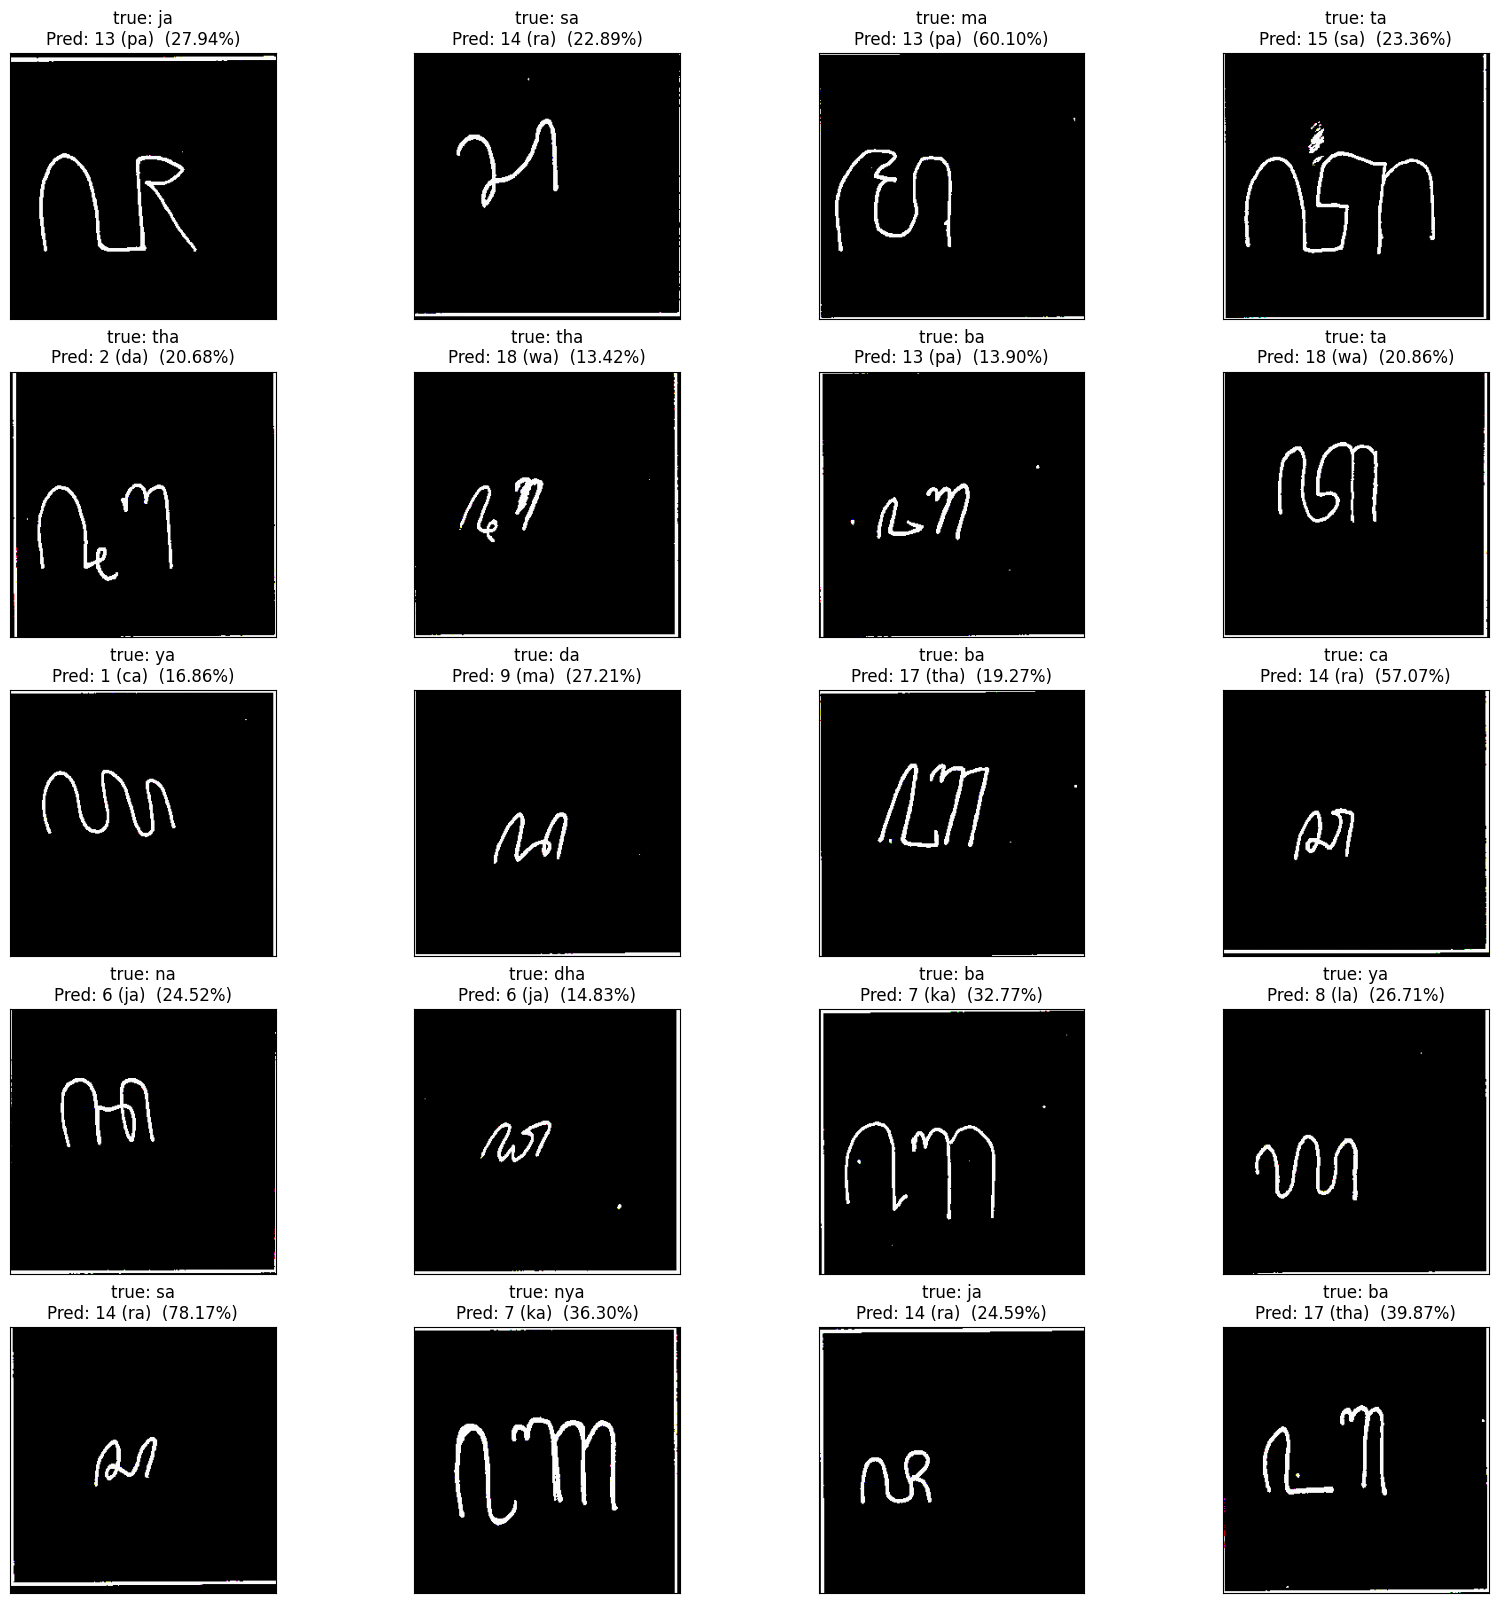

==== END MODEL f_1 ====


==== MODEL f_2 ====


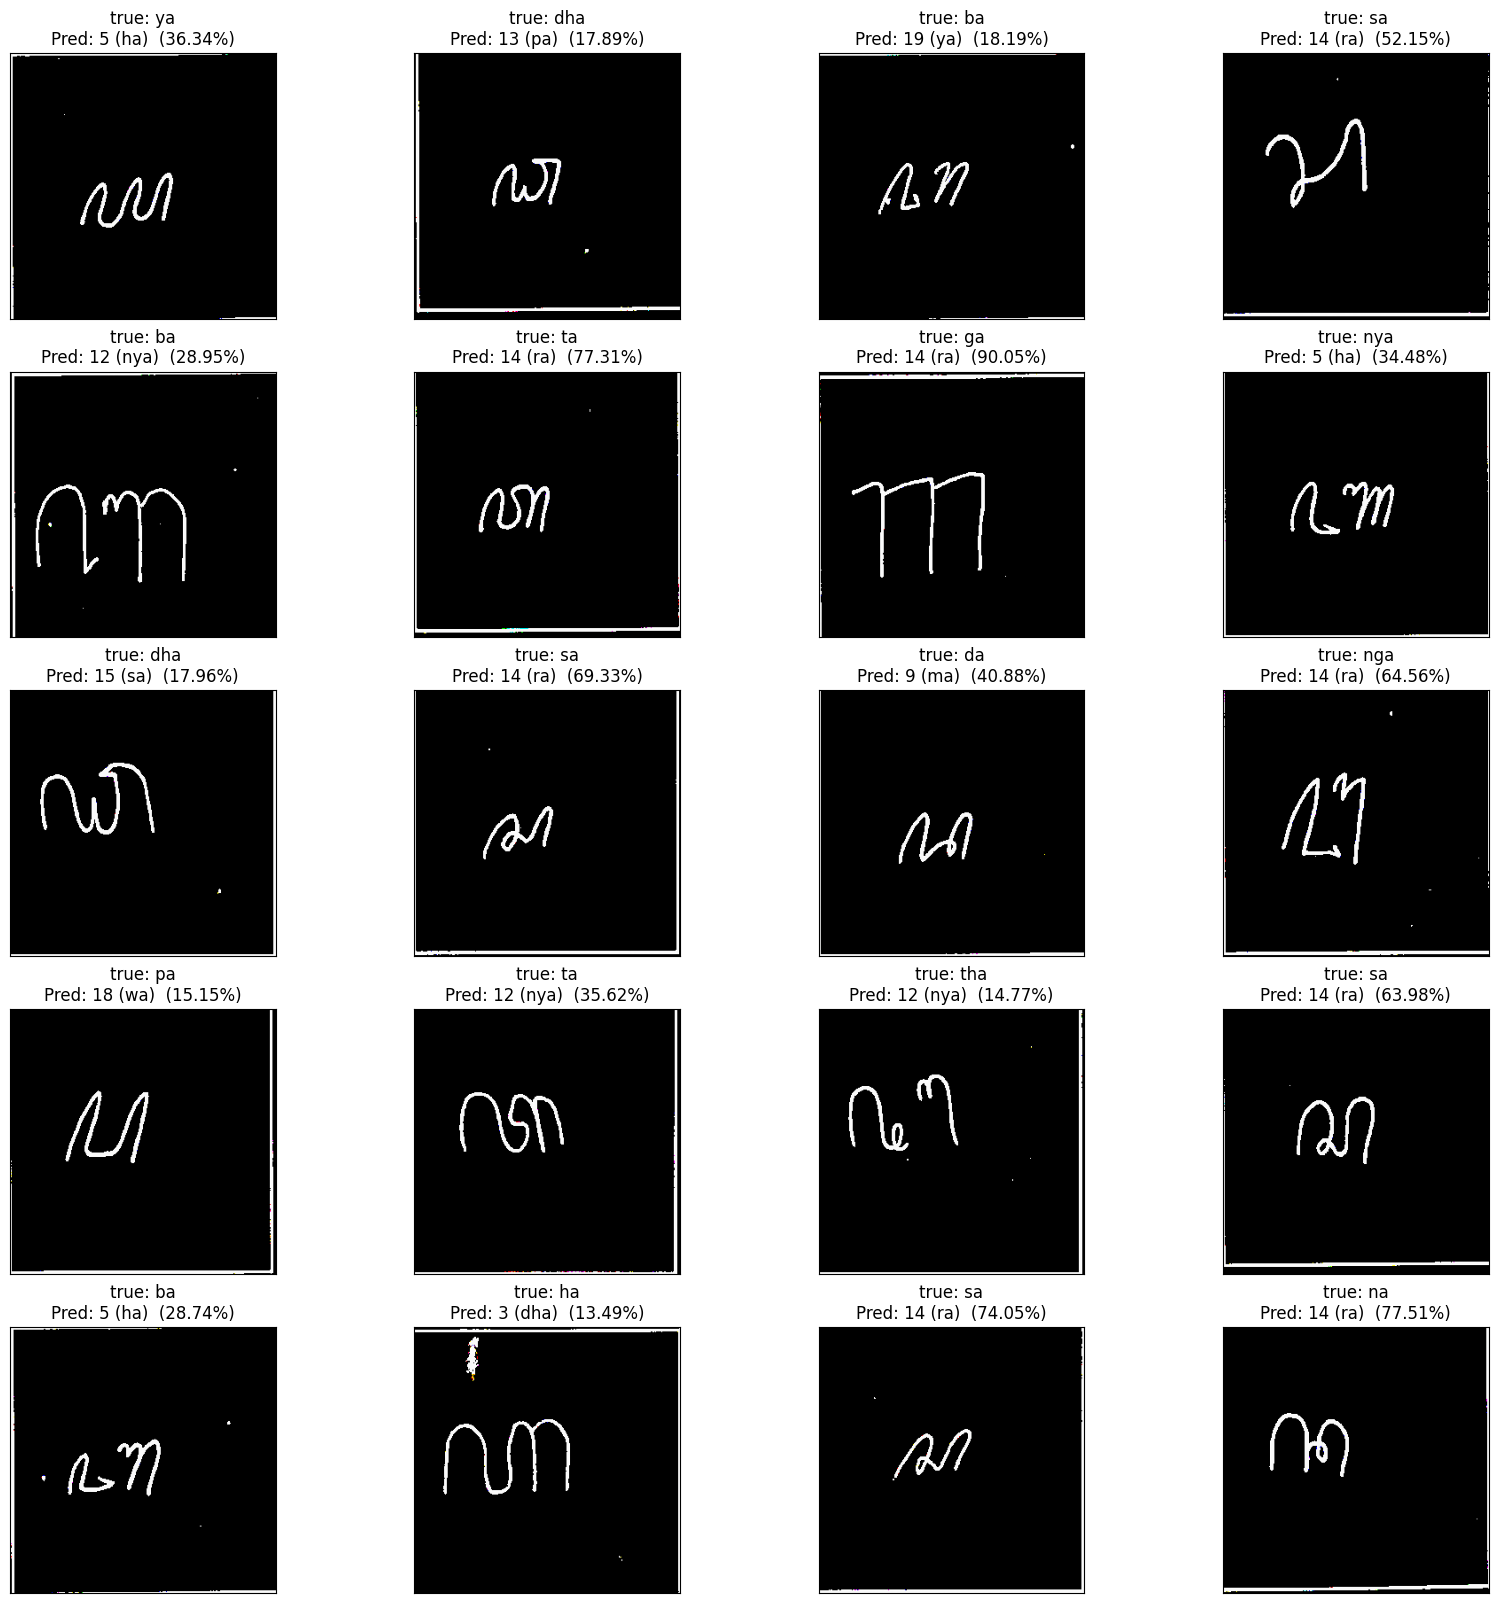

==== END MODEL f_2 ====


==== MODEL f_3 ====


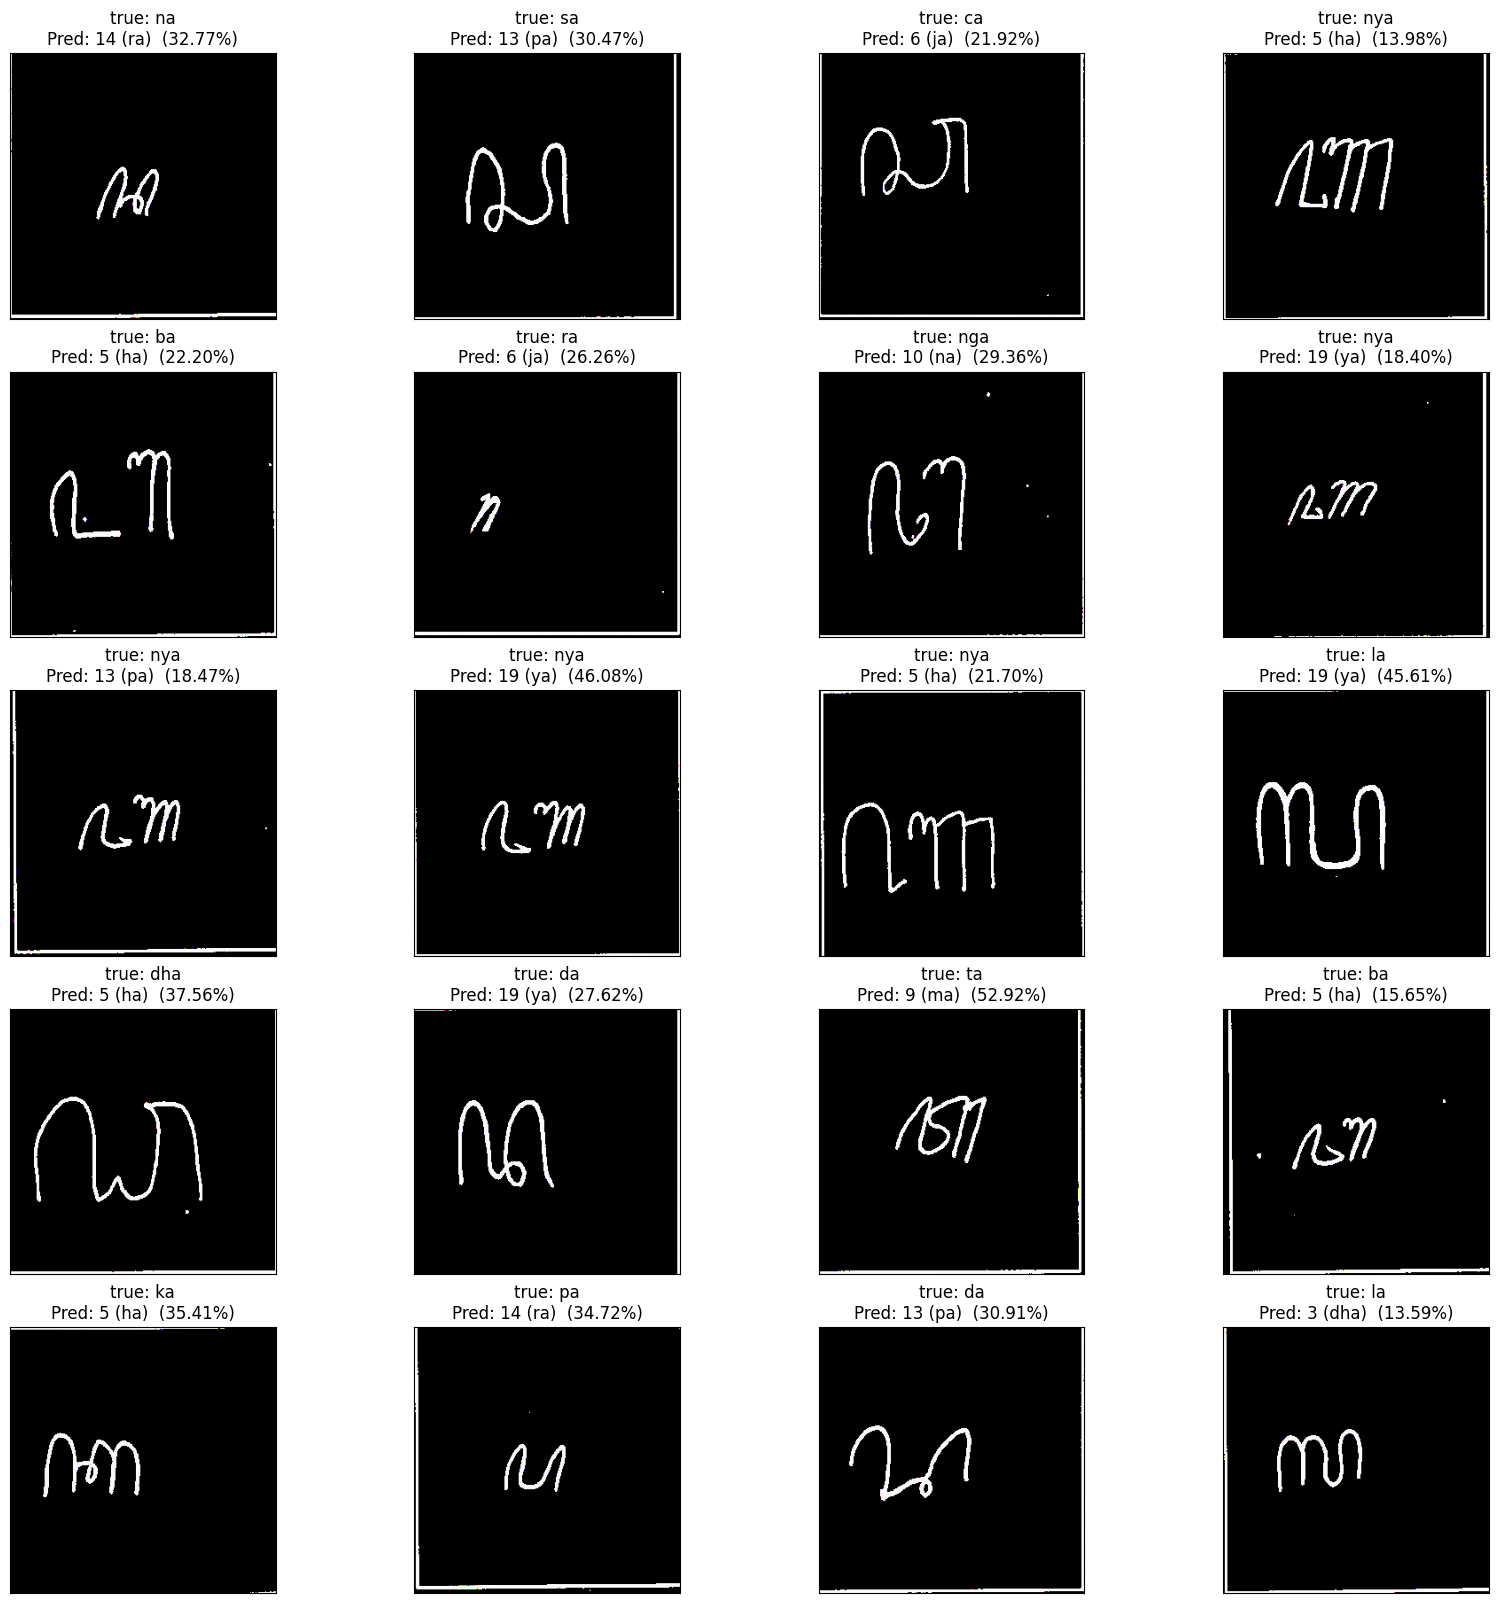

==== END MODEL f_3 ====


==== MODEL f_4 ====


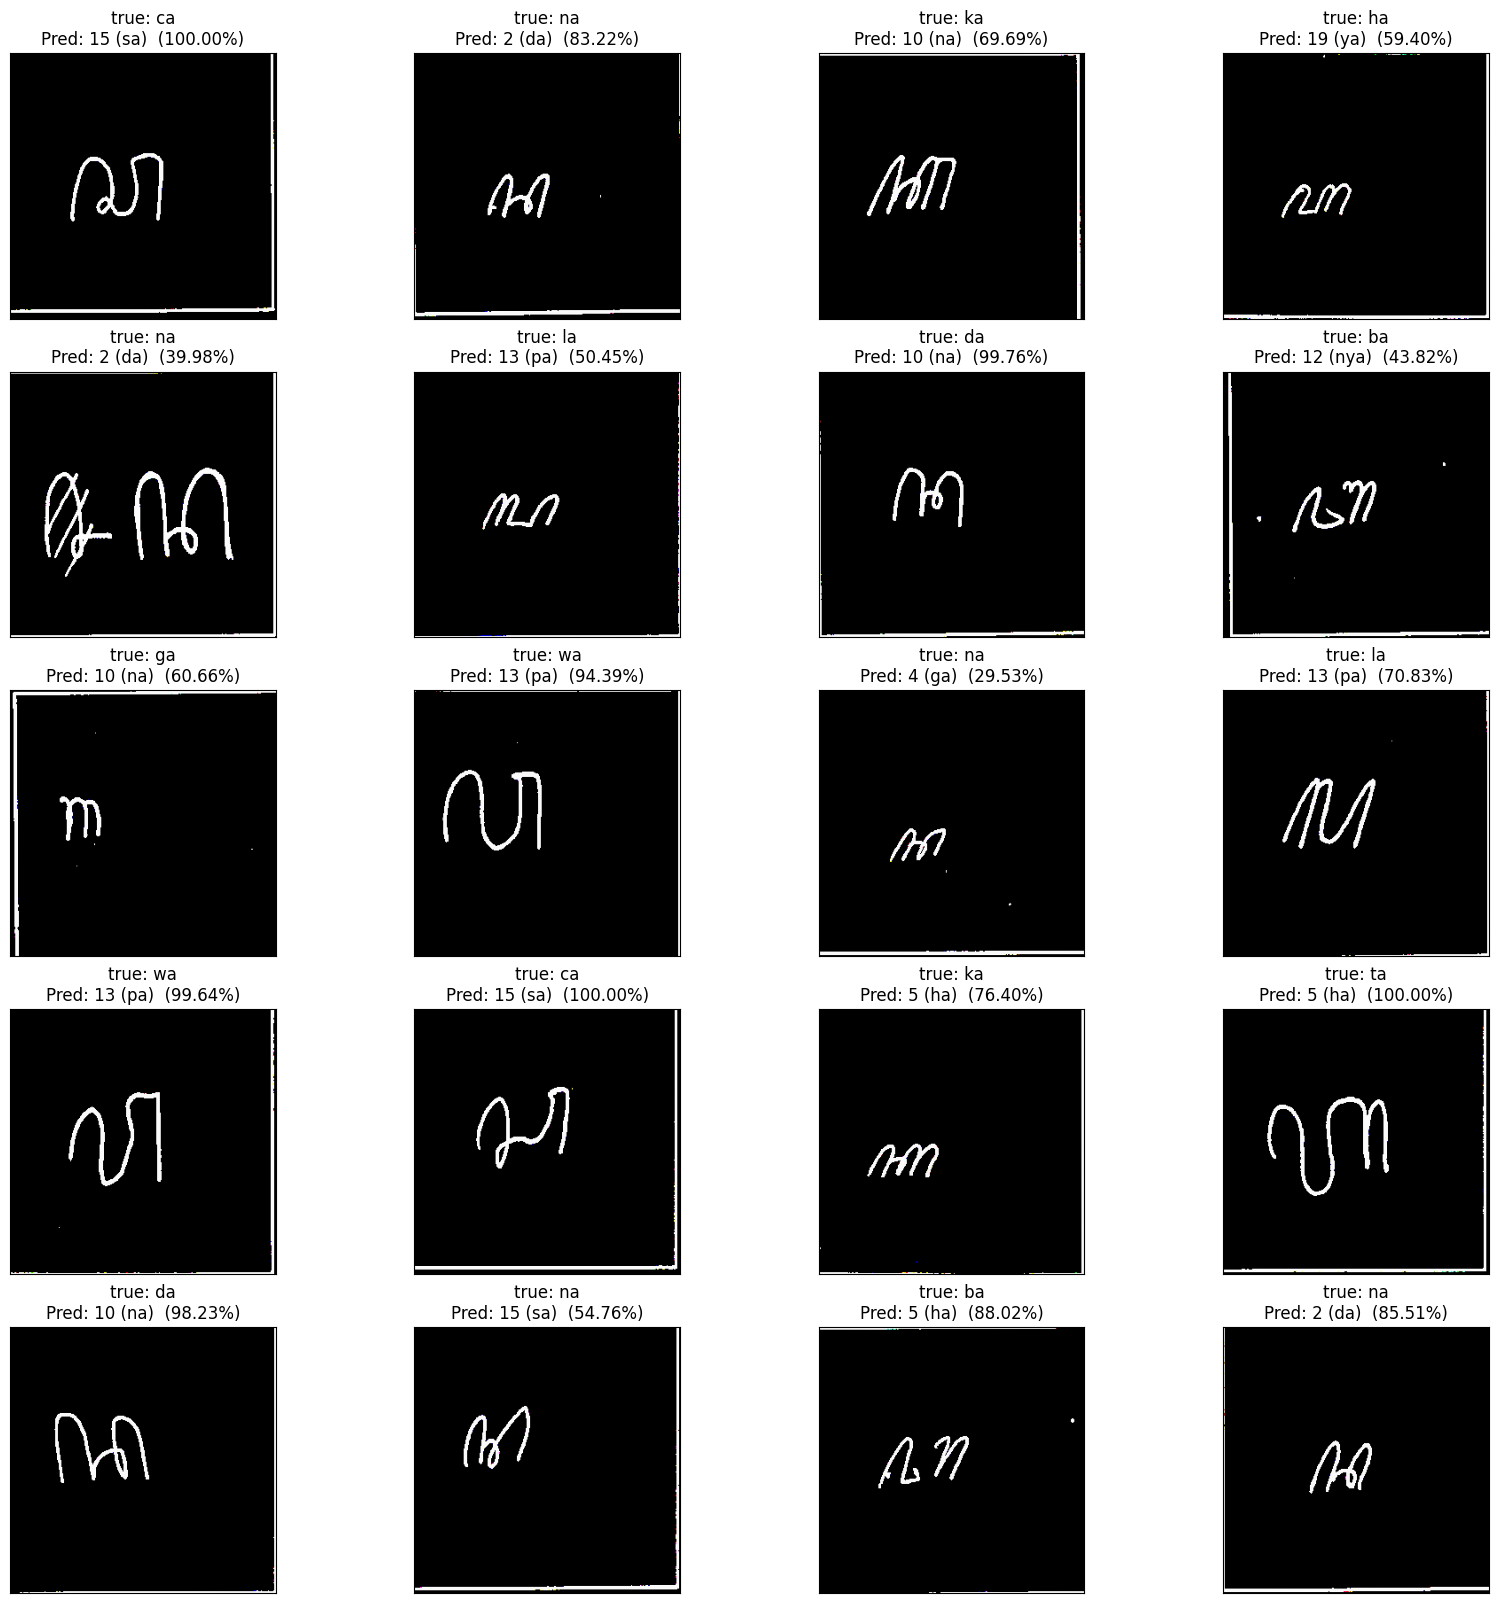

==== END MODEL f_4 ====


==== MODEL f_5 ====


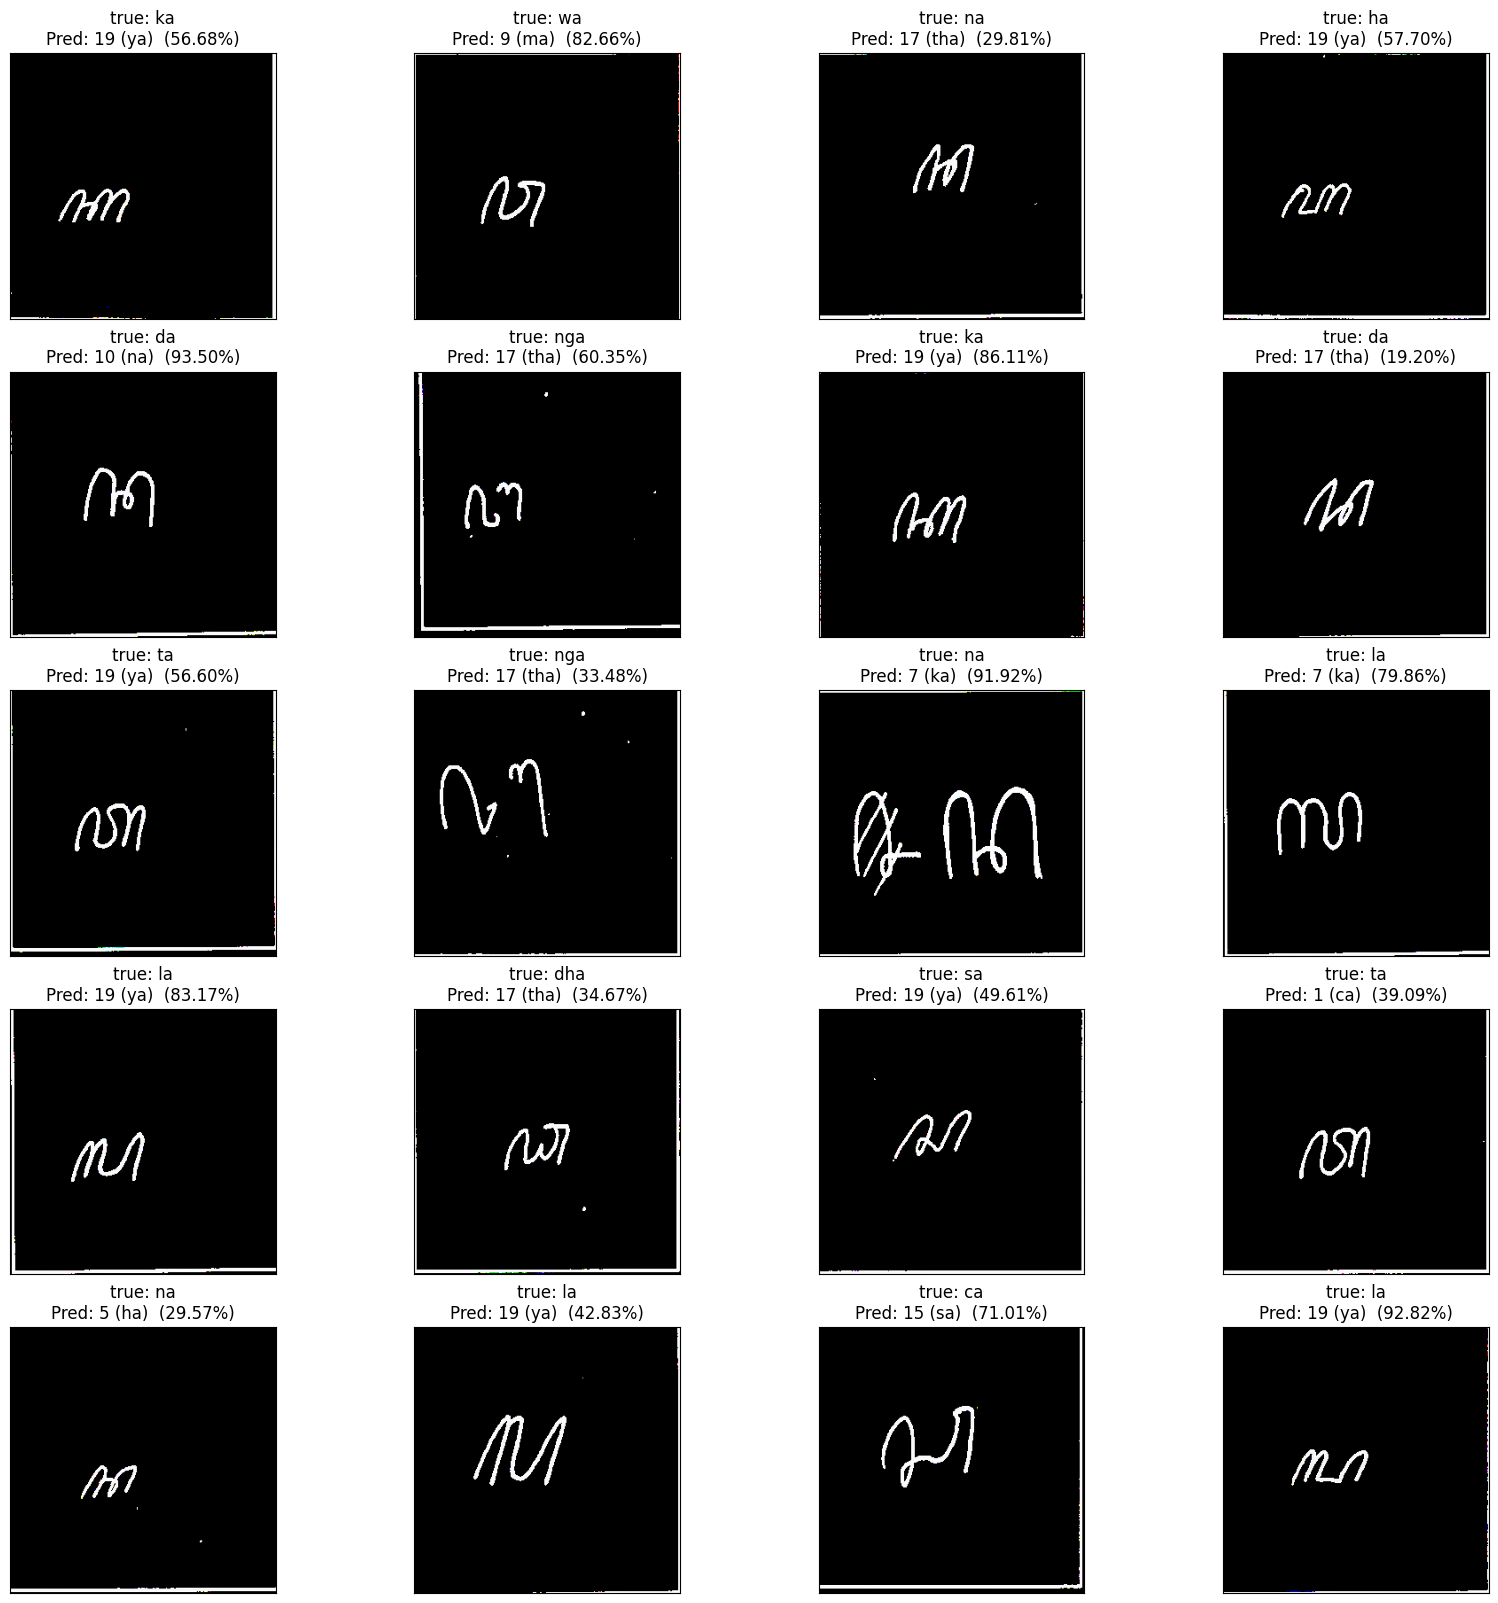

==== END MODEL f_5 ====


==== MODEL f_6 ====


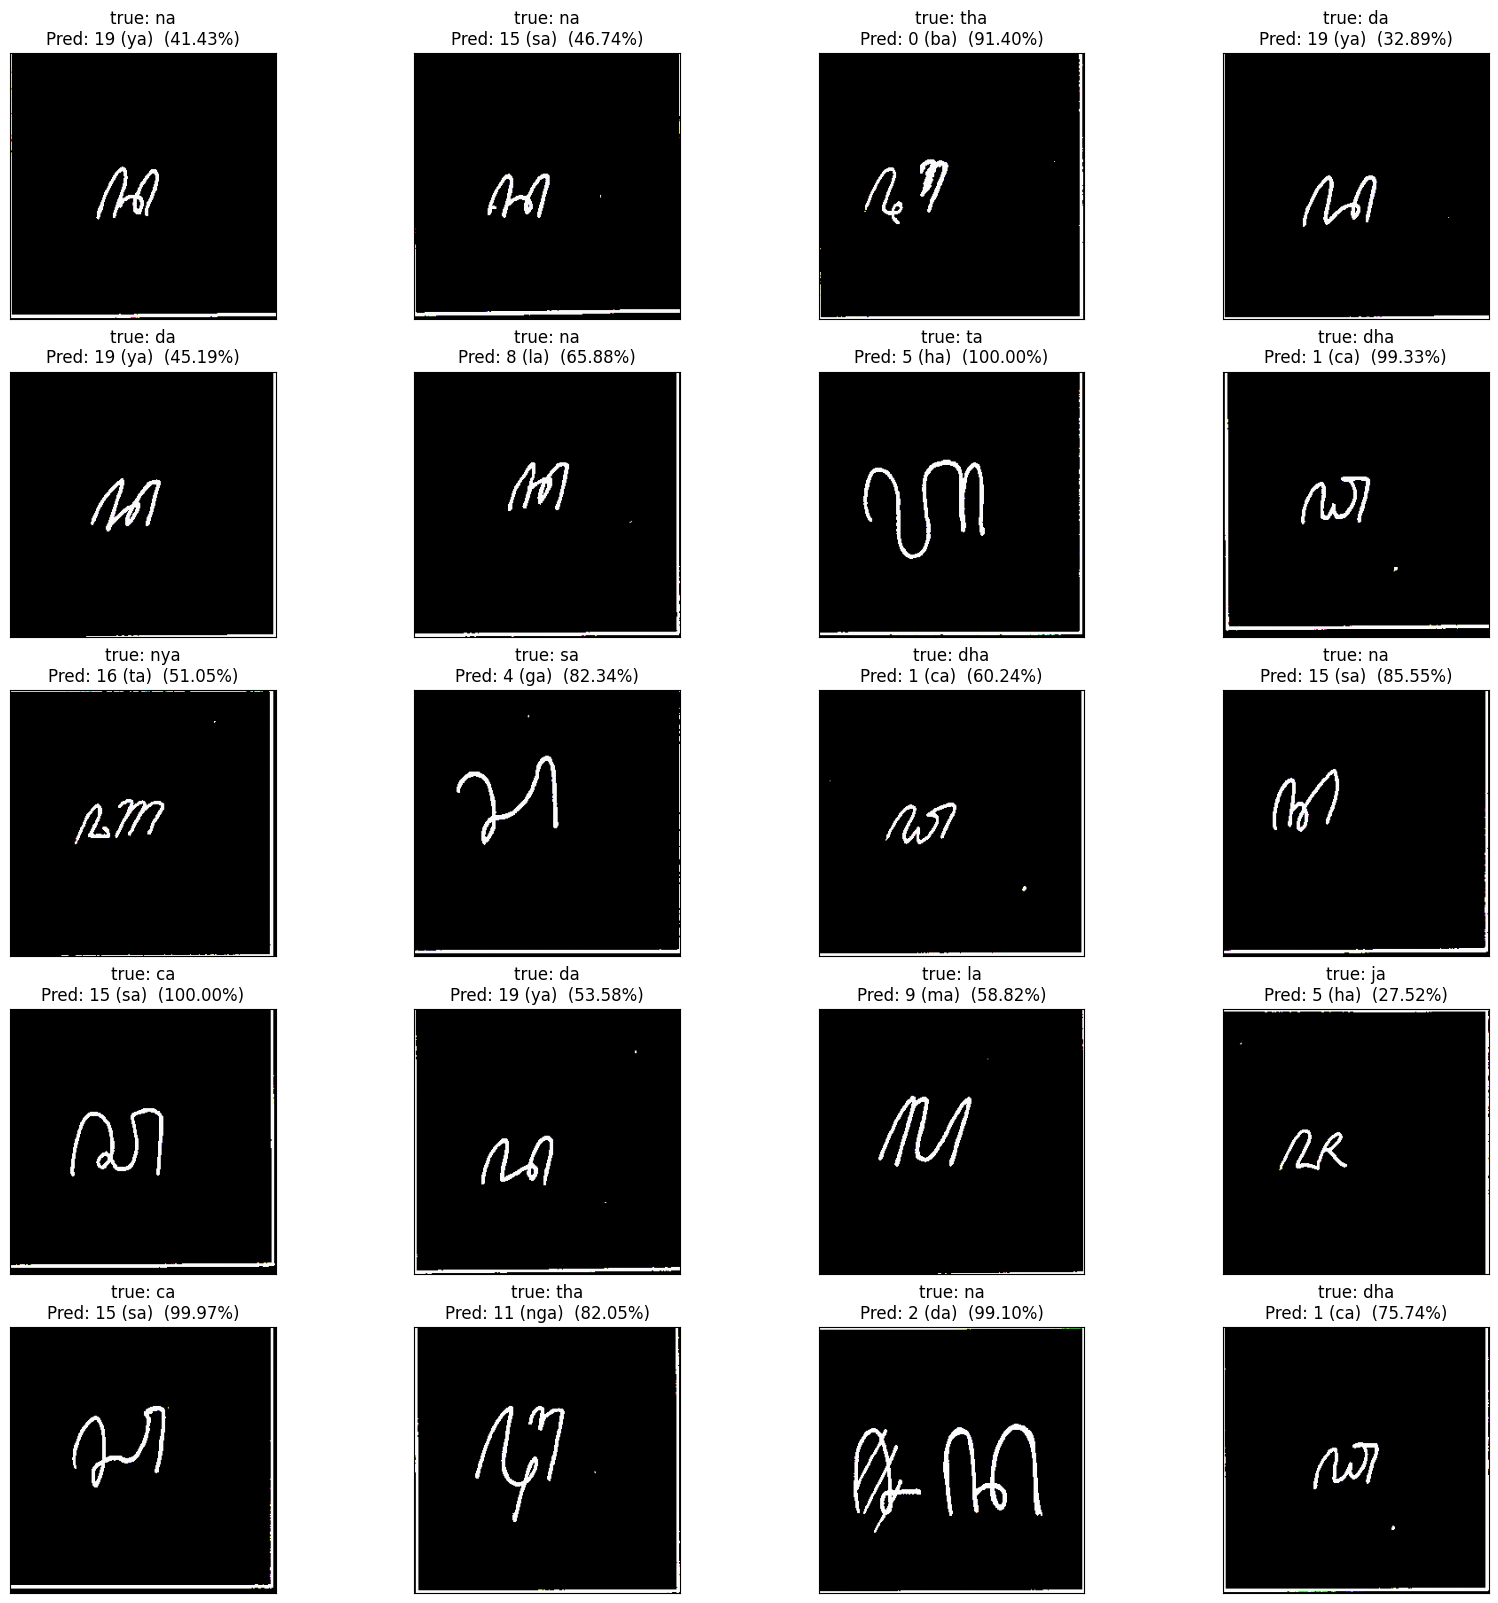

==== END MODEL f_6 ====


==== MODEL f_7 ====


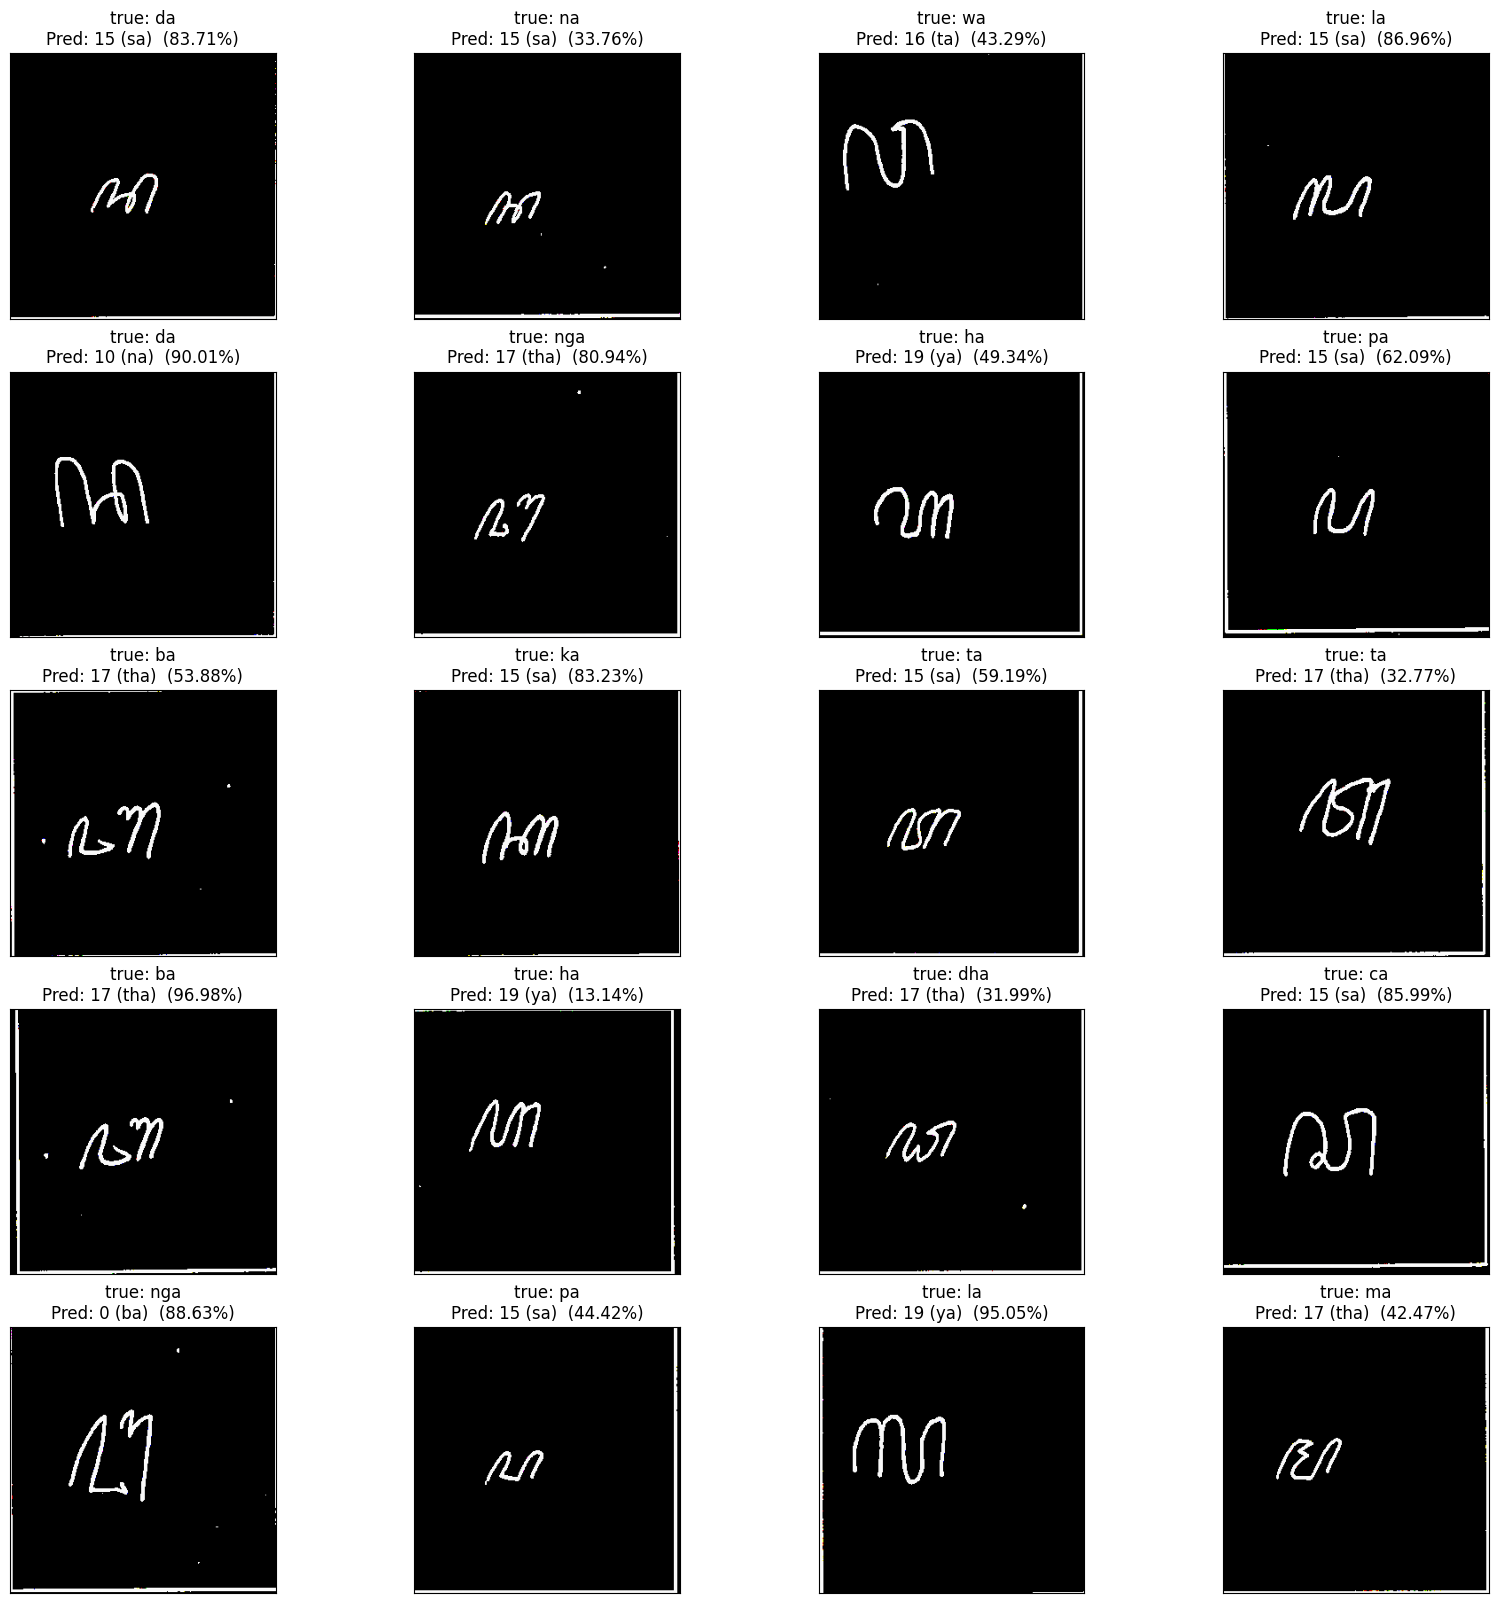

==== END MODEL f_7 ====


==== MODEL f_8 ====


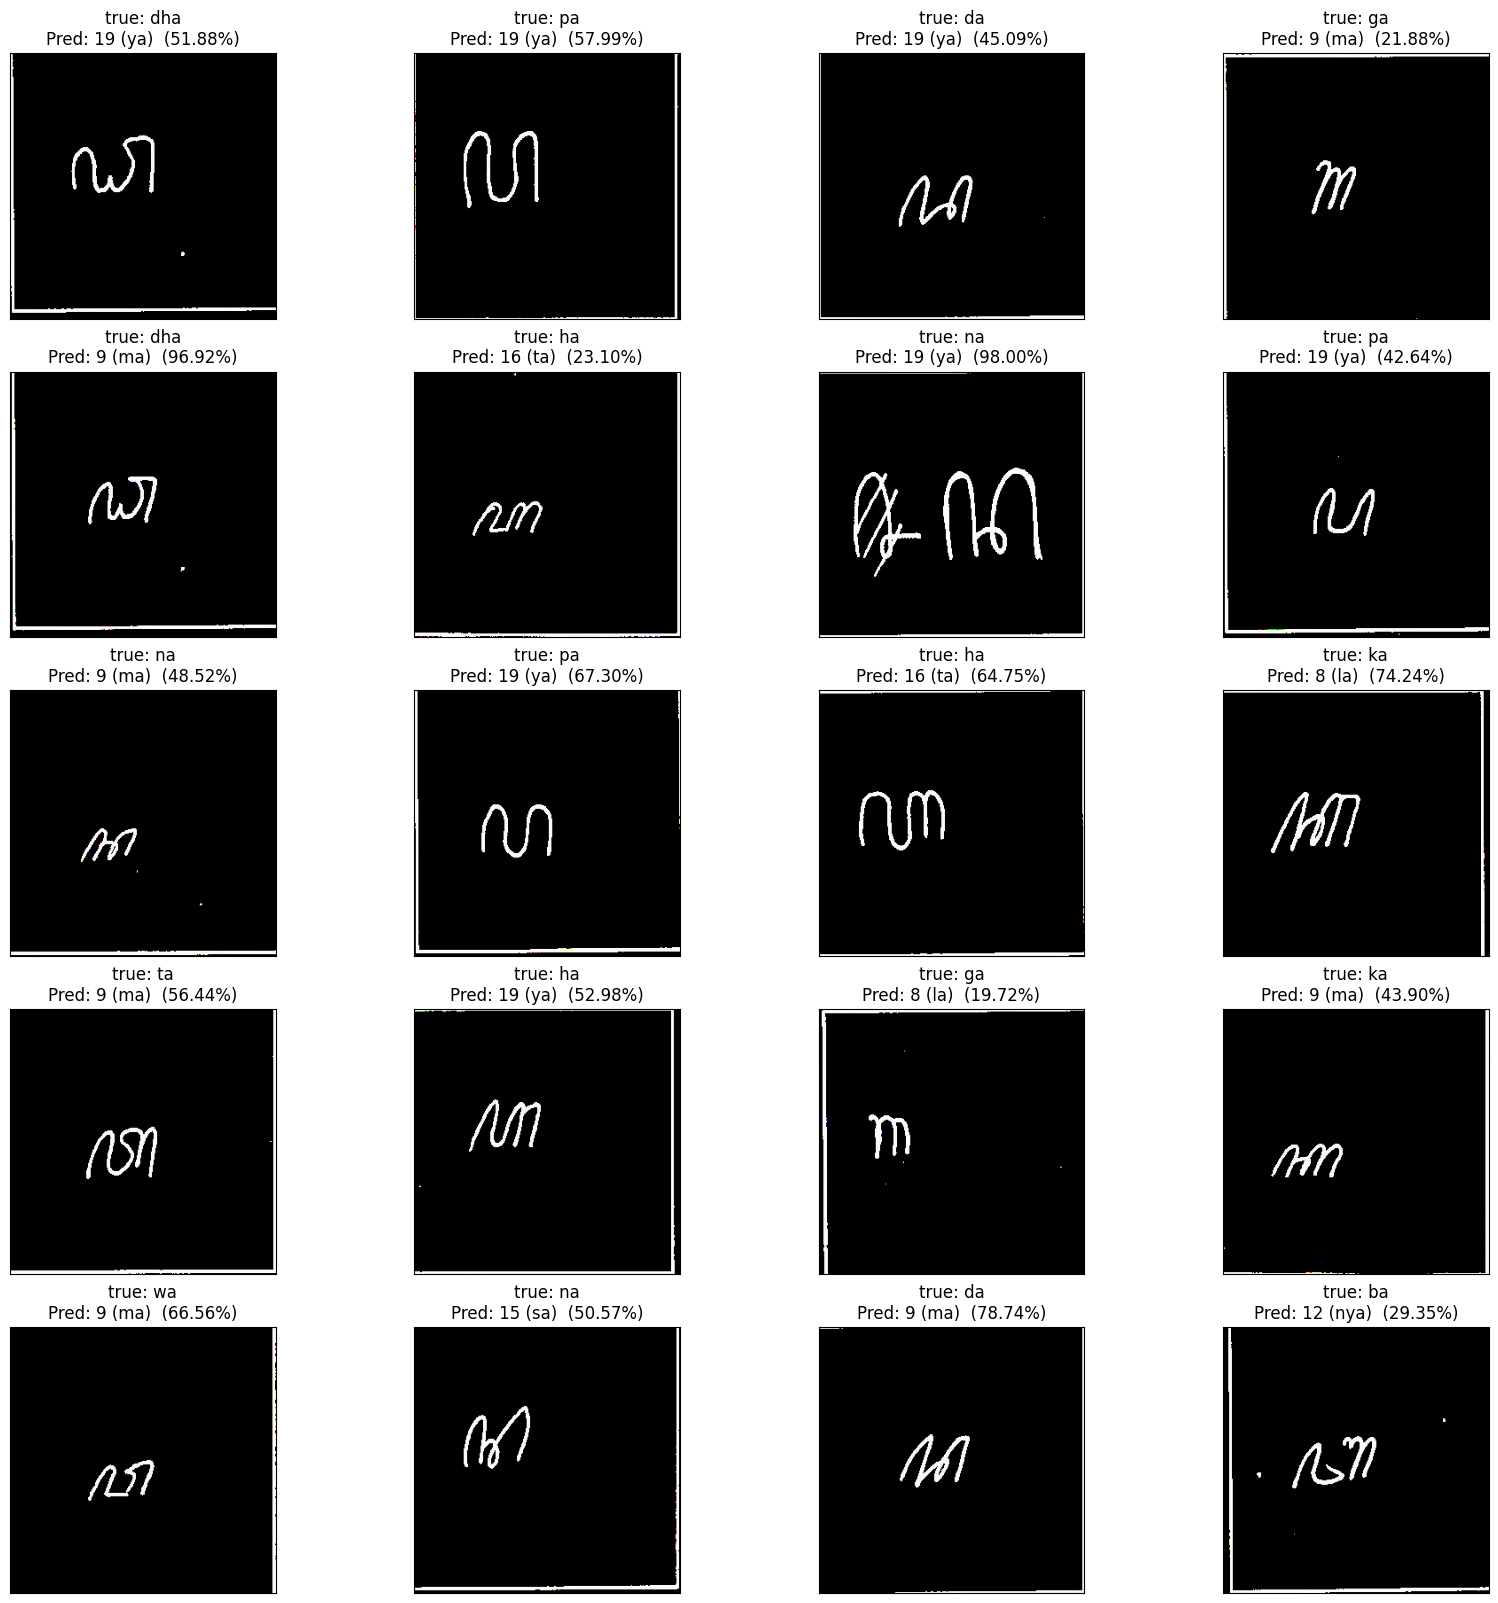

==== END MODEL f_8 ====


==== MODEL f_9 ====


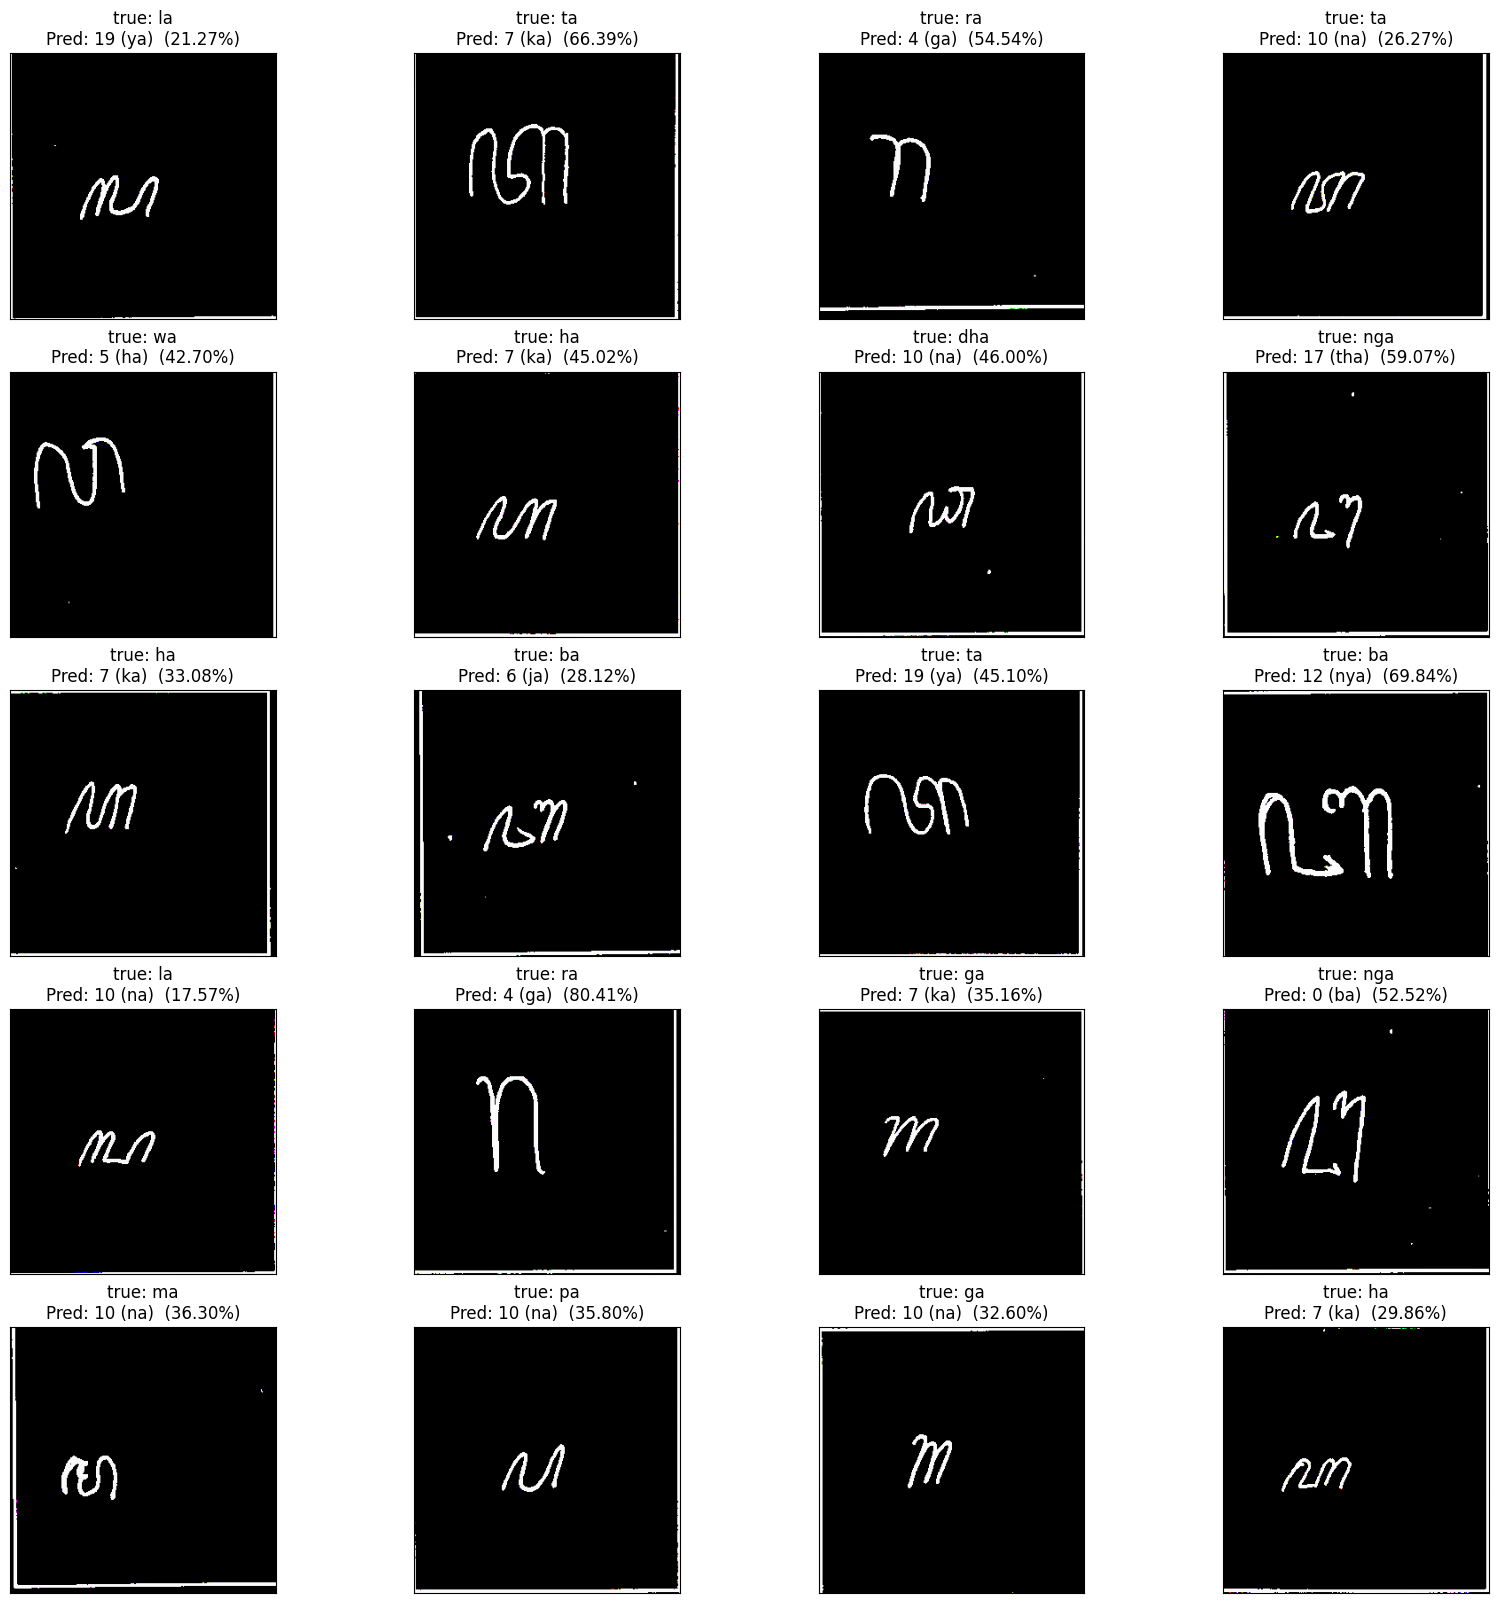

==== END MODEL f_9 ====


==== MODEL f_10 ====


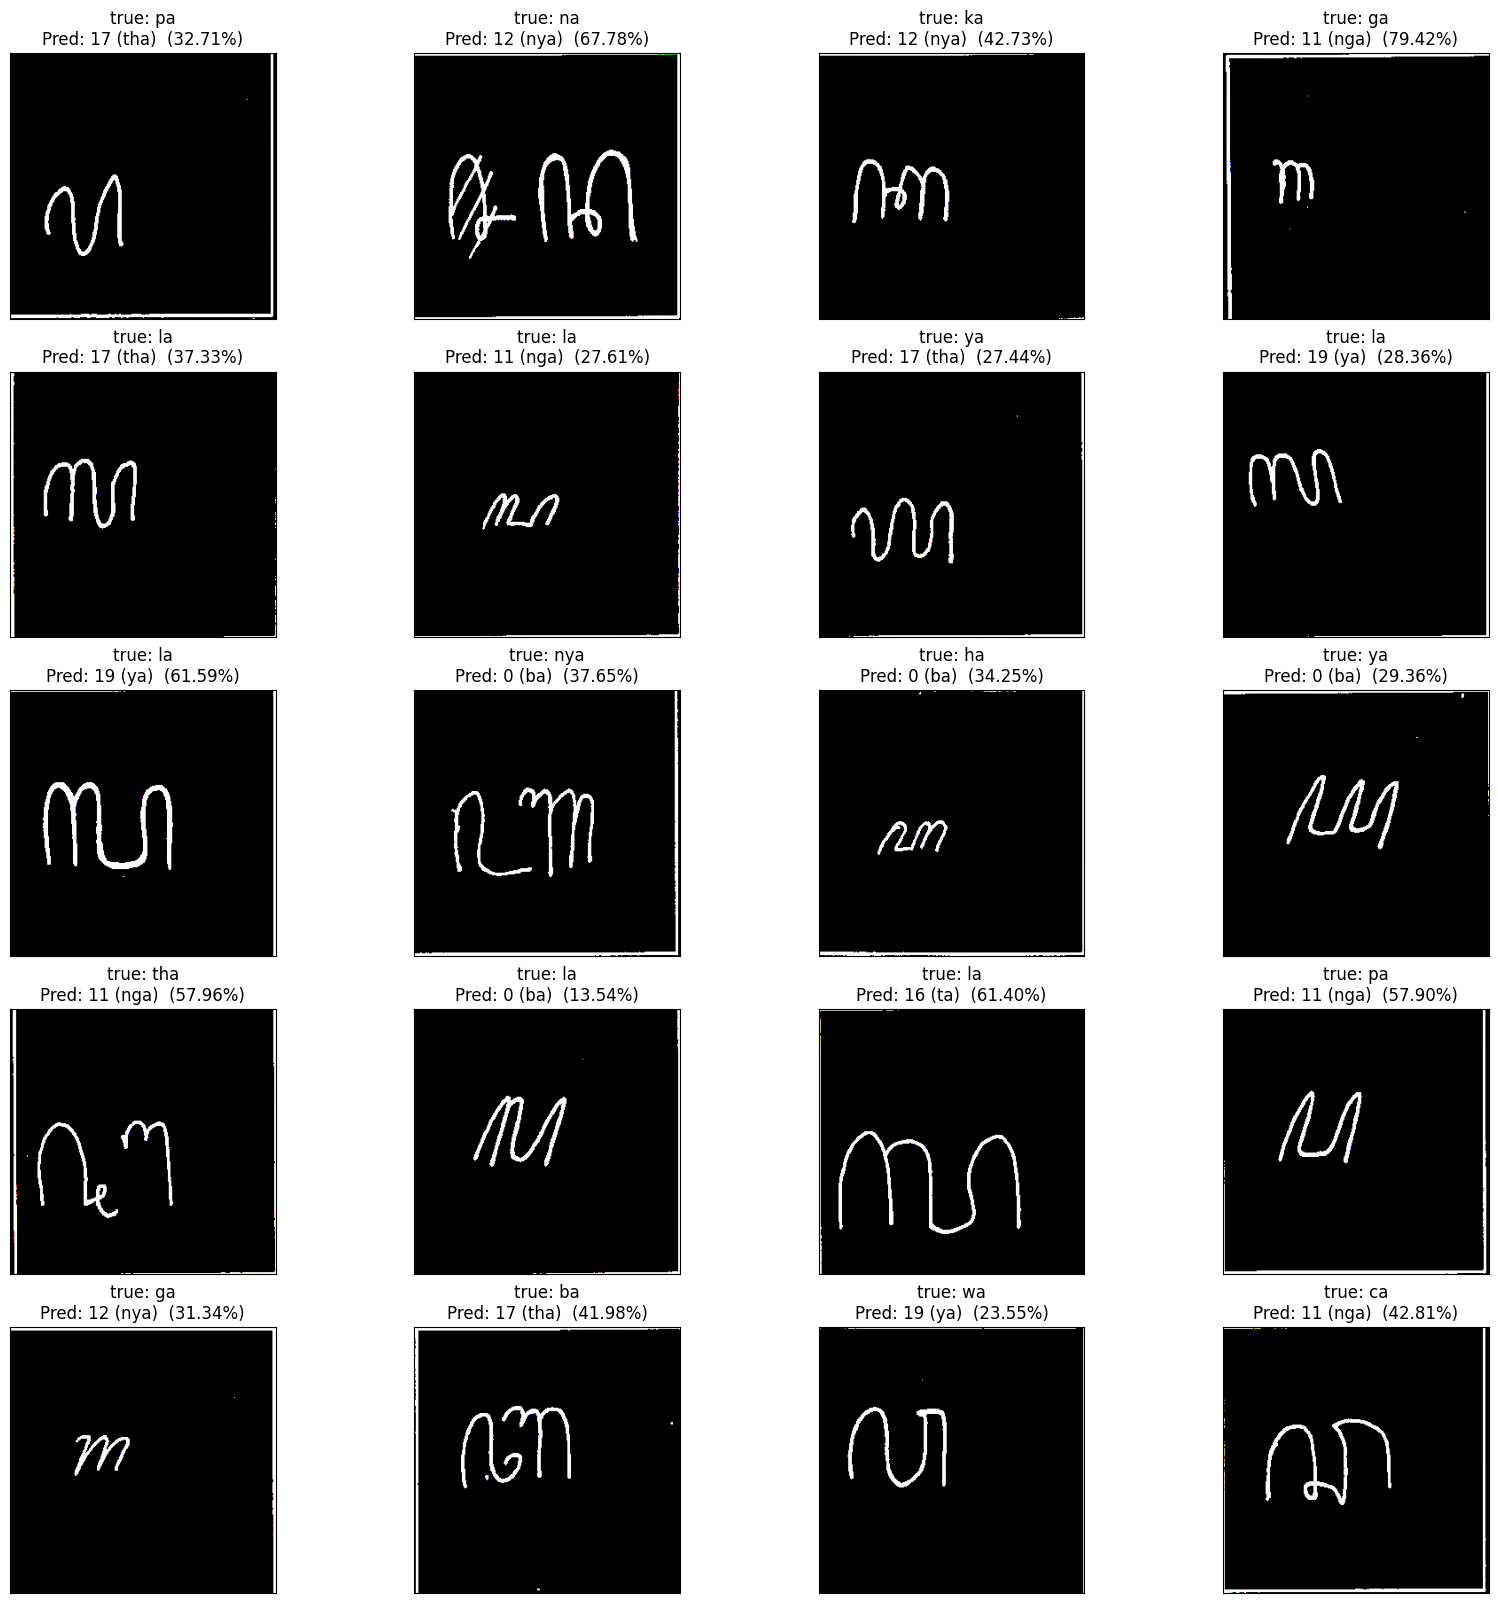

==== END MODEL f_10 ====


==== MODEL f_11 ====


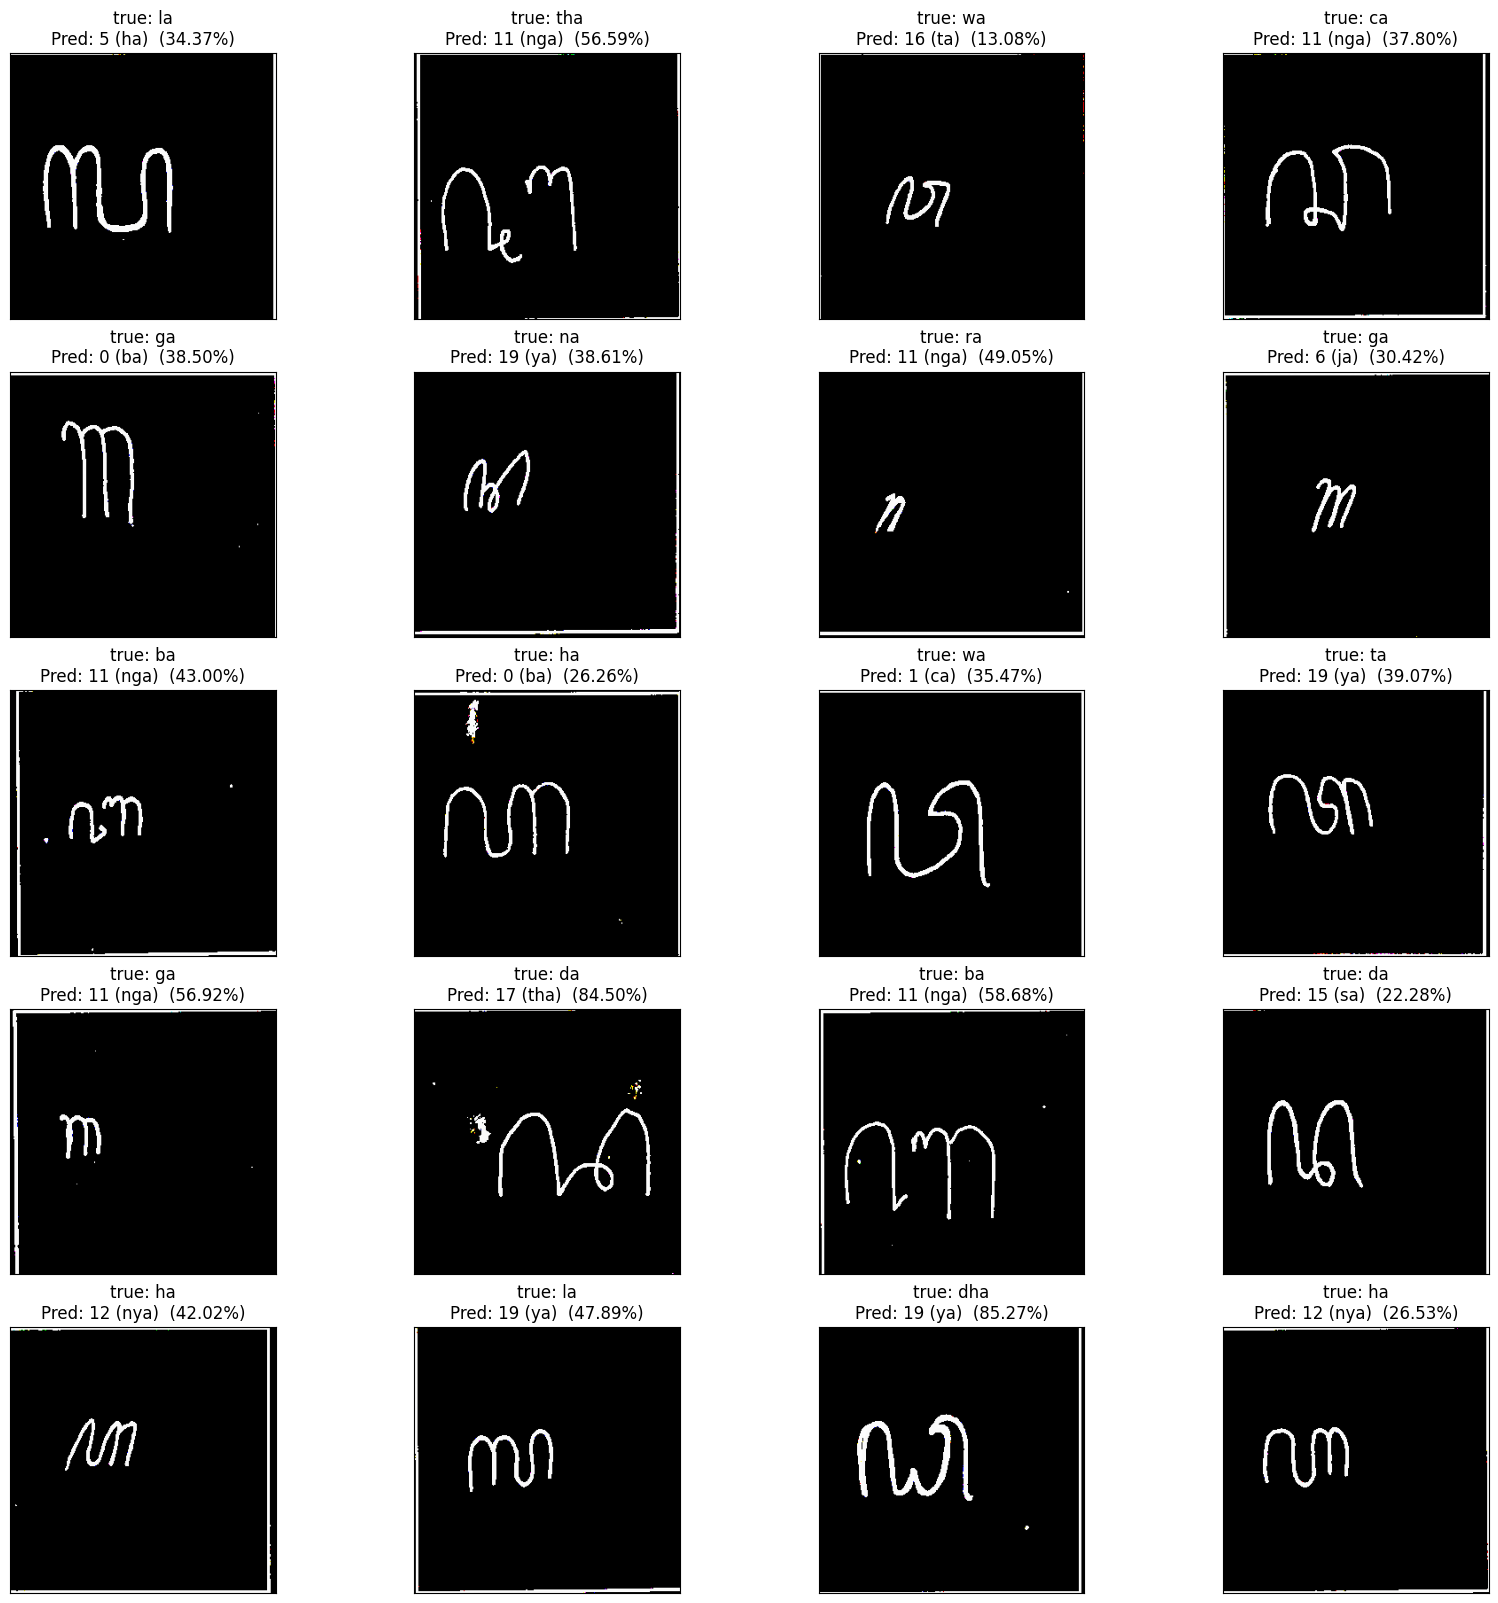

==== END MODEL f_11 ====


==== MODEL f_12 ====


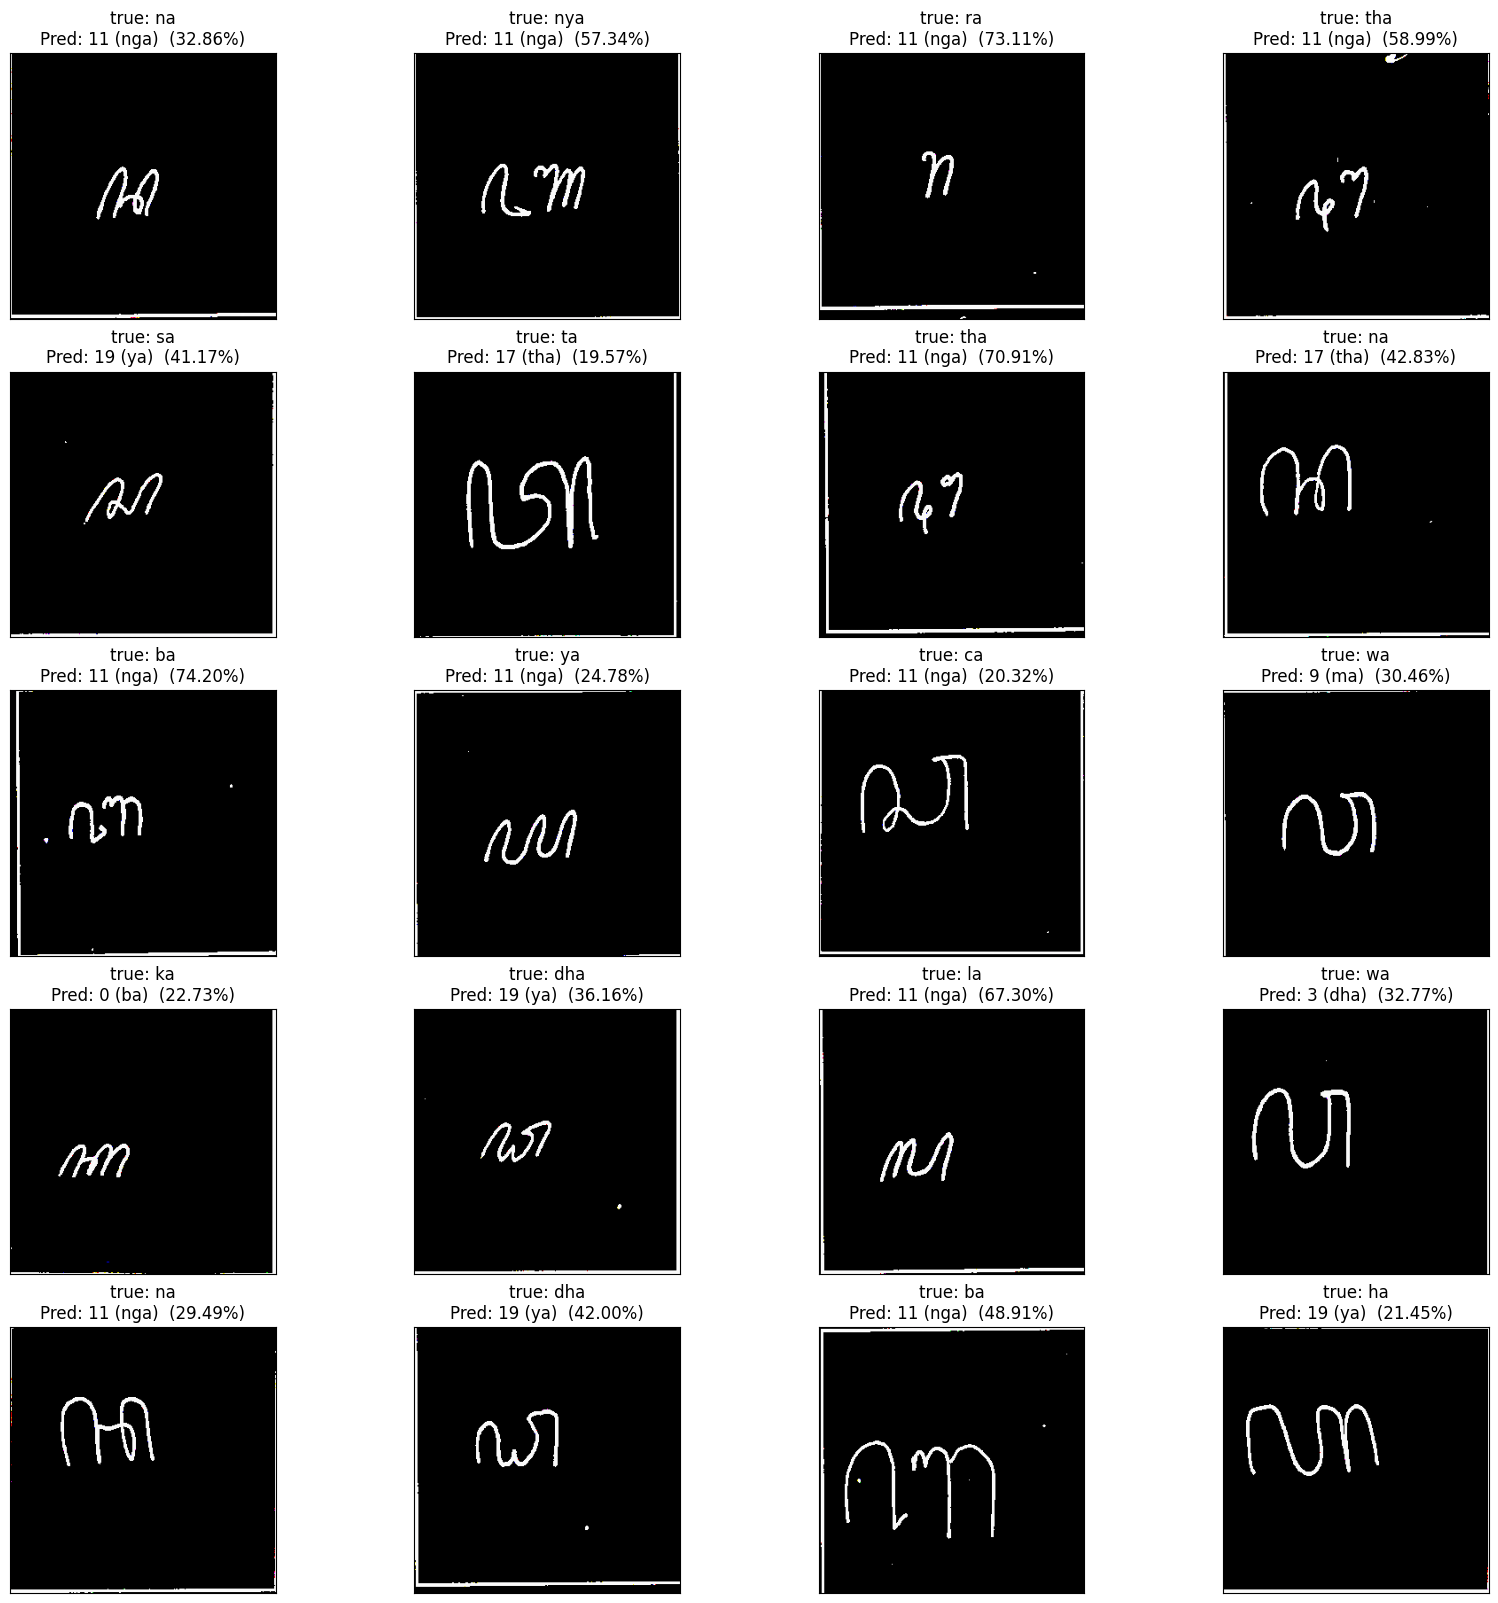

==== END MODEL f_12 ====


==== MODEL f_13 ====


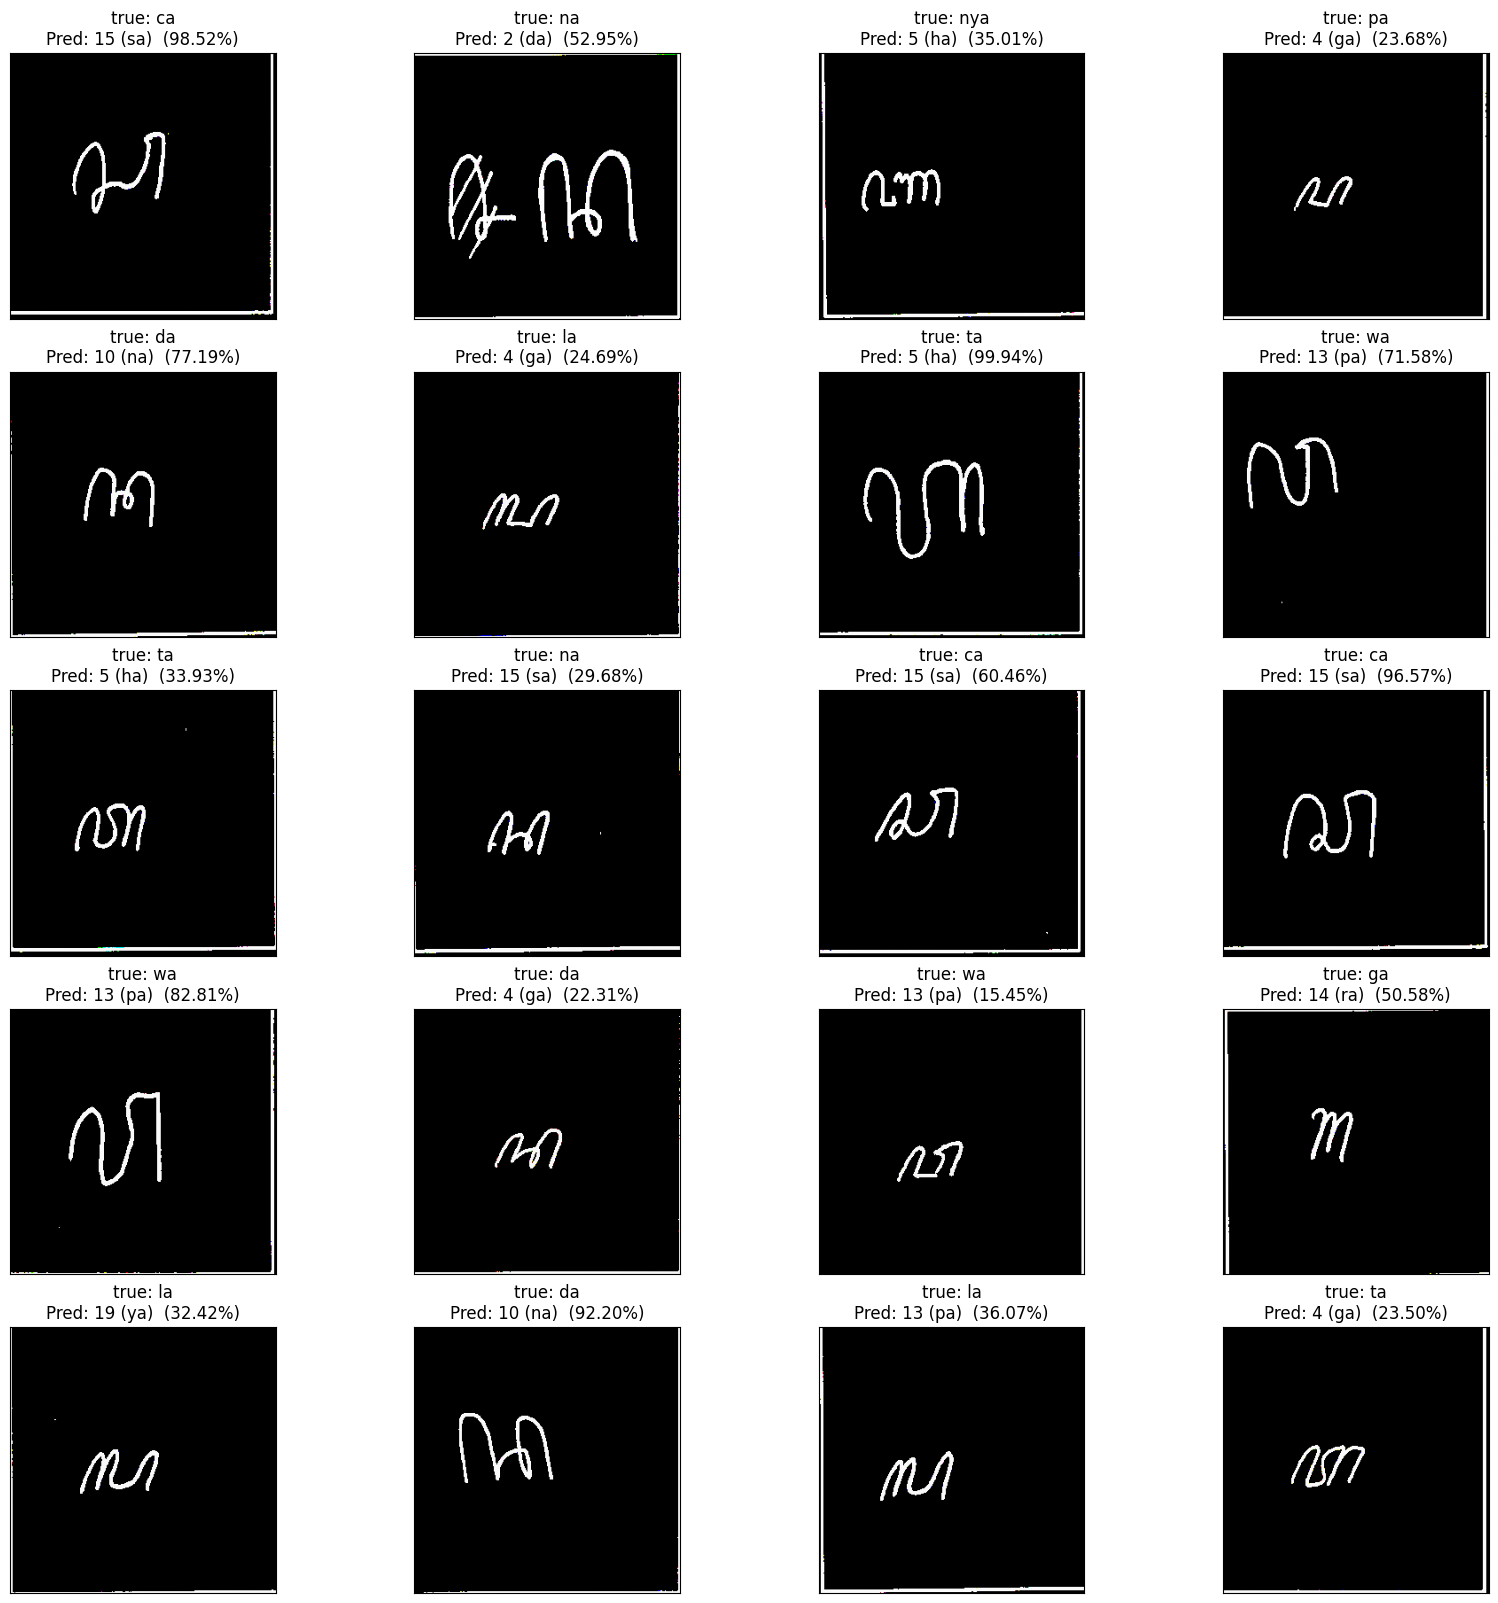

==== END MODEL f_13 ====


==== MODEL f_14 ====


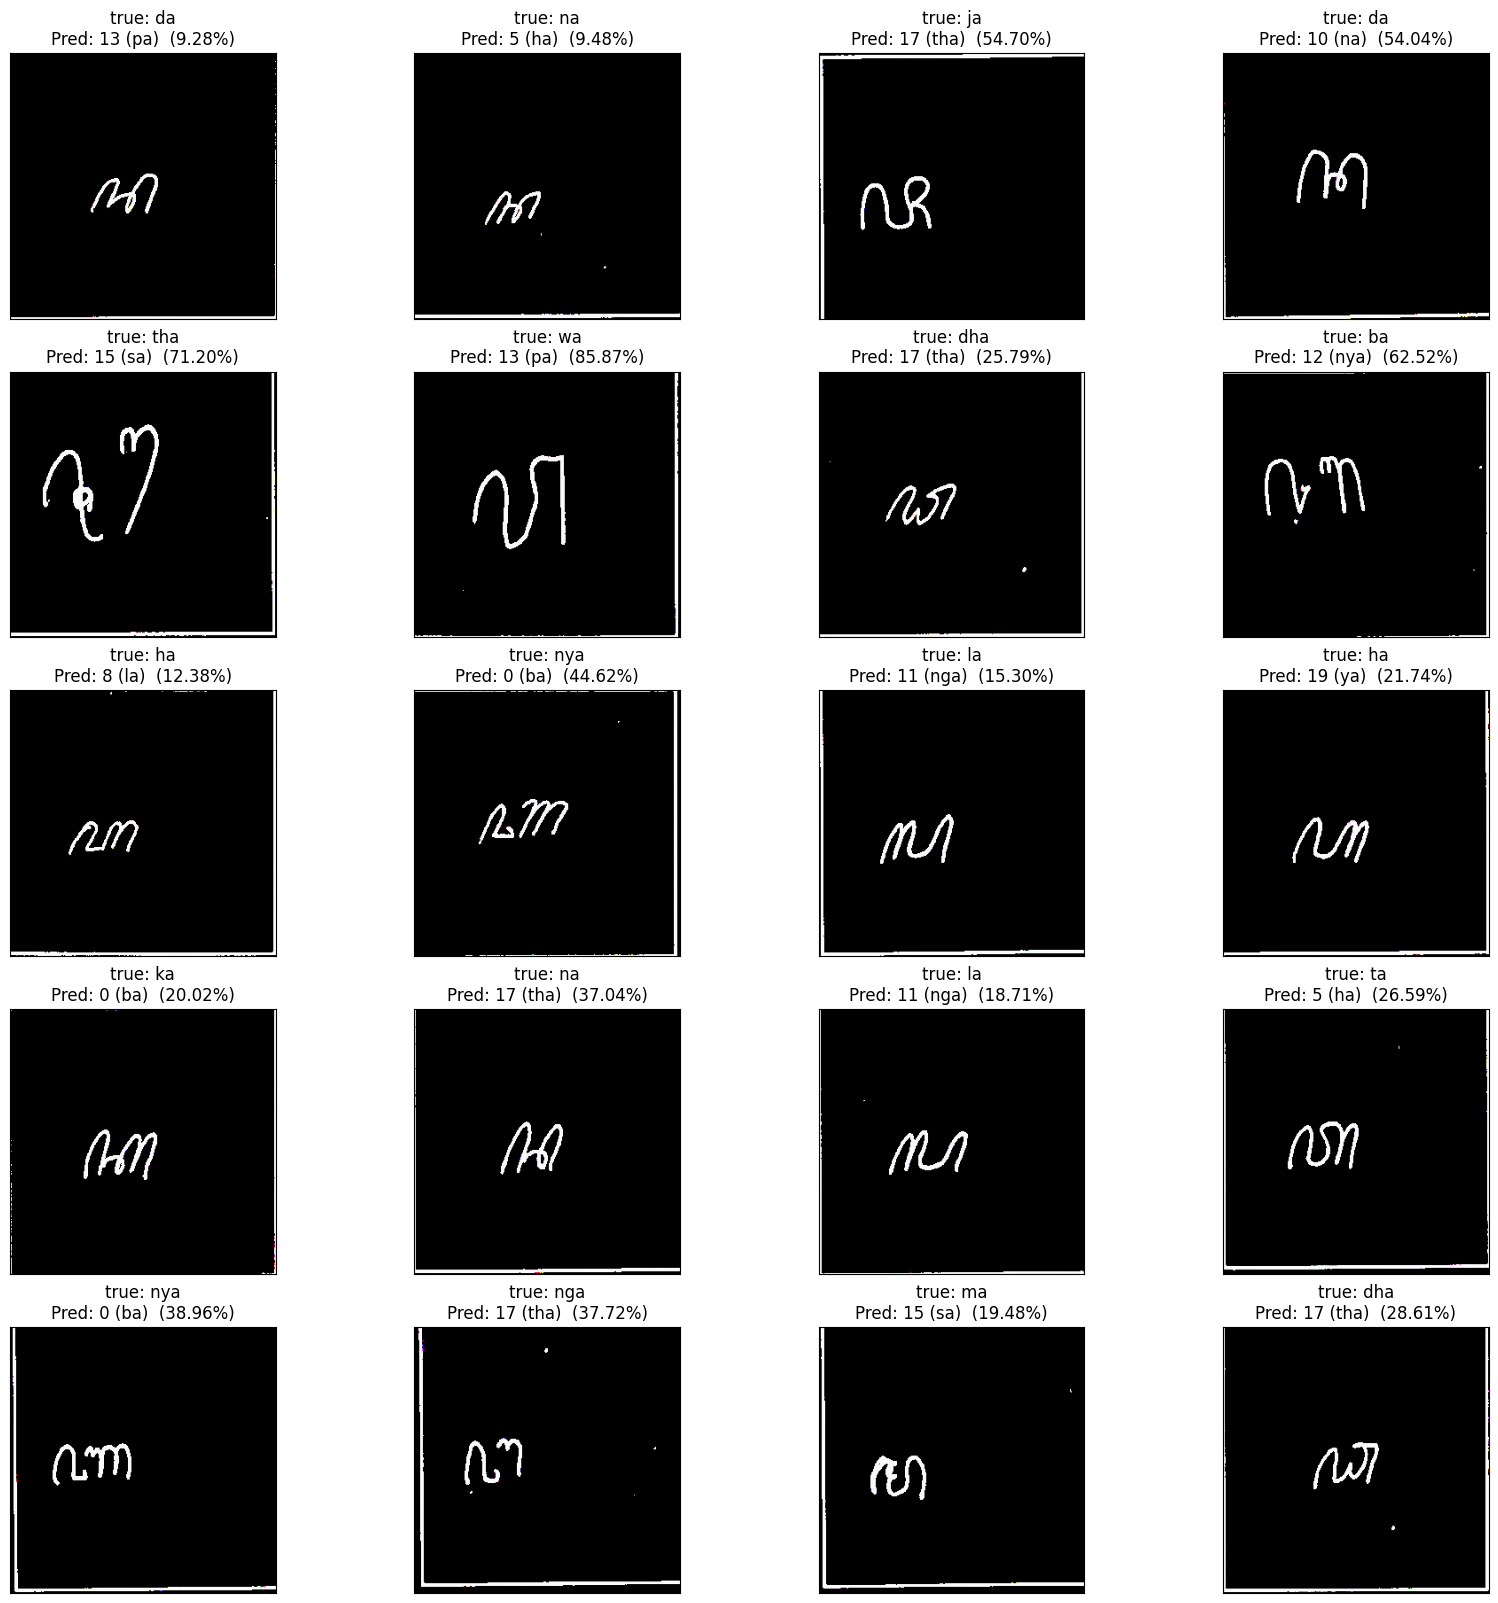

==== END MODEL f_14 ====


==== MODEL f_15 ====


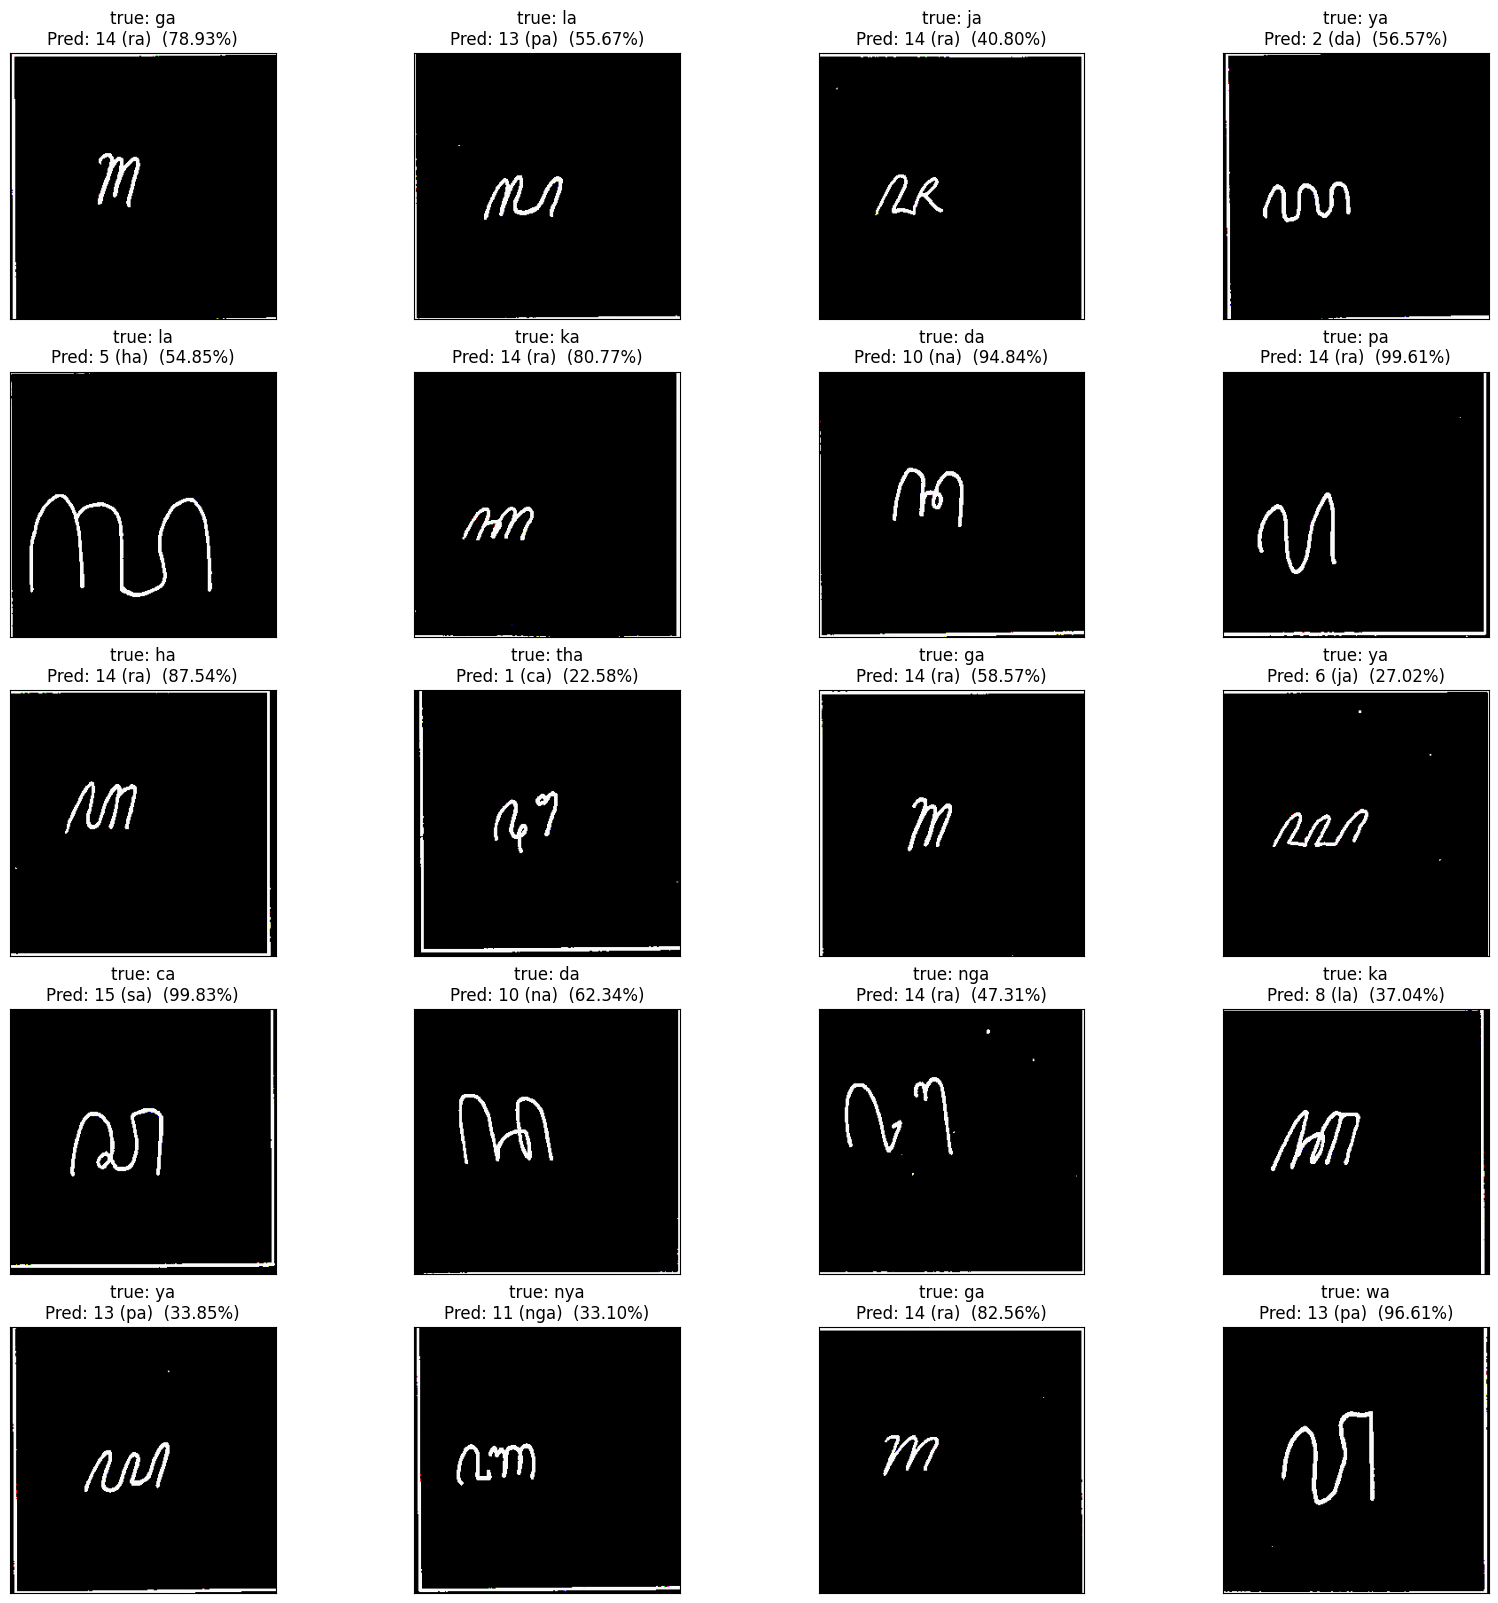

==== END MODEL f_15 ====


==== MODEL f_16 ====


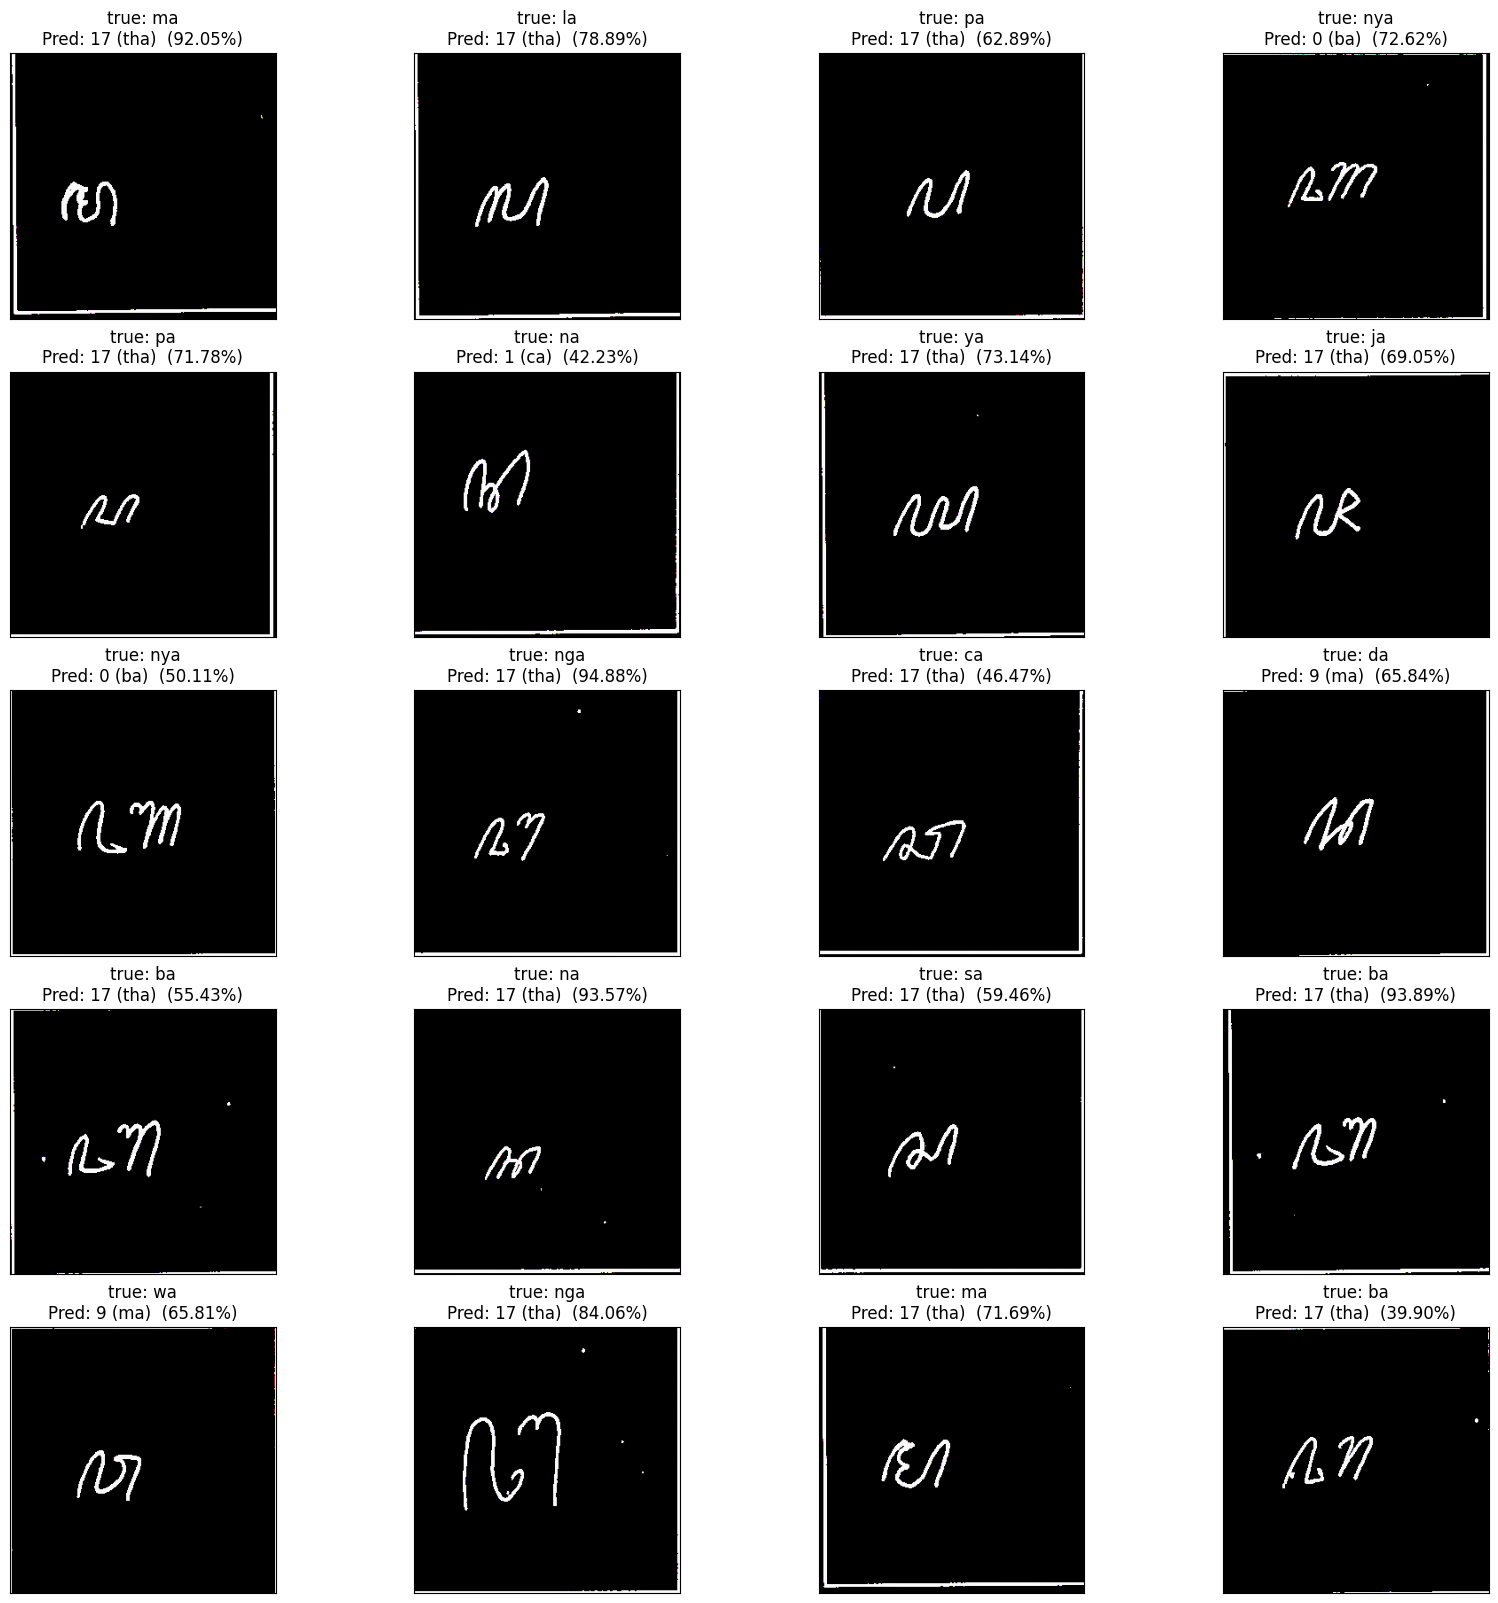

==== END MODEL f_16 ====


==== MODEL f_17 ====


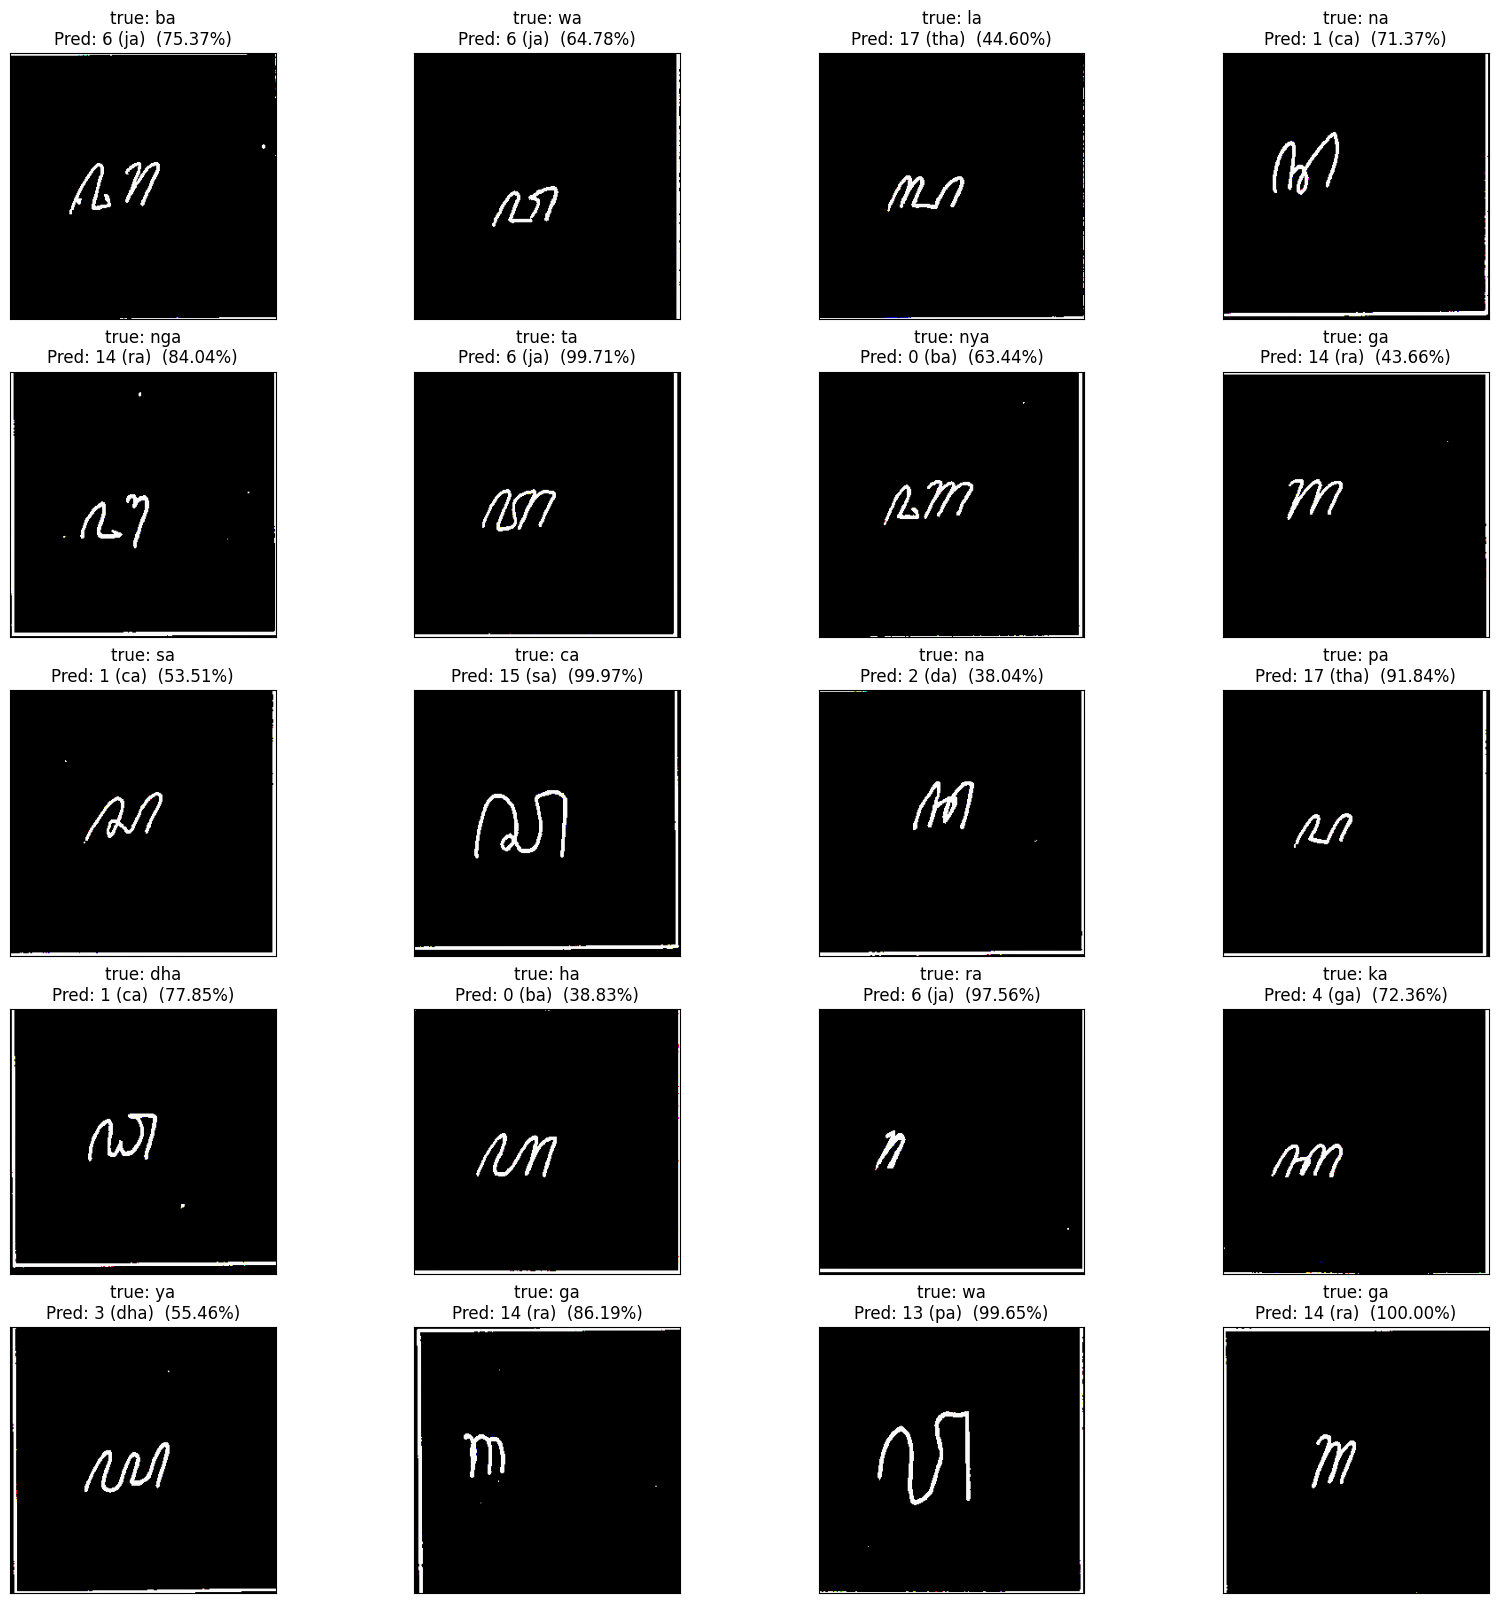

==== END MODEL f_17 ====


==== MODEL f_18 ====


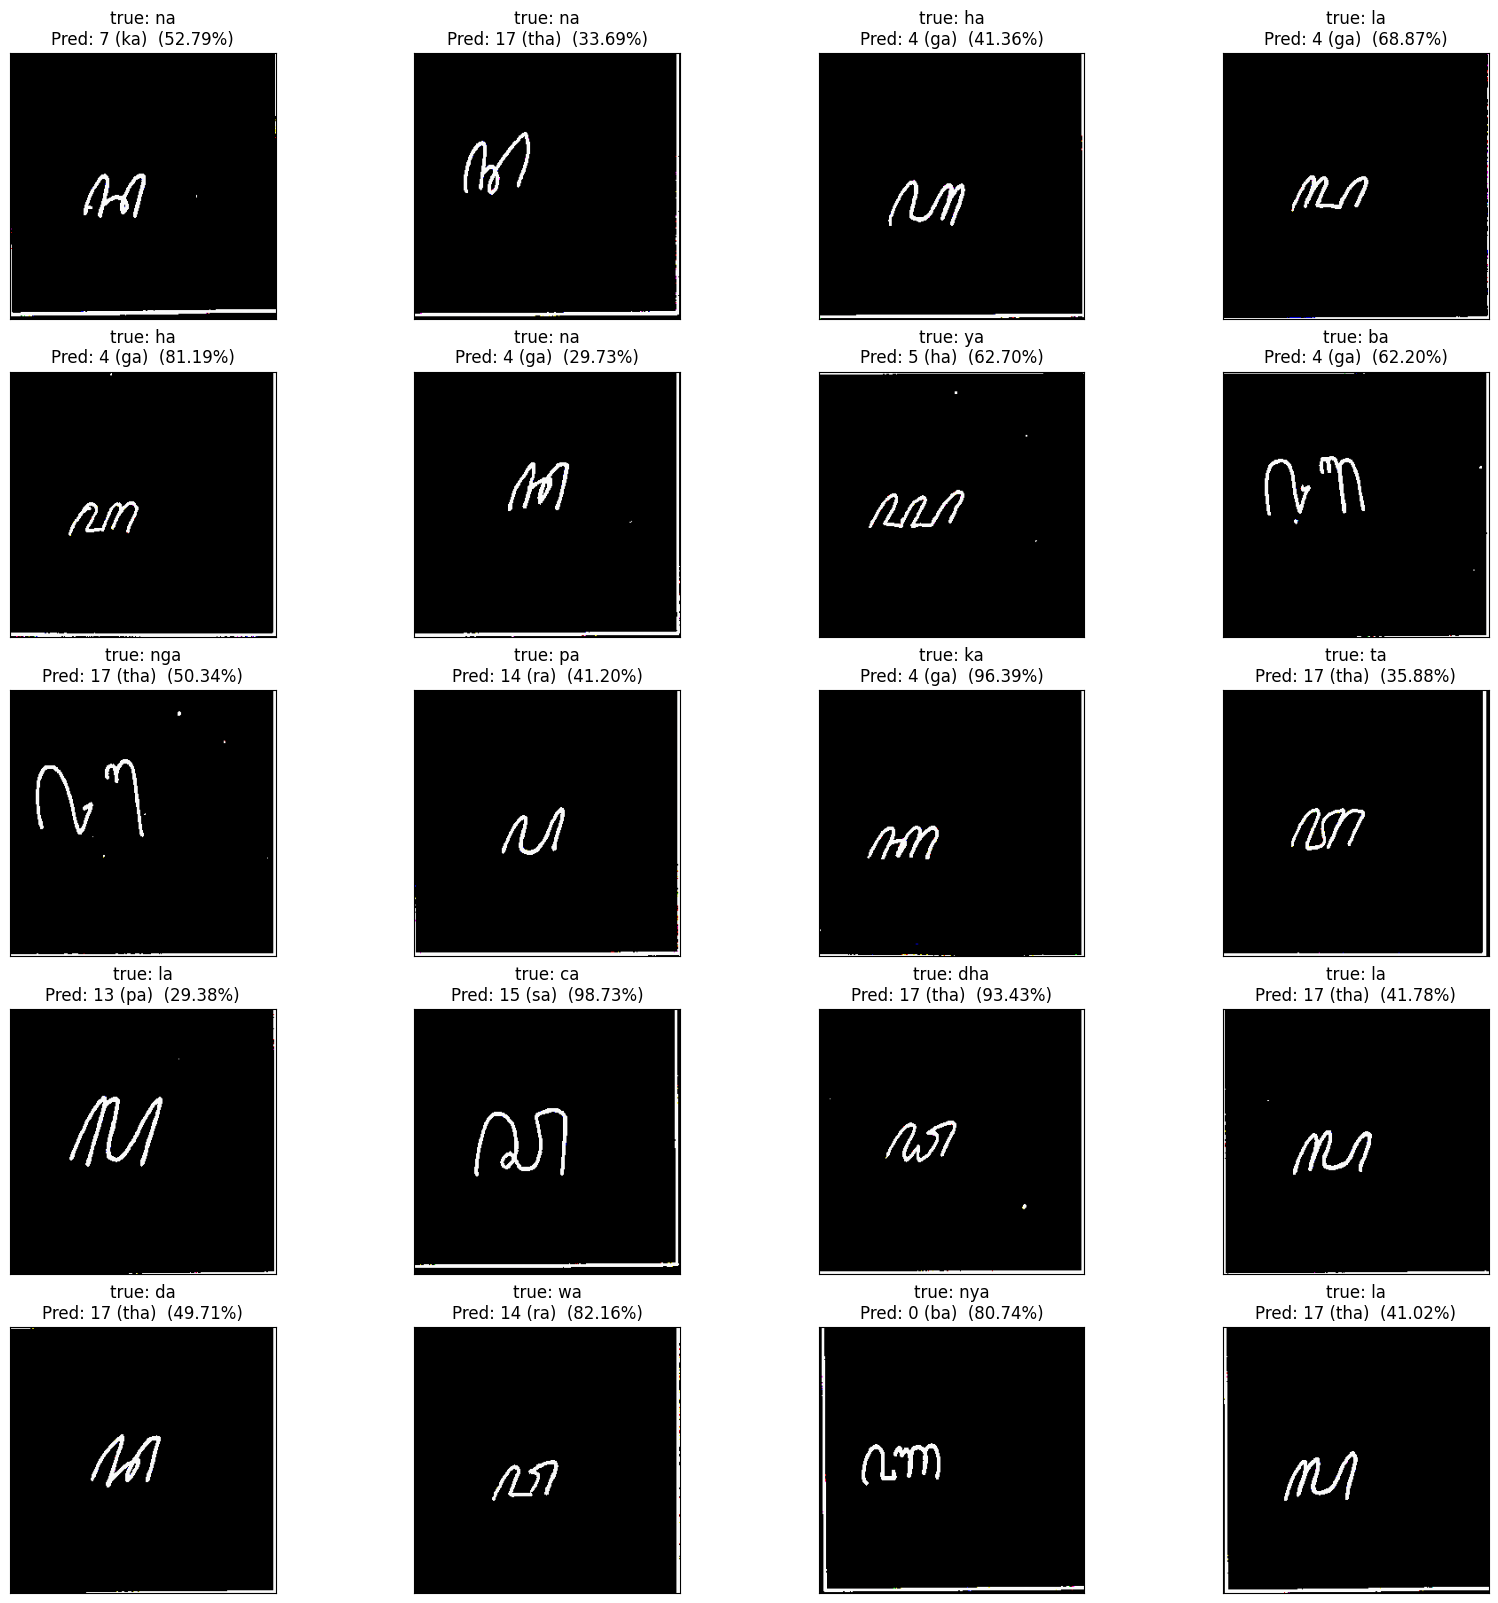

==== END MODEL f_18 ====


==== MODEL f_19 ====


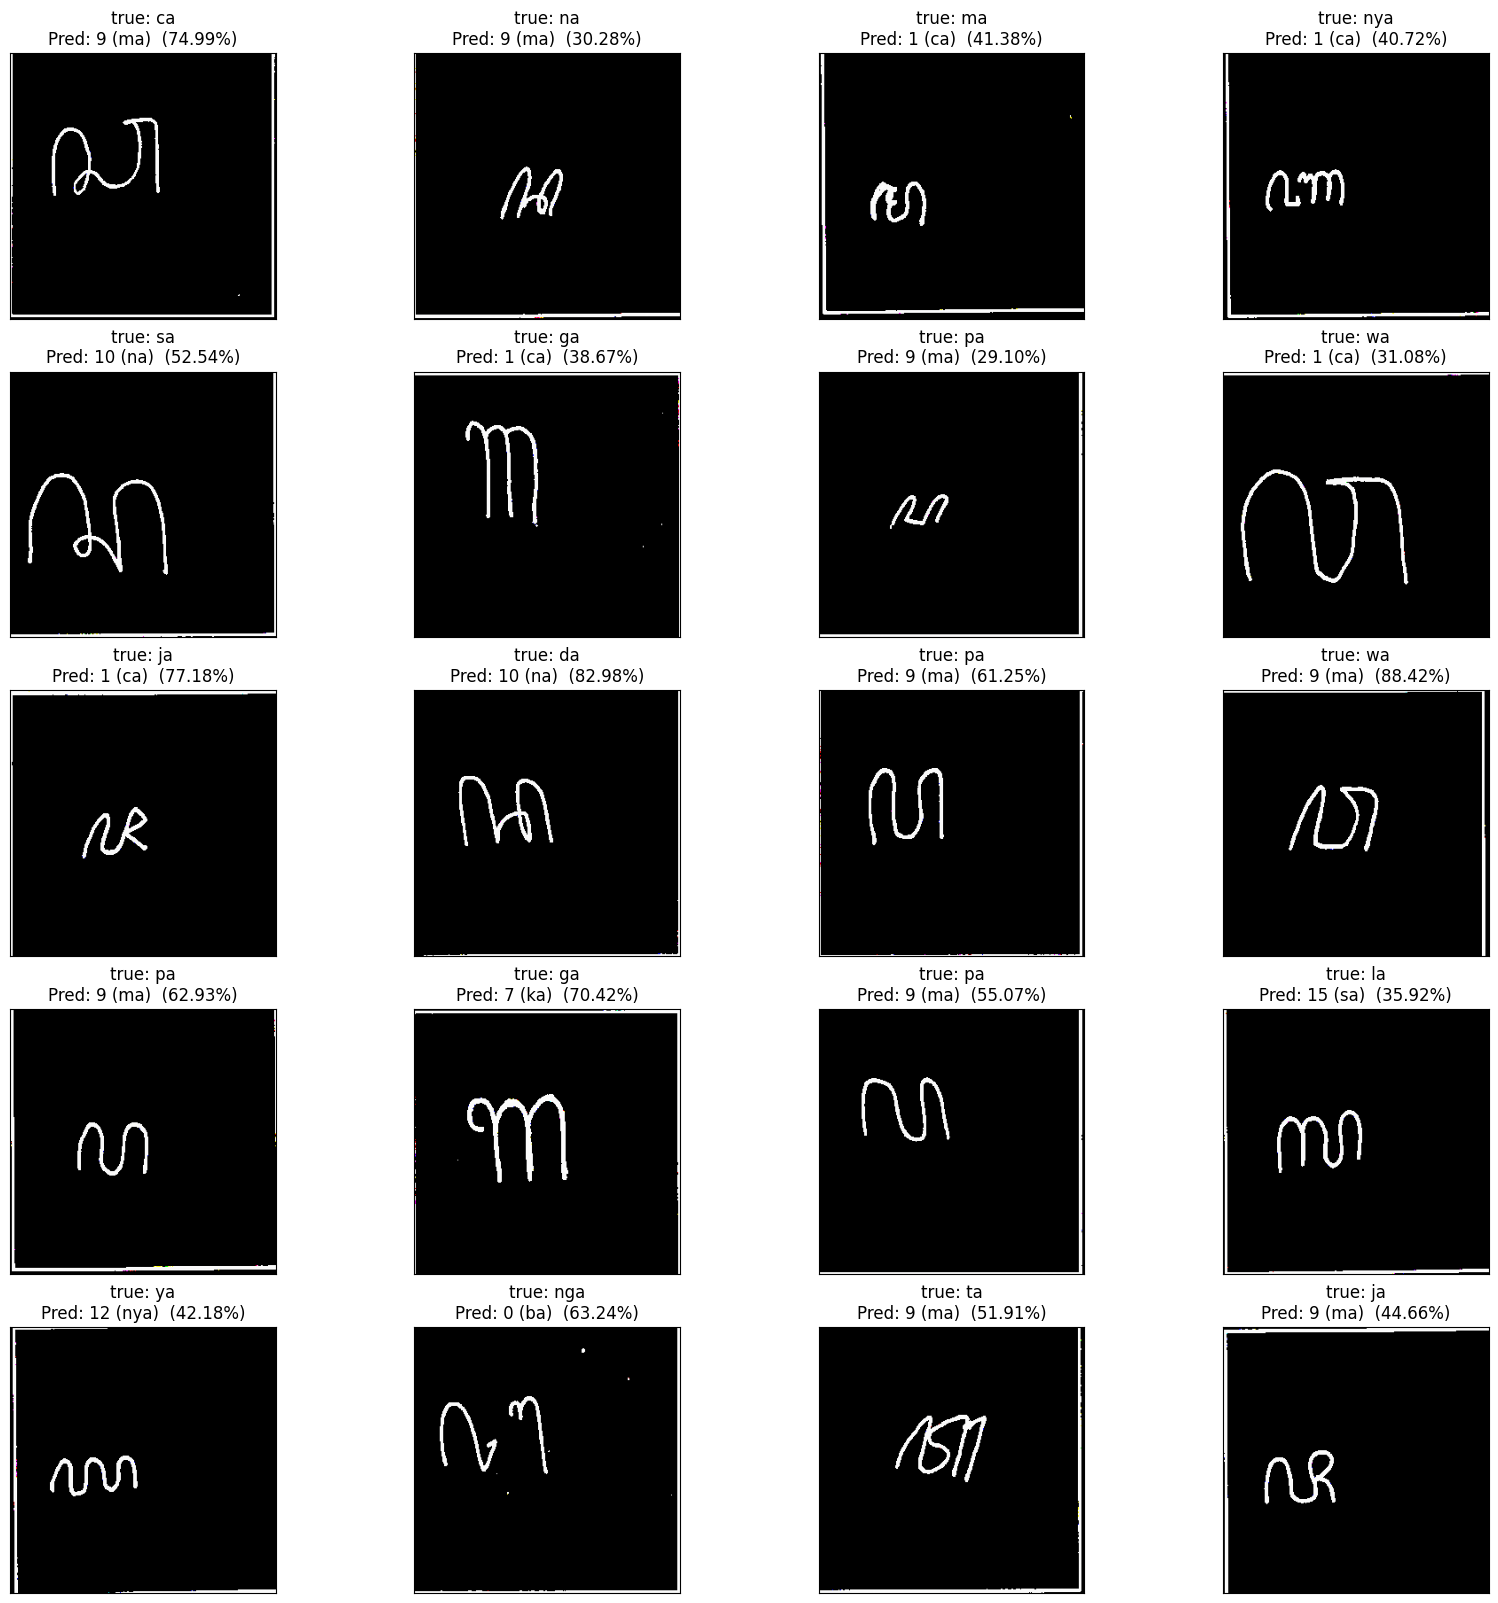

==== END MODEL f_19 ====


==== MODEL f_20 ====


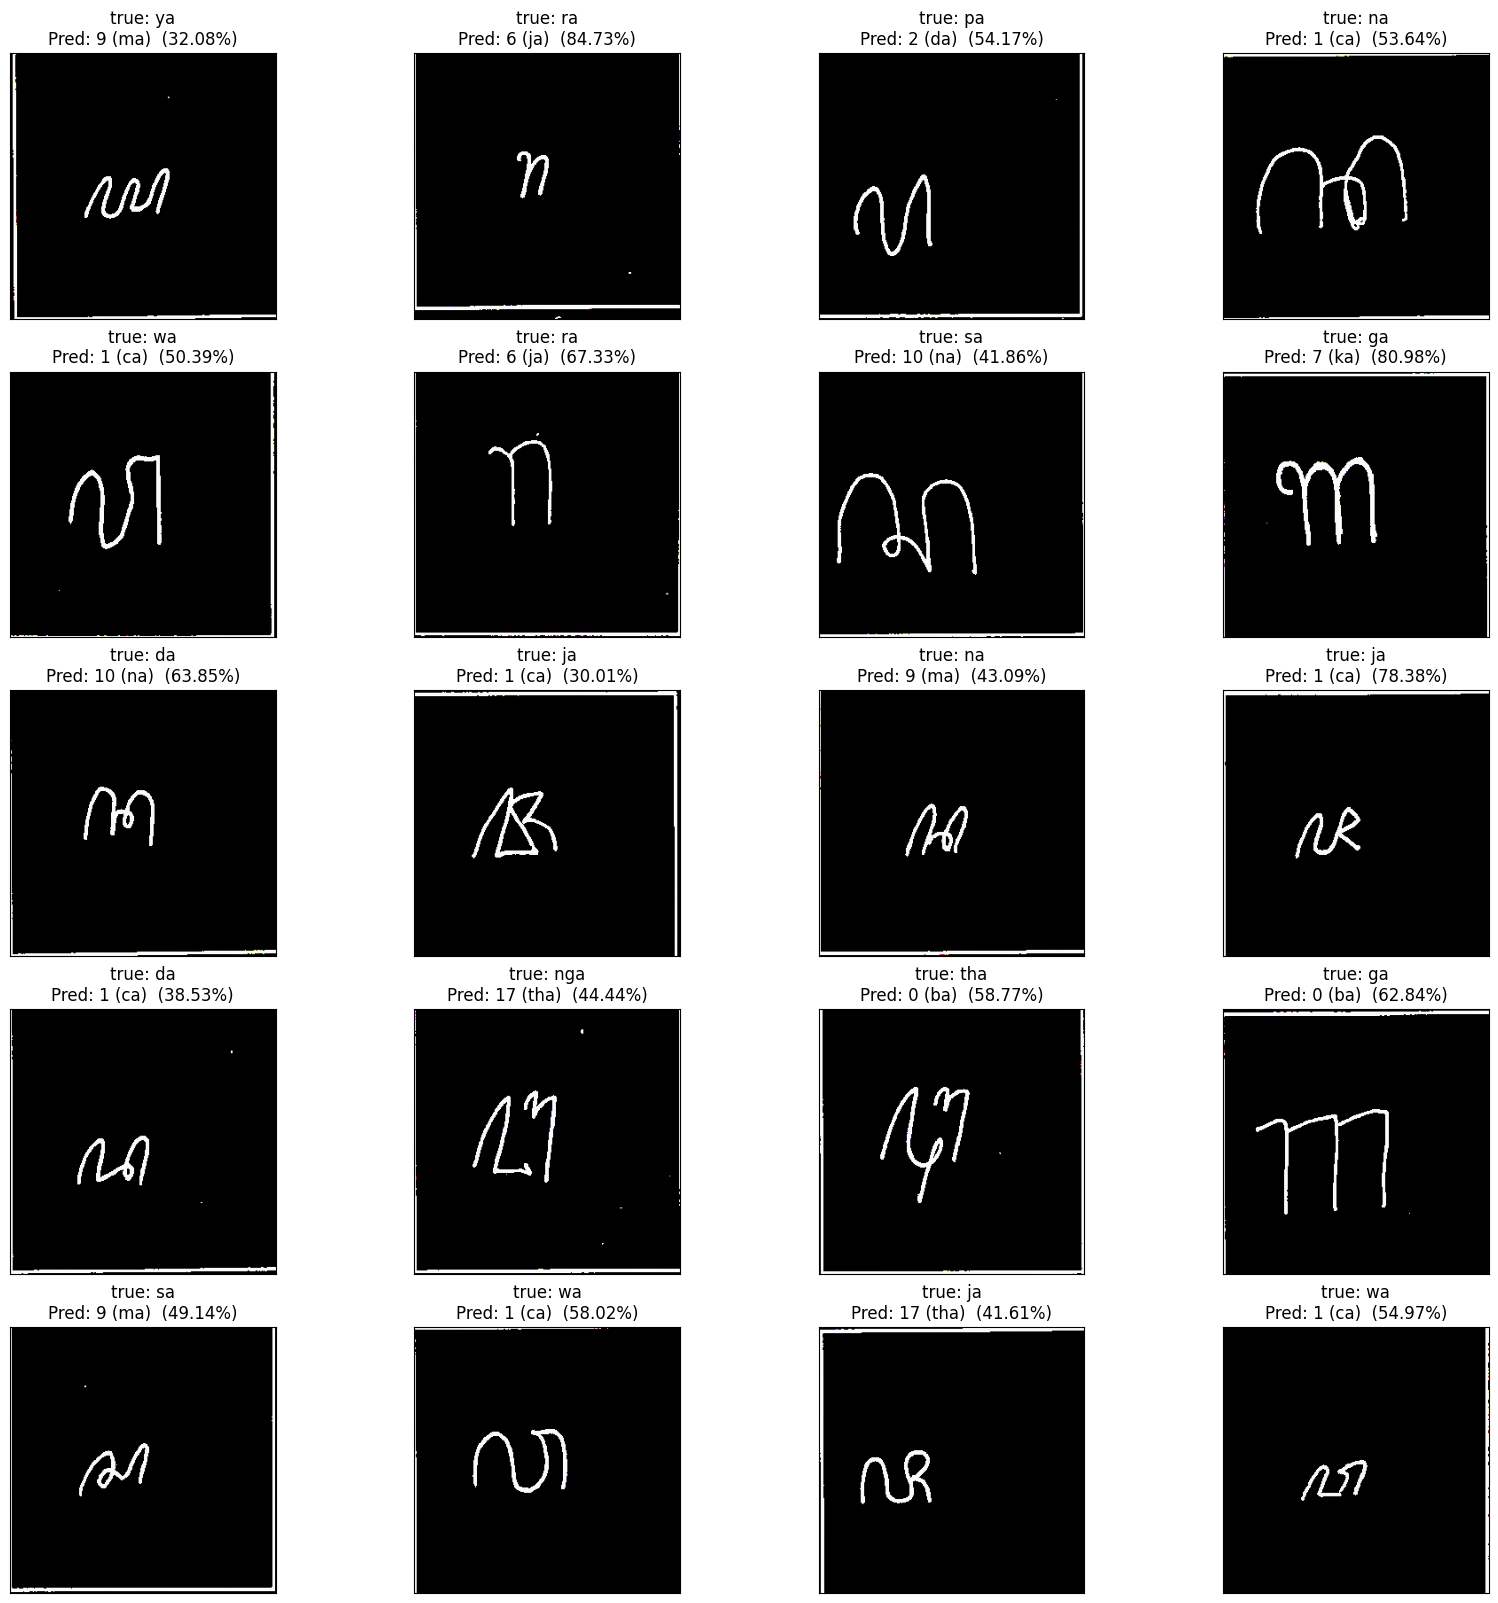

==== END MODEL f_20 ====


==== MODEL f_21 ====


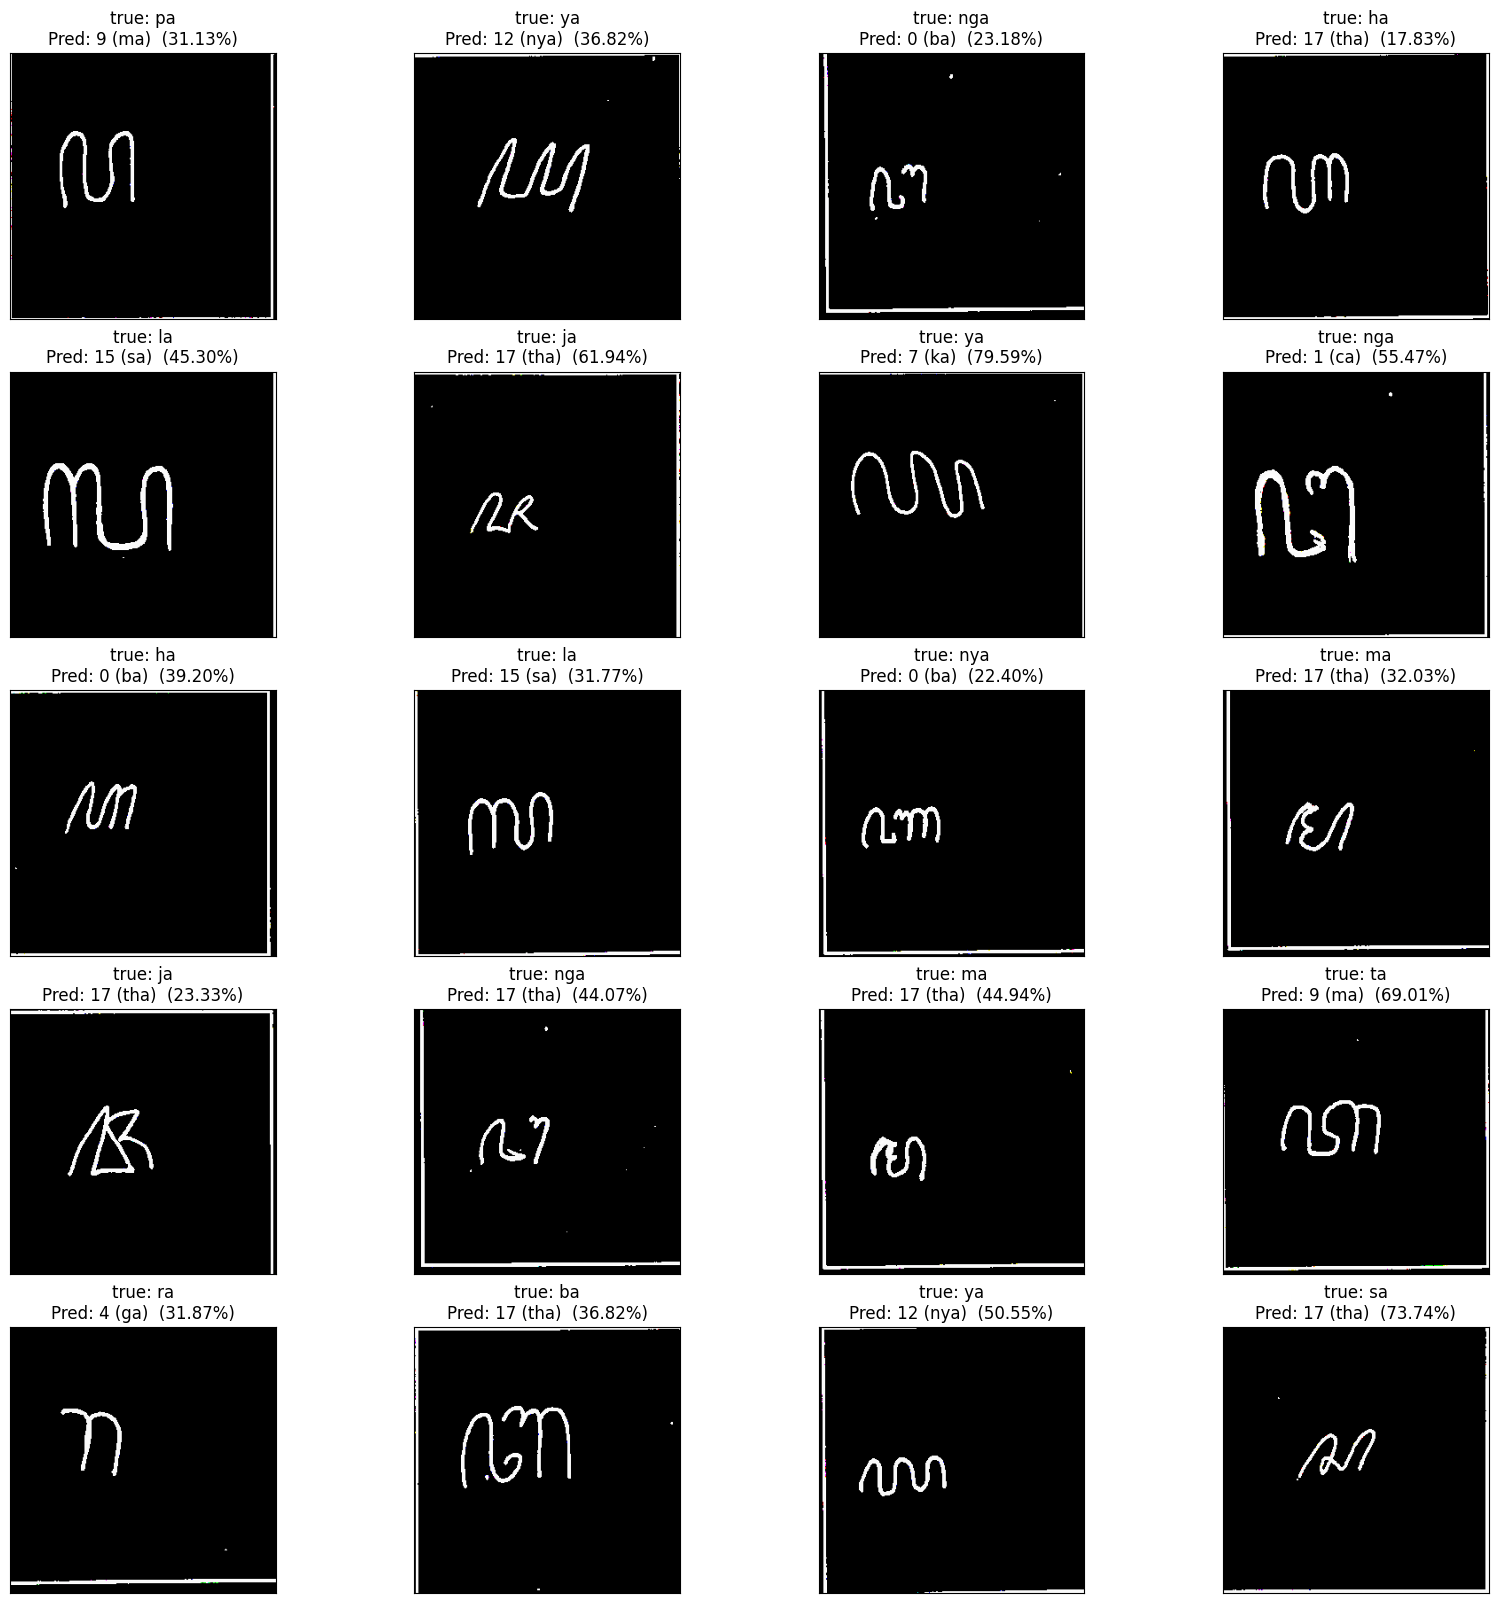

==== END MODEL f_21 ====


==== MODEL f_22 ====


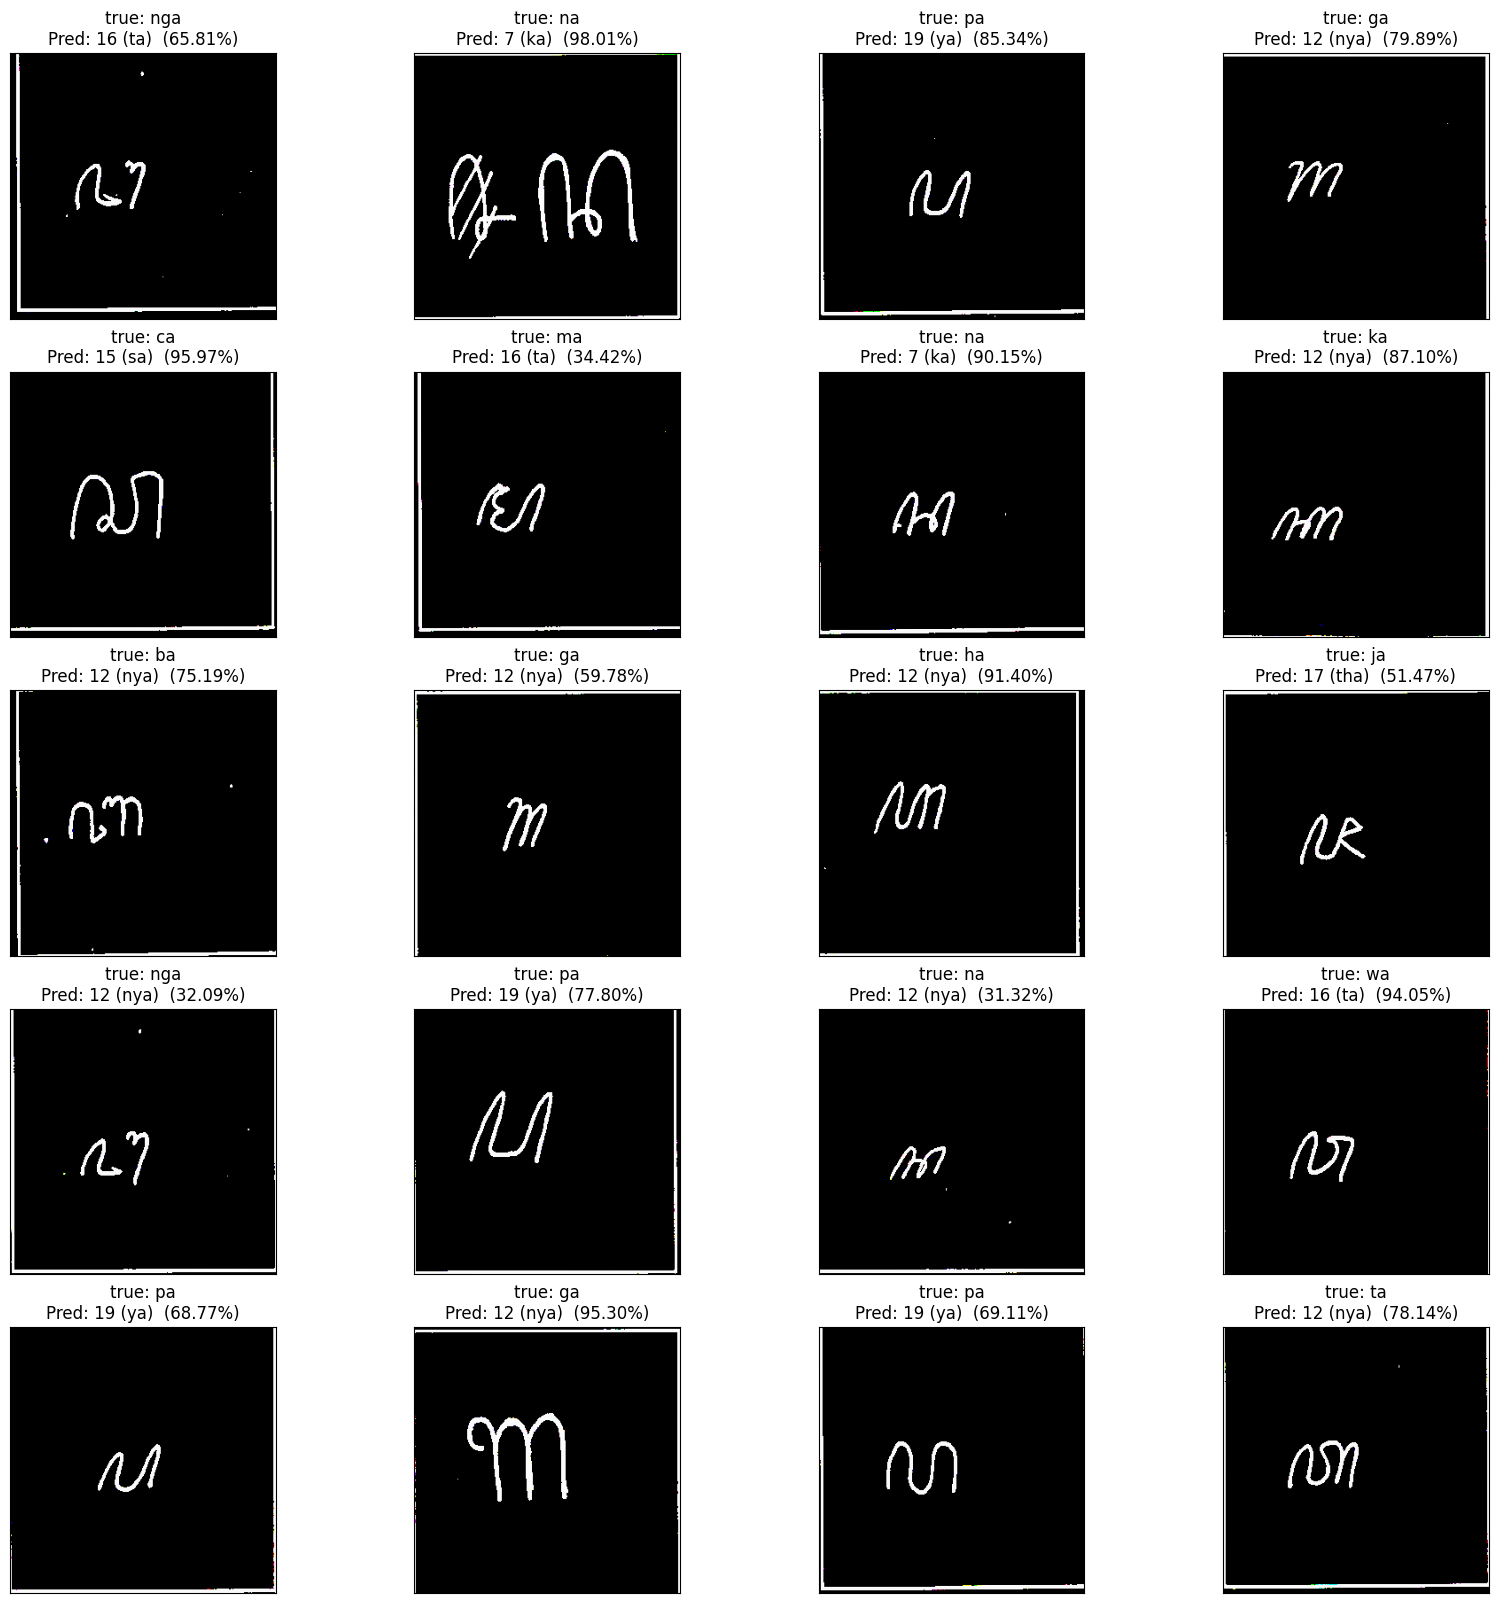

==== END MODEL f_22 ====


==== MODEL f_23 ====


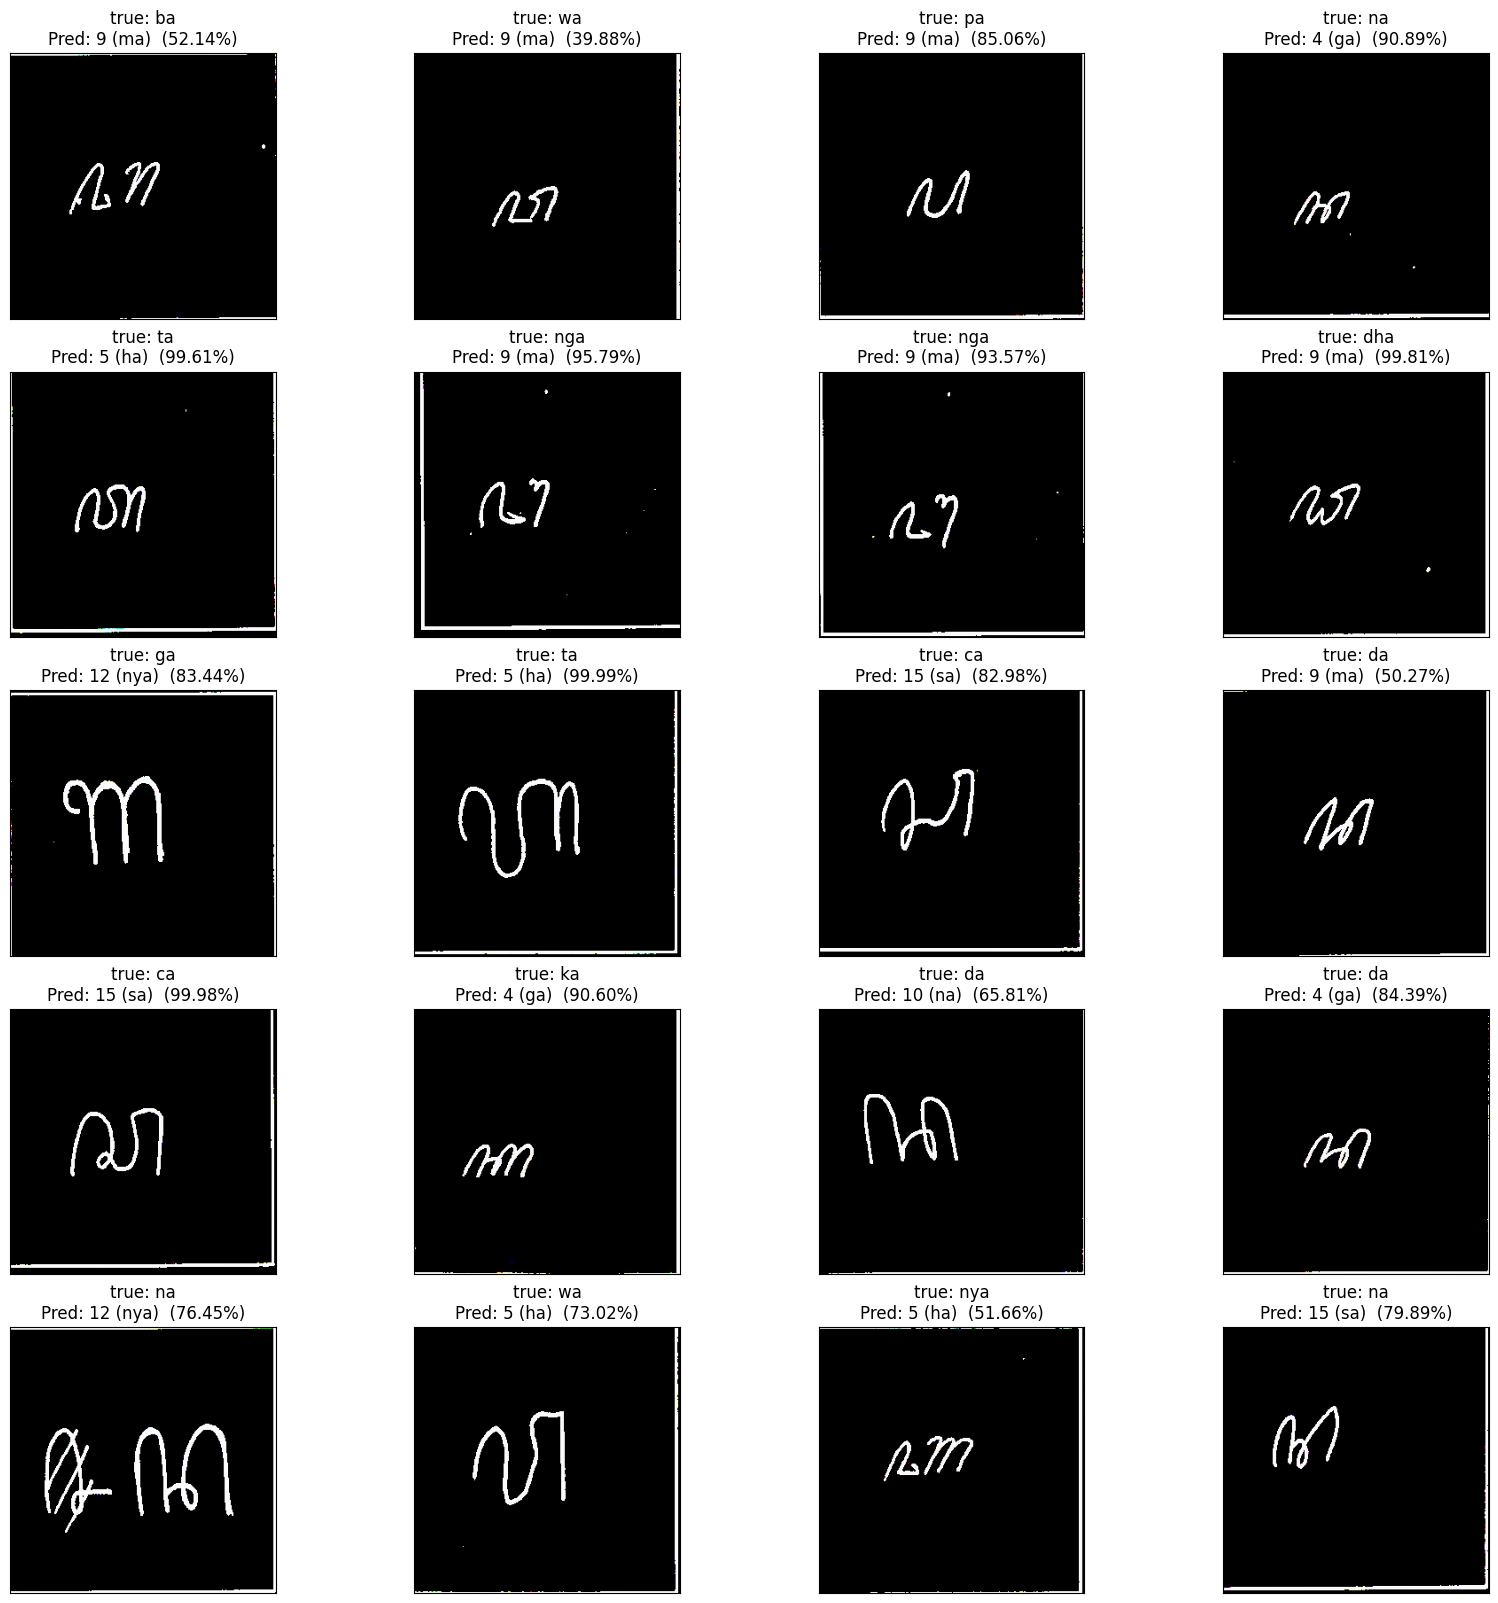

==== END MODEL f_23 ====


==== MODEL f_24 ====


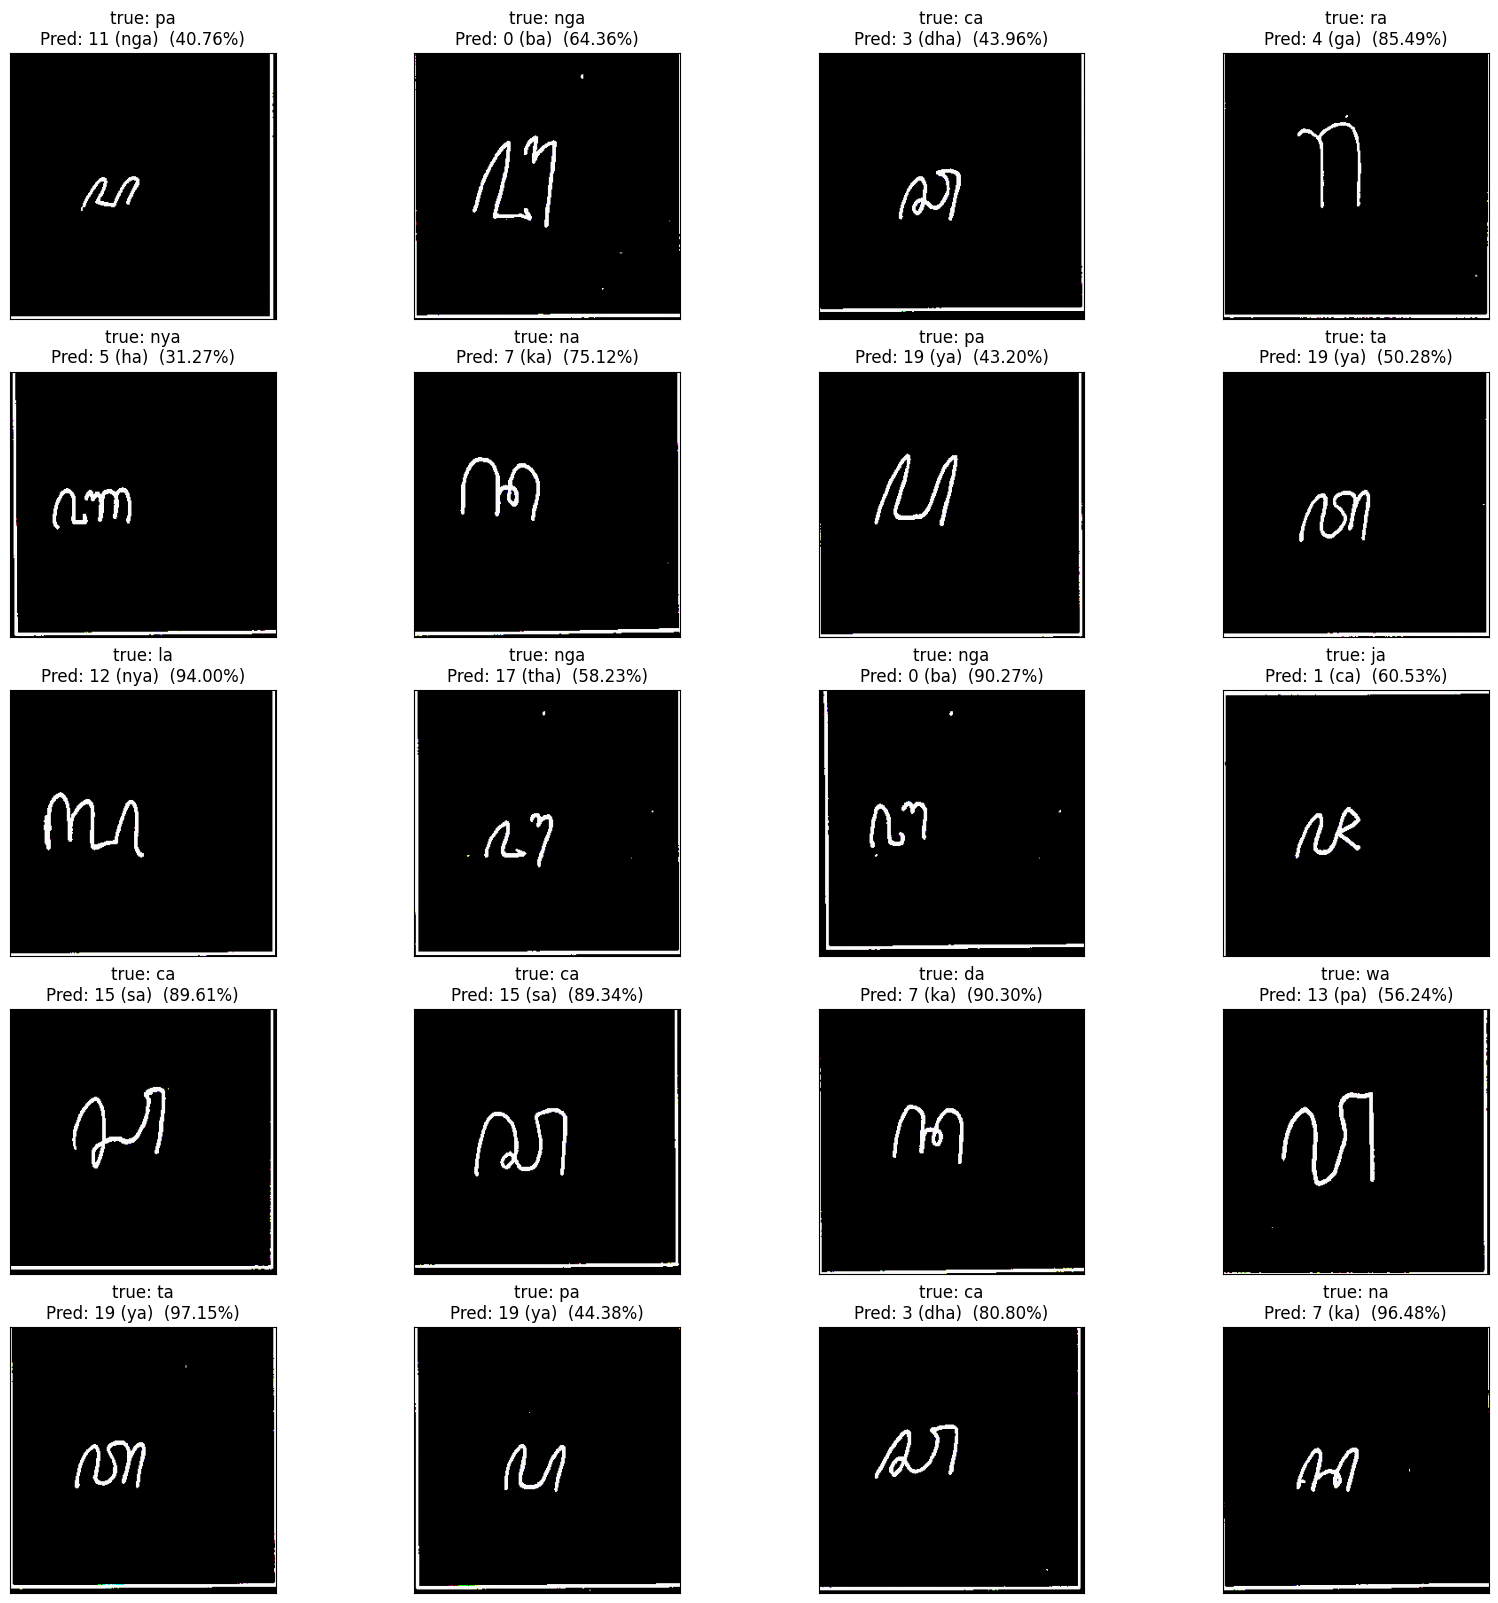

==== END MODEL f_24 ====


==== MODEL f_25 ====


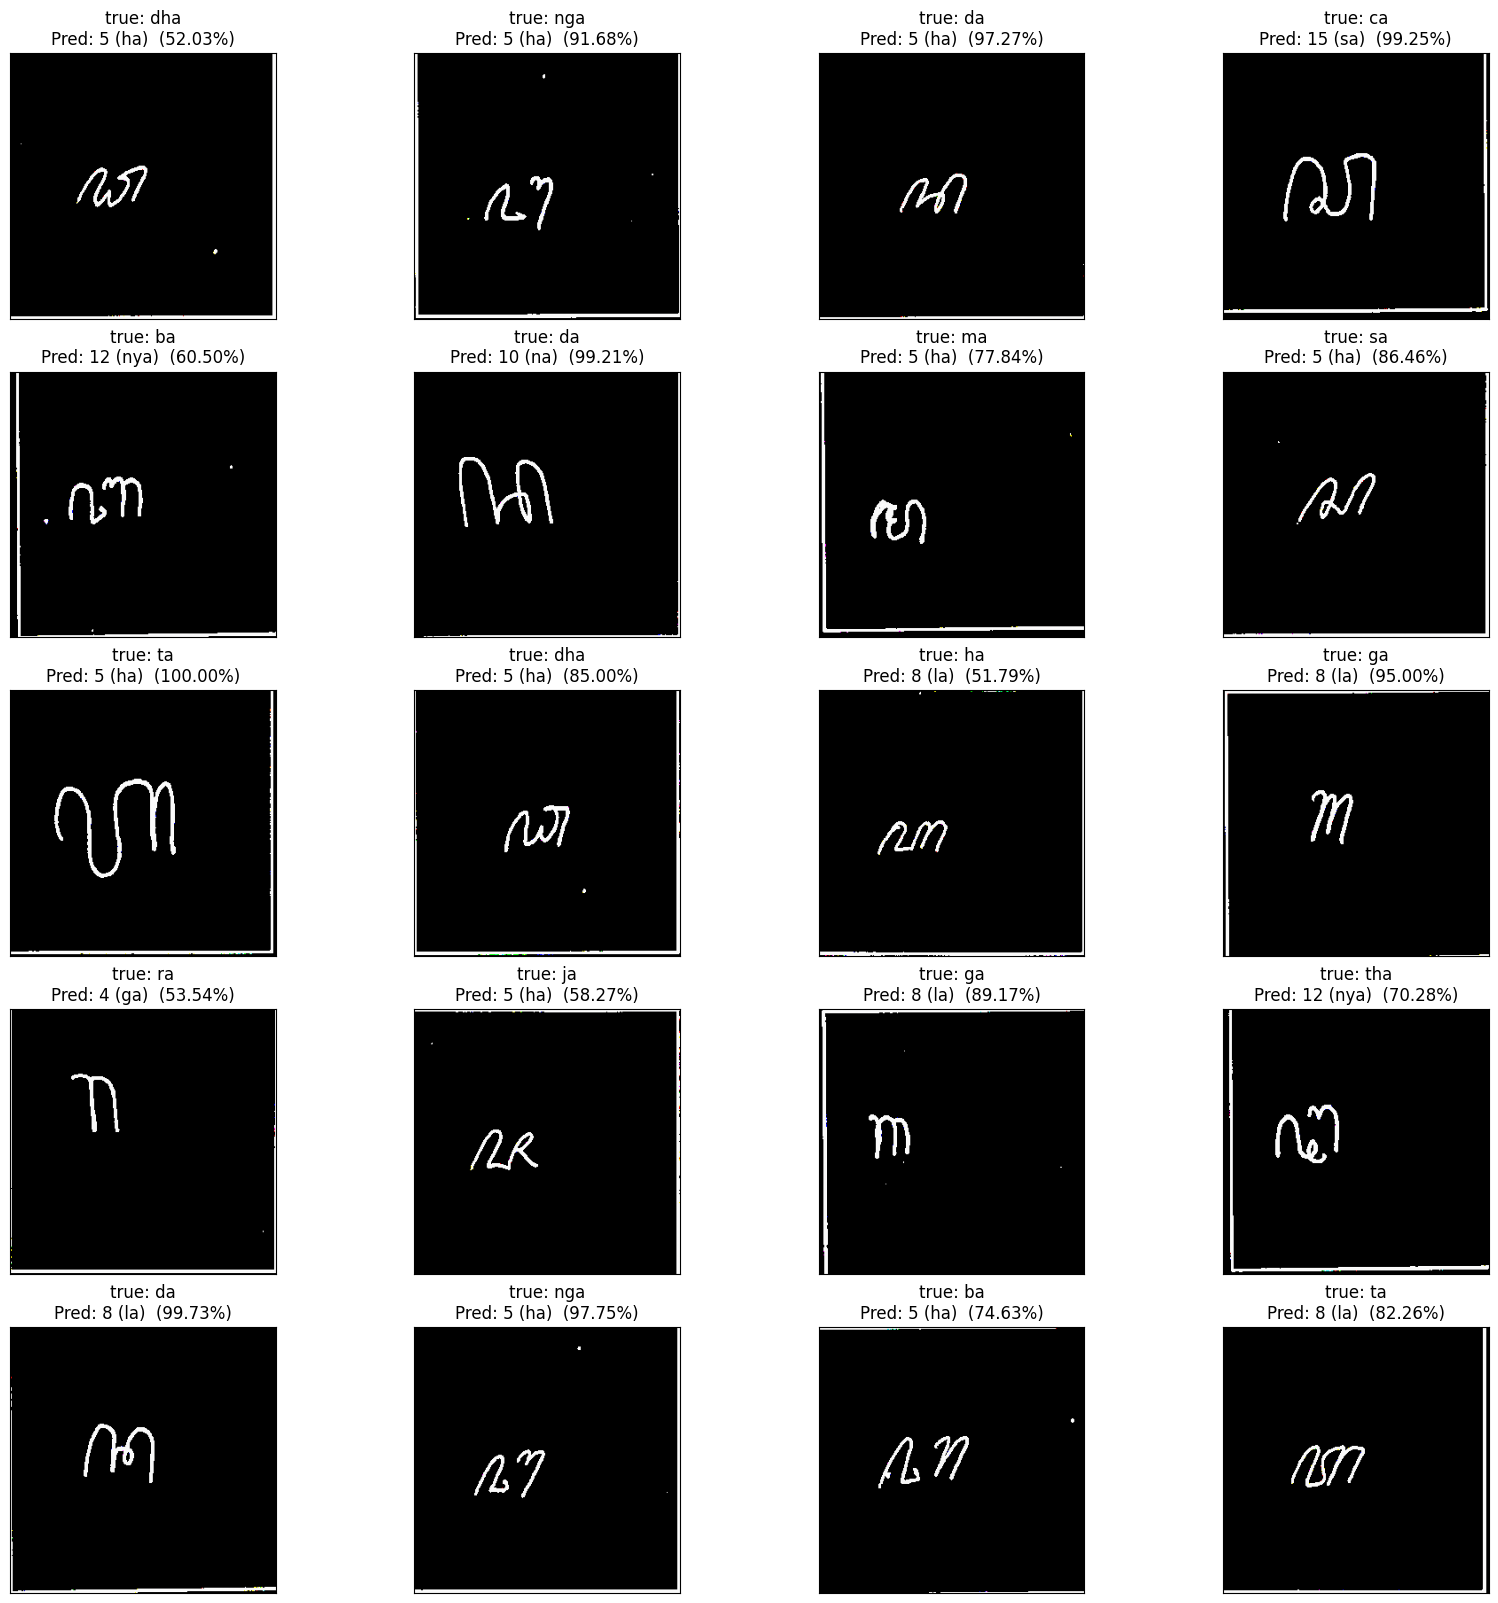

==== END MODEL f_25 ====


==== MODEL f_26 ====


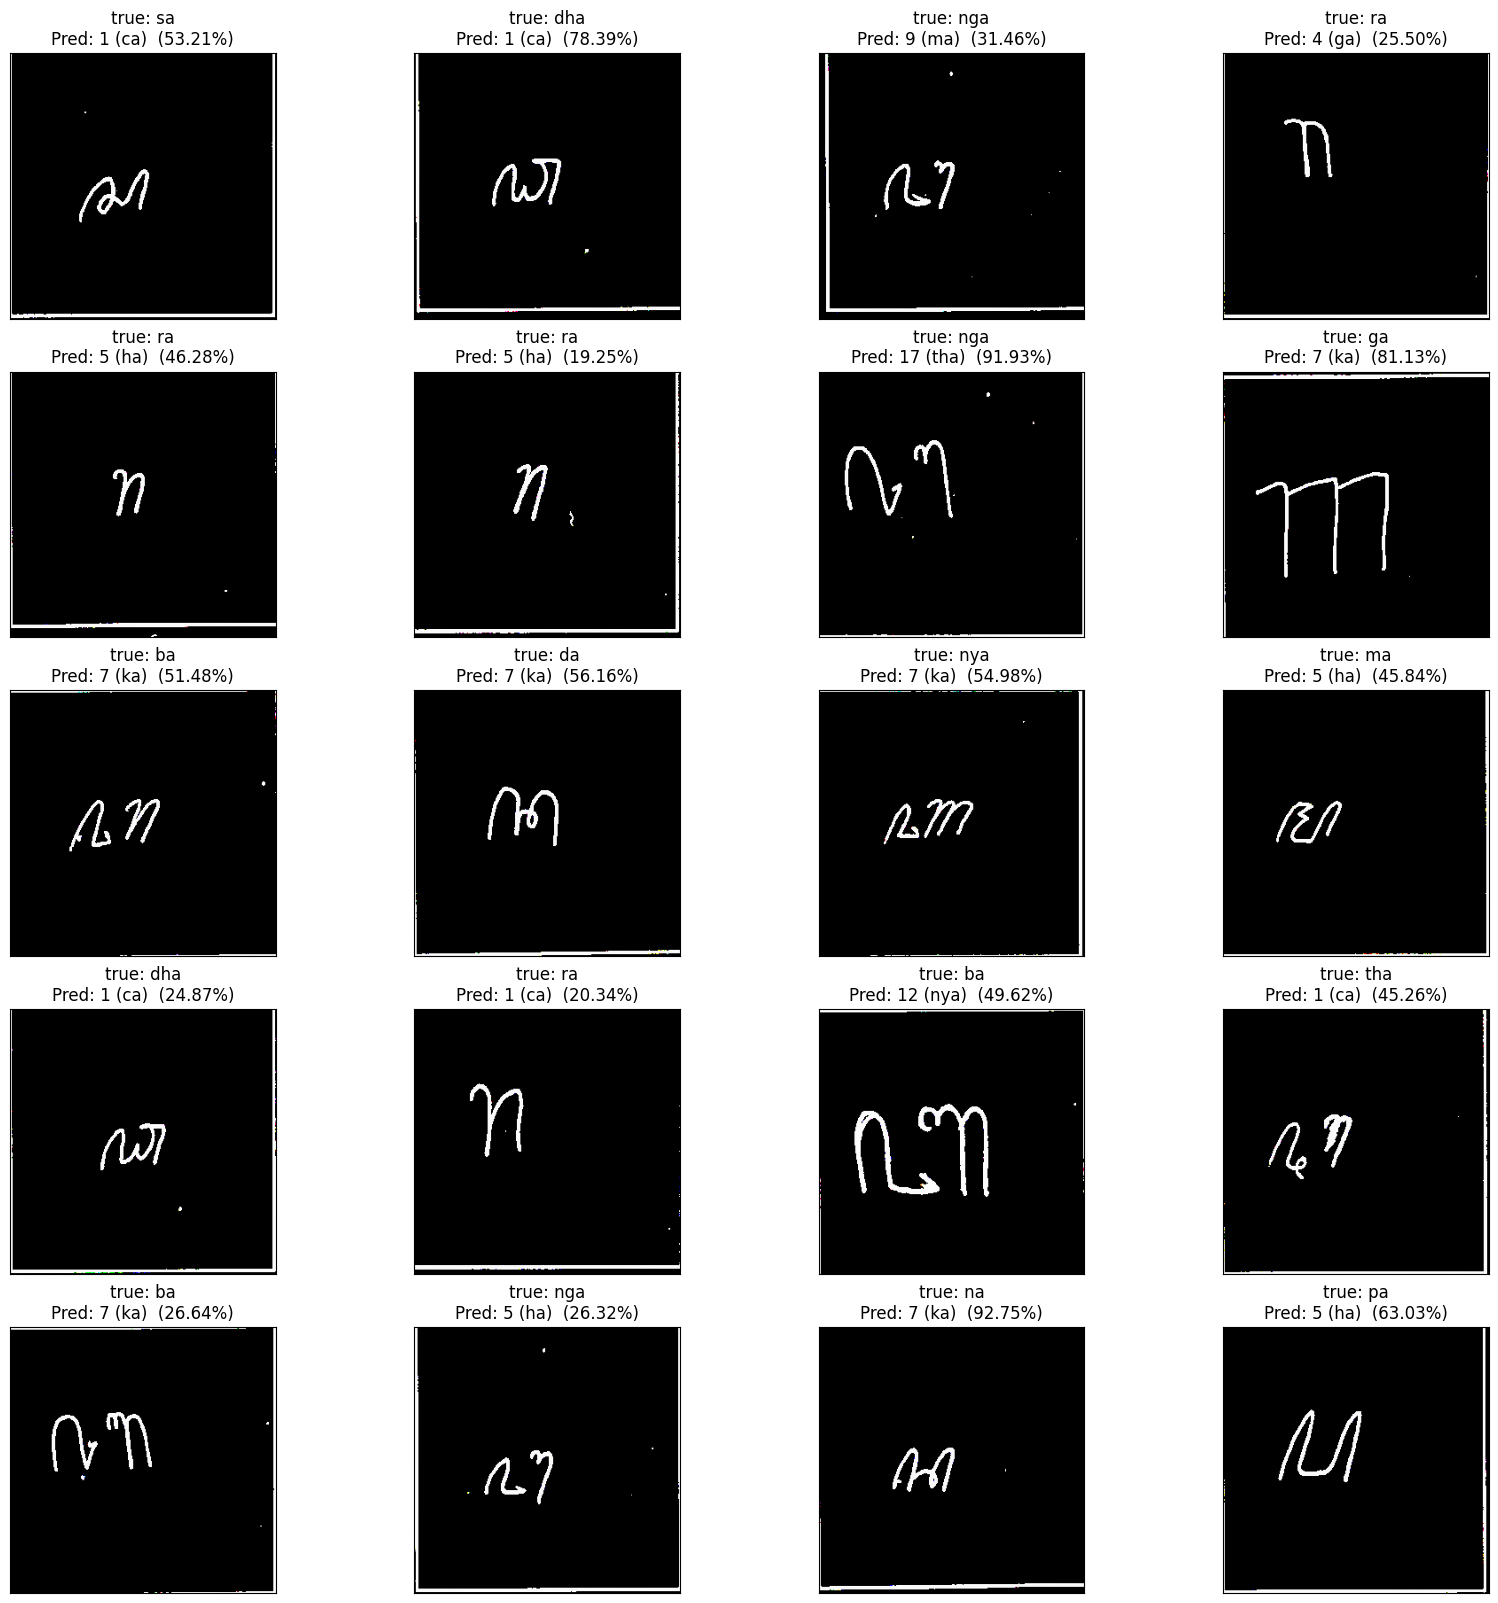

==== END MODEL f_26 ====


==== MODEL f_27 ====


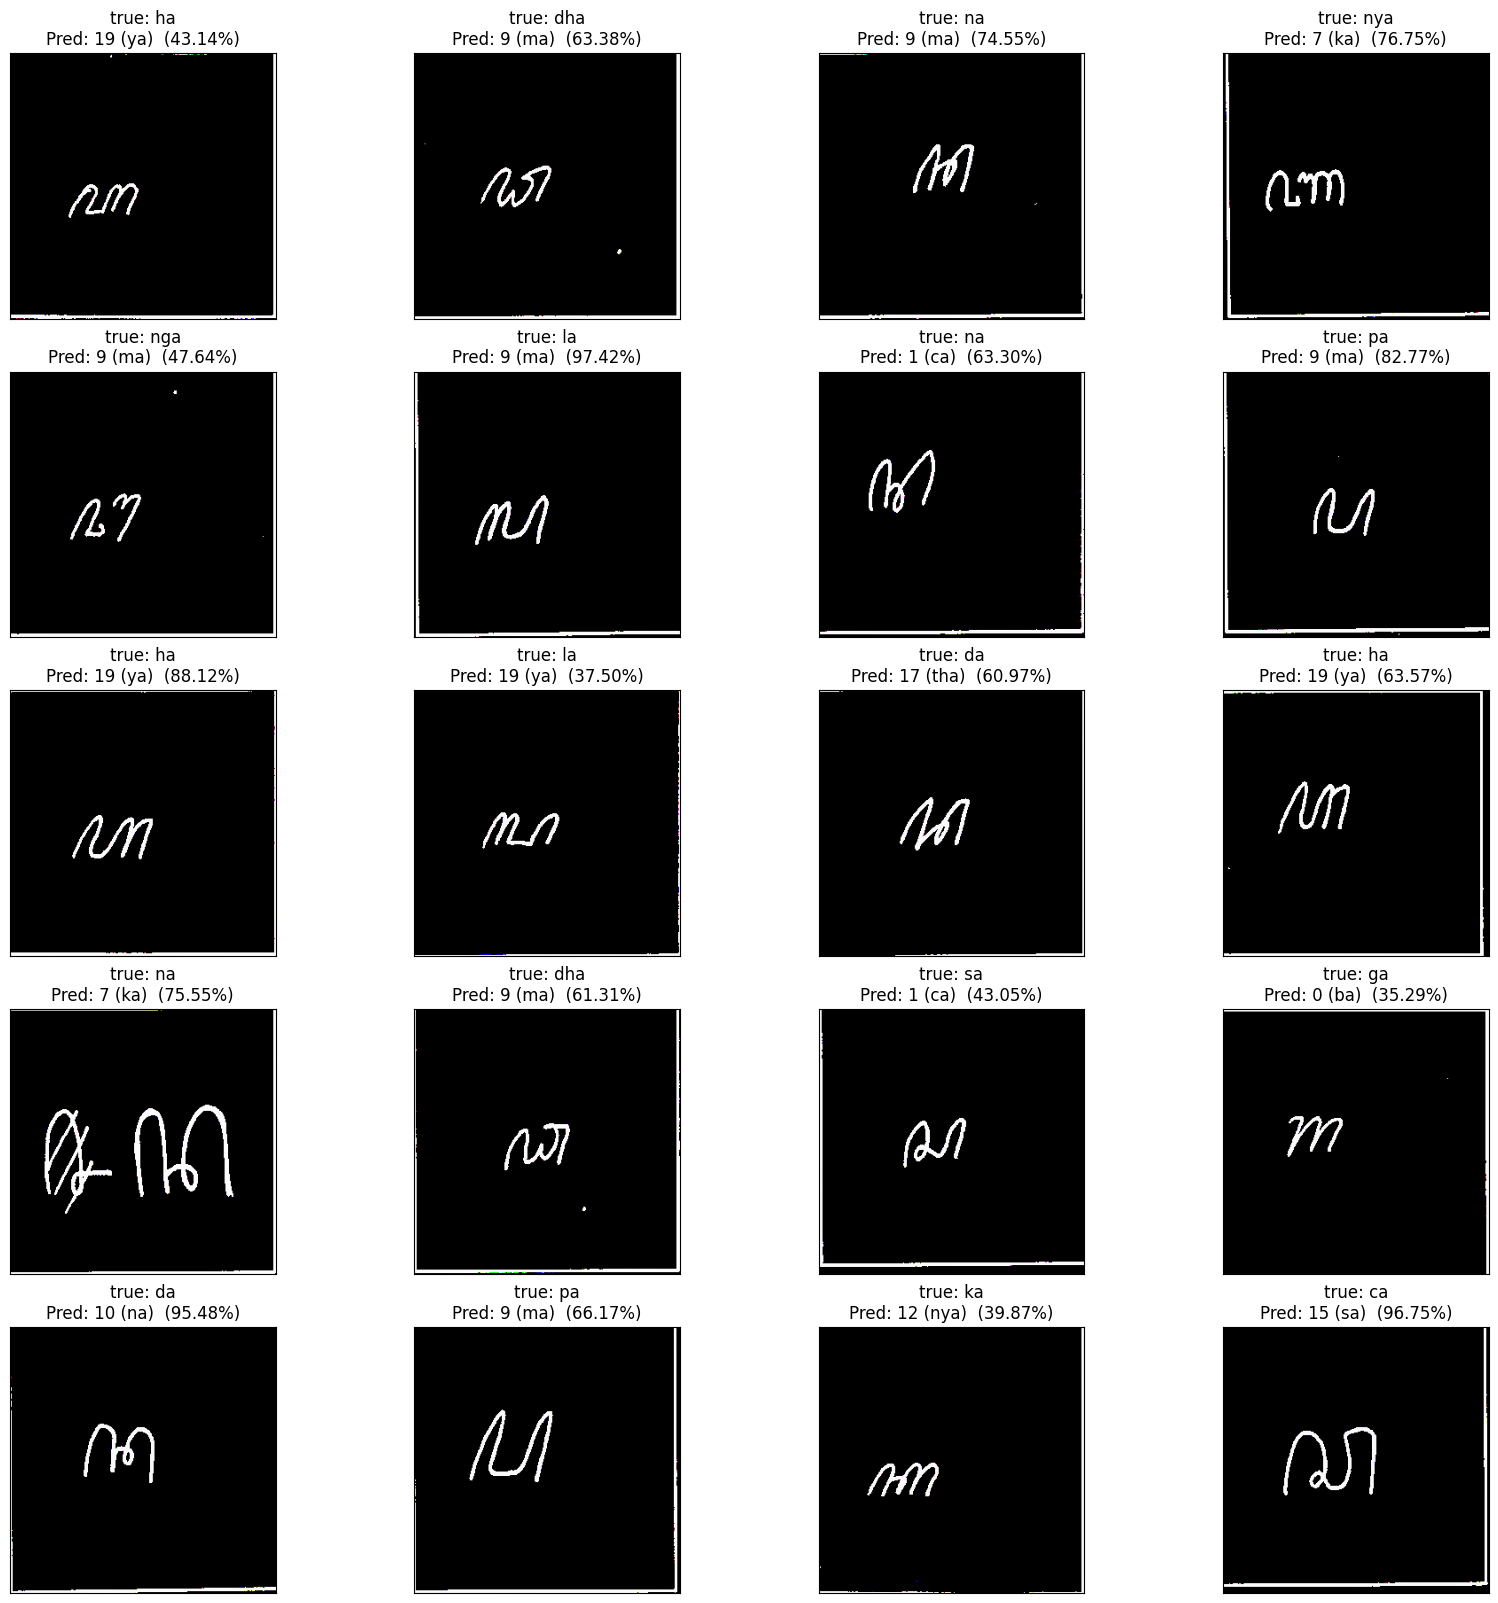

==== END MODEL f_27 ====




In [14]:
for id, model in loaded_models.items():
    print(f'==== MODEL {id} ====')
    plot_images(real_test_ds_mapped, model=model, check=True, figsize=(20, 20), verbose=0)
    print(f'==== END MODEL {id} ====\n\n')

# Export Results

In [15]:
results

model_id      loss  accuracy
0       f_1  3.453635     0.130
1       f_2  3.572640     0.120
2       f_3  3.422730     0.110
3       f_4  0.536147     0.875
4       f_5  0.950159     0.730
5       f_6  0.827076     0.860
6       f_7  1.392980     0.680
7       f_8  1.126421     0.725
8       f_9  1.222742     0.645
9      f_10  3.595441     0.145
10     f_11  2.271382     0.325
11     f_12  2.595565     0.205
12     f_13  0.515577     0.865
13     f_14  0.729846     0.810
14     f_15  1.039747     0.740
15     f_16  1.716196     0.625
16     f_17  1.318975     0.780
17     f_18  0.676074     0.825
18     f_19  2.449512     0.350
19     f_20  2.971340     0.340
20     f_21  2.404927     0.375
21     f_22  1.328427     0.625
22     f_23  0.596852     0.880
23     f_24  1.033399     0.675
24     f_25  1.655729     0.725
25     f_26  1.767386     0.655
26     f_27  0.826821     0.775

In [19]:
results_sorted = results.sort_values(by=['accuracy'], ascending=[False])
results_sorted

model_id      loss  accuracy
22     f_23  0.596852     0.880
3       f_4  0.536147     0.875
12     f_13  0.515577     0.865
5       f_6  0.827076     0.860
17     f_18  0.676074     0.825
13     f_14  0.729846     0.810
16     f_17  1.318975     0.780
26     f_27  0.826821     0.775
14     f_15  1.039747     0.740
4       f_5  0.950159     0.730
24     f_25  1.655729     0.725
7       f_8  1.126421     0.725
6       f_7  1.392980     0.680
23     f_24  1.033399     0.675
25     f_26  1.767386     0.655
8       f_9  1.222742     0.645
15     f_16  1.716196     0.625
21     f_22  1.328427     0.625
20     f_21  2.404927     0.375
18     f_19  2.449512     0.350
19     f_20  2.971340     0.340
10     f_11  2.271382     0.325
11     f_12  2.595565     0.205
9      f_10  3.595441     0.145
0       f_1  3.453635     0.130
1       f_2  3.572640     0.120
2       f_3  3.422730     0.110

In [18]:
results.to_csv('./top3_freezes_models_result.csv', index=False)

# Showcase

In [17]:
model_id = 21

print(f'Single testing Model {model_id} ...')
print(f'==== MODEL {model_id} ====')
plot_images(real_test_ds_mapped, model=loaded_models[model_id], check=True, figsize=(20, 20), verbose=0)
print(f'==== END MODEL {model_id} ====\n\n')

Single testing Model 21 ...
==== MODEL 21 ====


KeyError: 21